# Google Play Store Apps Data

Suwon Jung

## I. Exploratory Data Analysis

## 1. Contents
https://www.kaggle.com/lava18/google-play-store-apps

## 2. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pylab import rcParams
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
import matplotlib.dates as mdates
from matplotlib import gridspec

## 3. Objectives 
- Explore the general trends in Google Play App Store appliations through different visualizations
- Build a reliable machine learning model that can successfully predict the ratings of the applications

## 4. Load Google Play Store Apps Data

In [2]:
data = pd.read_csv('googleplaystore.csv')
data.shape

(10841, 13)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Except for the "Rating" (float64) all the columns are object.

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [5]:
np.random.seed(123)

## 5. Explore the Data

#### Number of Missing Values by Column

In [6]:
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Rating,1474,13.596532
Current Ver,8,0.073794
Android Ver,3,0.027673
Type,1,0.009224
Content Rating,1,0.009224
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000


Rating, Current Ver, Android Ver, Type and Content Rating have some missing values. Rating has the most missing value, at around 13.6%.

In [7]:
data.shape

(10841, 13)

### 5-1. Examine the Target Variable: Rating

In [8]:
data['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

The maximum value of rating is 19, which suggests that there might be an error in data entry. The rating should be within the range of 0 to 5. 

In [9]:
# Unique "Rating"
data['Rating'].value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.7        8
1.8        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

As suspected, there is one entry of an application that is rated 19. Let's examine this row to get further insight into what is wrong. 

In [10]:
data[data['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


In [11]:
# Delete the row with "Rating"=19.0
data = data.drop(data[data['Rating'] == 19.0].index)

In [12]:
data['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

- The maximum value of the rating is 5 and the minimum value of the rating is 1. 
- The mean value of the rating is 4.19.

#### Distribution of Rating - Kernel Density Plot

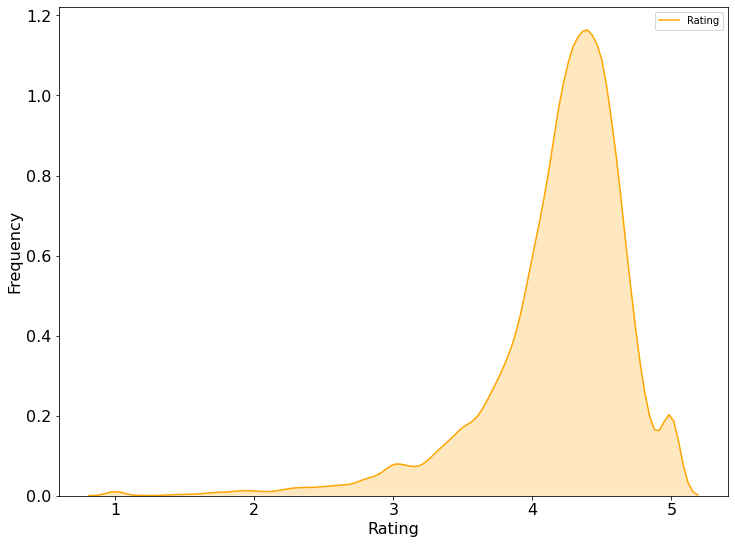

In [13]:
rcParams['figure.figsize'] = 12,9;
gr = sns.kdeplot(data.Rating, color="orange", shade = True);
gr.set_xlabel("Rating", size=16);
gr.set_ylabel("Frequency",size=16);
#plt.title('Kernel Density Plot of Rating', size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
gr.figure.savefig('Rating_kdensity.png',bbox_inches = 'tight')

In [14]:
col='Rating'
v=data[col].value_counts().reset_index()
v=v.rename(columns={col:'count','index':col})
v['percent']=v['count'].apply(lambda x : 100*x/sum(v['count']))
v=v.sort_values(col)
trace = go.Bar(x=v[col], y=v["count"], name="Paid",  marker=dict(color="orange"))
y=[trace]
layout={'title':"Histogram of Rating with Bin Width of 0.1",'xaxis':{'title':"Ratings"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

#### Histogram with bin width of 0.5

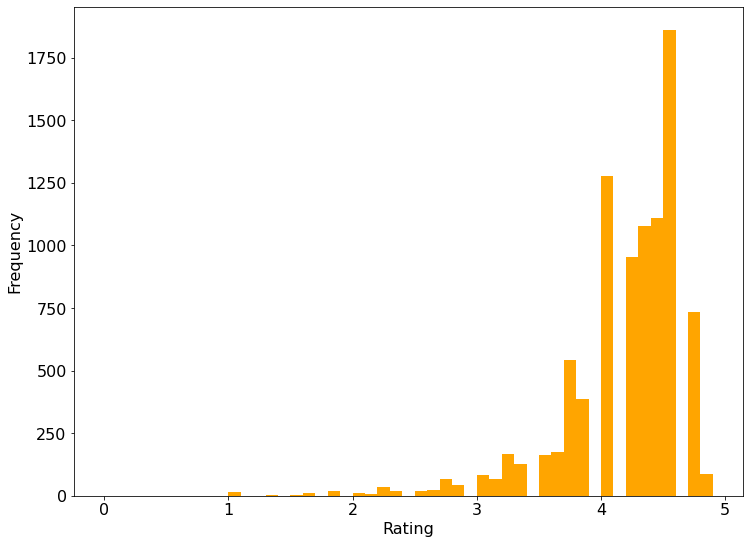

In [15]:
bins_list = np.arange(0,5,0.1)
rhist= plt.hist(data.Rating,bins=bins_list, color="orange")
#plt.title('Histogram of Rating',size=20)
plt.xlabel('Rating',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('rating_hist.png',bbox_inches = 'tight')
plt.show()

#### Histogram with bin width of 1 

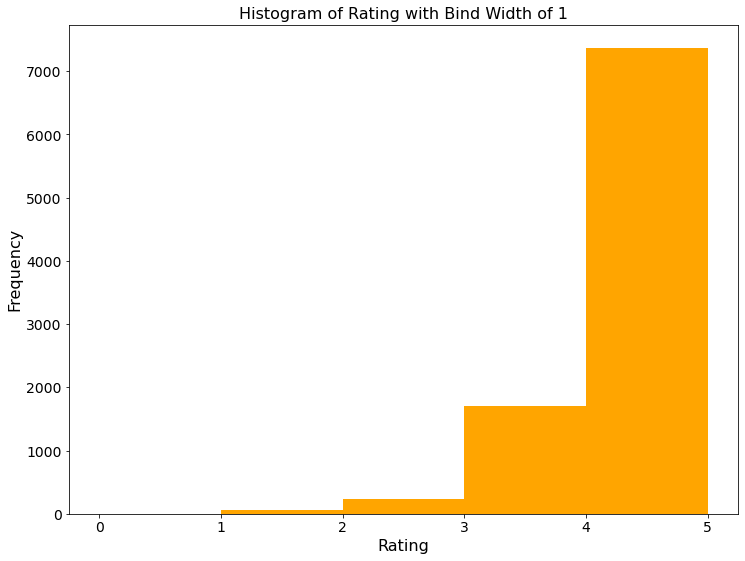

In [16]:
bins_list = [0,1,2,3,4,5]
plt.hist(data.Rating, bins=bins_list, color="orange")
plt.title('Histogram of Rating with Bind Width of 1',size=16)
plt.xlabel('Rating',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

The histograms above show that most of the rating are above 4, and mostly around 4 to 4.5. 

In [17]:
# Categorizing the Rating
r1 = data[data['Rating']<=1.5]
r2 = data[(1.5<data['Rating']) & (data['Rating']<=2)]
r3 = data[(2<data['Rating']) & (data['Rating']<=2.5)]
r4 = data[(2.5<data['Rating']) & (data['Rating']<=3)]
r5 = data[(3<data['Rating']) & (data['Rating']<=3.5)]
r6 = data[(3.5<data['Rating']) & (data['Rating']<=4)]
r7 = data[(4<data['Rating']) & (data['Rating']<=4.5)]
r8 = data[(4.5<data['Rating']) & (data['Rating']<=5)]

rbelow = data[data['Rating']<4.19]
rabove = data[data['Rating']>=4.19]

### 5-2. App

In [18]:
data['App'].describe()

count      10840
unique      9659
top       ROBLOX
freq           9
Name: App, dtype: object

In [19]:
# Unique "App" names
data['App'].value_counts().head(20)

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
8 Ball Pool                                           7
Duolingo: Learn Languages Free                        7
ESPN                                                  7
Candy Crush Saga                                      7
Subway Surfers                                        6
Temple Run 2                                          6
Bowmasters                                            6
Zombie Catchers                                       6
Sniper 3D Gun Shooter: Free Shooting Games - FPS      6
Bleacher Report: sports news, scores, & highlights    6
Bubble Shooter                                        6
Nick                                                  6
slither.io                                            6
Helix Jump                                            6
Viber Messenger                                       5
Angry Birds Classic                             

Note that there are multiple entries of the apps whose names are the same.

In [20]:
# Set the names of the apps as indces
data.set_index("App", inplace=True)
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


### 5-3. Category

In [21]:
data['Category'].describe()

count      10840
unique        33
top       FAMILY
freq        1972
Name: Category, dtype: object

In [22]:
# Unique "Cateogry"
data['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [23]:
print("There are", len(data['Category'].unique()) , "categories.")

There are 33 categories.


#### Distribution of Categories - Bar Plot

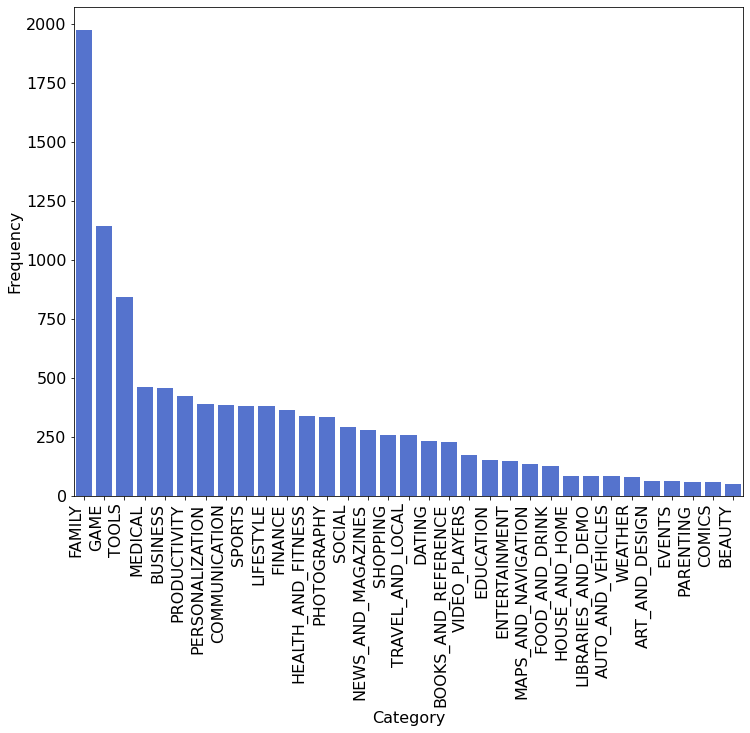

In [24]:
gc = sns.countplot(x="Category",data=data, color='#4169E1', order = data['Category'].value_counts().index);
gc.set_xticklabels(gc.get_xticklabels(), rotation=90, ha="right");
#plt.title('Bar Plot of Applications in Each Category',size = 20);
plt.xlabel('Category',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
gc.figure.savefig('Categories_bar.png',bbox_inches = 'tight')

#### Word Cloud of Categories

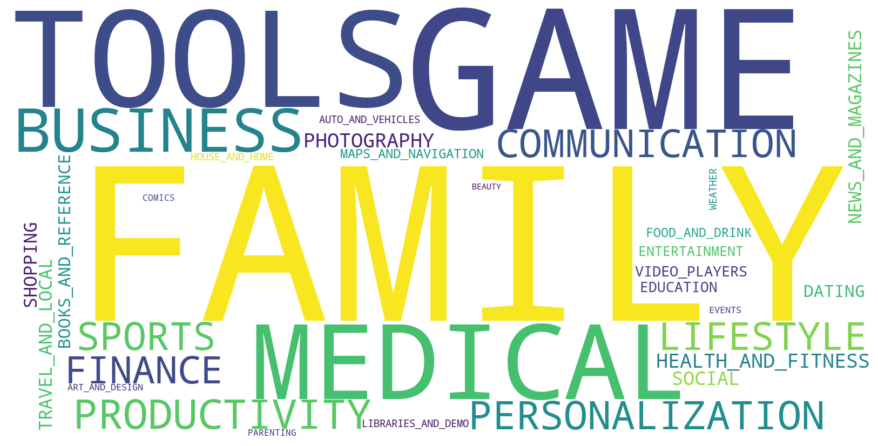

In [25]:
wordcloud = WordCloud(max_font_size=400, collocations=False, max_words=33, width=1600, height=800, background_color="white").generate(' '.join(data['Category']))
plt.figure(figsize=(12,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('Categories_wordcloud.png',bbox_inches = 'tight')
plt.show()

Category "Family" has the highest counts of apps, followed by "Games" and "Personalization."

Top 5 cateogires: 
    1) Family
    2) Game
    3) Tools
    4) Medical
    5) Business

In [26]:
topfive = ['FAMILY', 'GAME', 'TOOLS','MEDICAL','BUSINESS']
topcat = data.loc[data['Category'].isin(topfive)]
topcat.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,Varies with device,"10,000,000+",Free,0,Everyone,Business,30-Jul-18,Varies with device,Varies with device
Indeed Job Search,BUSINESS,4.3,674730,Varies with device,"50,000,000+",Free,0,Everyone,Business,21-May-18,Varies with device,Varies with device
Uber Driver,BUSINESS,4.4,1254730,Varies with device,"10,000,000+",Free,0,Everyone,Business,3-Aug-18,Varies with device,Varies with device
ADP Mobile Solutions,BUSINESS,4.3,85185,29M,"5,000,000+",Free,0,Everyone,Business,17-Jul-18,3.4.2,5.0 and up
Snag - Jobs Hiring Now,BUSINESS,4.3,32584,Varies with device,"1,000,000+",Free,0,Everyone,Business,4-May-18,Varies with device,Varies with device


C:\Users\chloe\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\chloe\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal

C:\Users\chloe\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\chloe\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal

C:\Users\chloe\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\chloe\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal

C:\Users\chloe\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\chloe\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: Runtim

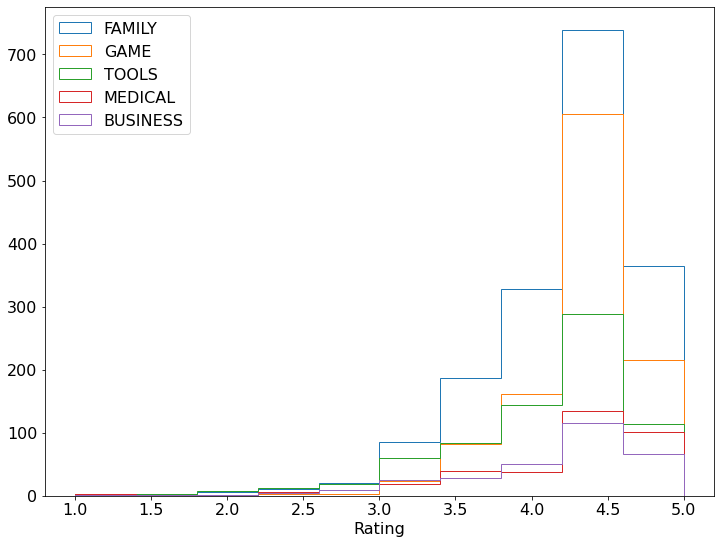

In [27]:
for cat in topfive: 
    one=topcat[topcat['Category']==cat]
    plt.hist(one.Rating,histtype='step',label=cat)
    plt.legend(loc='upper left',fontsize=16)
    plt.xlabel('Rating',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.savefig('cat_top5_overlay.png',bbox_inches = 'tight')

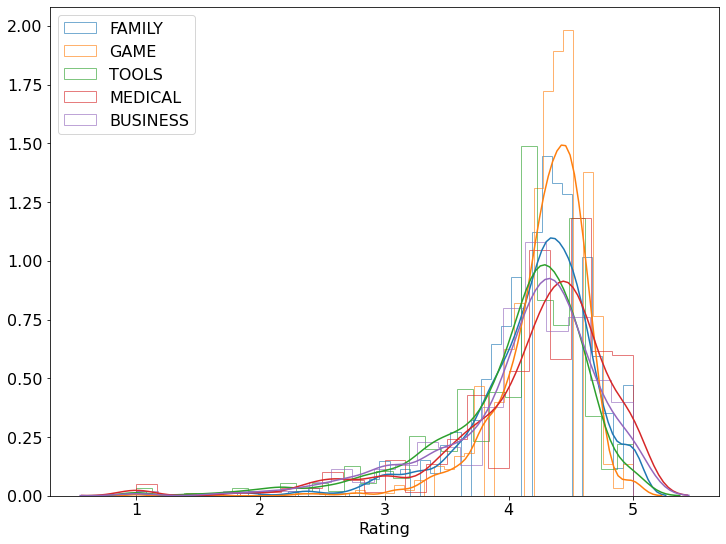

In [28]:
for cat in topfive: 
    one=topcat[topcat['Category']==cat]
    sns.distplot(one.Rating,norm_hist=True,label=cat,hist_kws={"histtype": "step","alpha":0.6})
    plt.legend(loc='upper left',fontsize=16)
    plt.xlabel('Rating',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

plt.savefig('cat_top5_overlaynorm.png',bbox_inches = 'tight')

In [29]:
fam = topfive[0], round(np.mean(topcat[topcat['Category']=='FAMILY'].Rating),2),round(np.std(topcat[topcat['Category']=='FAMILY'].Rating),2)

In [30]:
gam = topfive[1], round(np.mean(topcat[topcat['Category']=='GAME'].Rating),2), round(np.std(topcat[topcat['Category']=='GAME'].Rating),2)

In [31]:
too = topfive[2], round(np.mean(topcat[topcat['Category']=='TOOLS'].Rating),2), round(np.std(topcat[topcat['Category']=='TOOLS'].Rating),2)

In [32]:
med = topfive[3], round(np.mean(topcat[topcat['Category']=='MEDICAL'].Rating),2), round(np.std(topcat[topcat['Category']=='MEDICAL'].Rating),2)

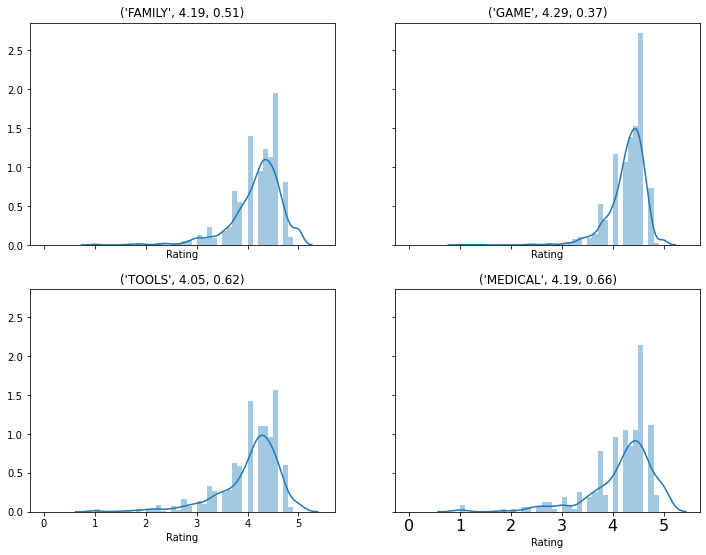

In [33]:
bins_list=np.arange(0,5,0.1)
fig,axs =  plt.subplots(2,2,sharex=True,sharey=True)
sns.distplot(topcat[topcat['Category']=='FAMILY'].Rating, ax=axs[0,0], label='Family',norm_hist=True,bins=bins_list)
axs[0,0].set_title(fam)
sns.distplot(topcat[topcat['Category']=='GAME'].Rating,ax=axs[0,1], label='Game',norm_hist=True,bins=bins_list)
axs[0,1].set_title(gam)
sns.distplot(topcat[topcat['Category']=='TOOLS'].Rating,ax=axs[1,0], label='Tools',norm_hist=True,bins=bins_list)
axs[1,0].set_title(too)
sns.distplot(topcat[topcat['Category']=='MEDICAL'].Rating,ax=axs[1,1], label='Medical',norm_hist=True,bins=bins_list)
axs[1,1].set_title(med)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('cat_top5_overlaysubplotnorm.png',bbox_inches = 'tight')

#### Categories and Rating - Boxplot

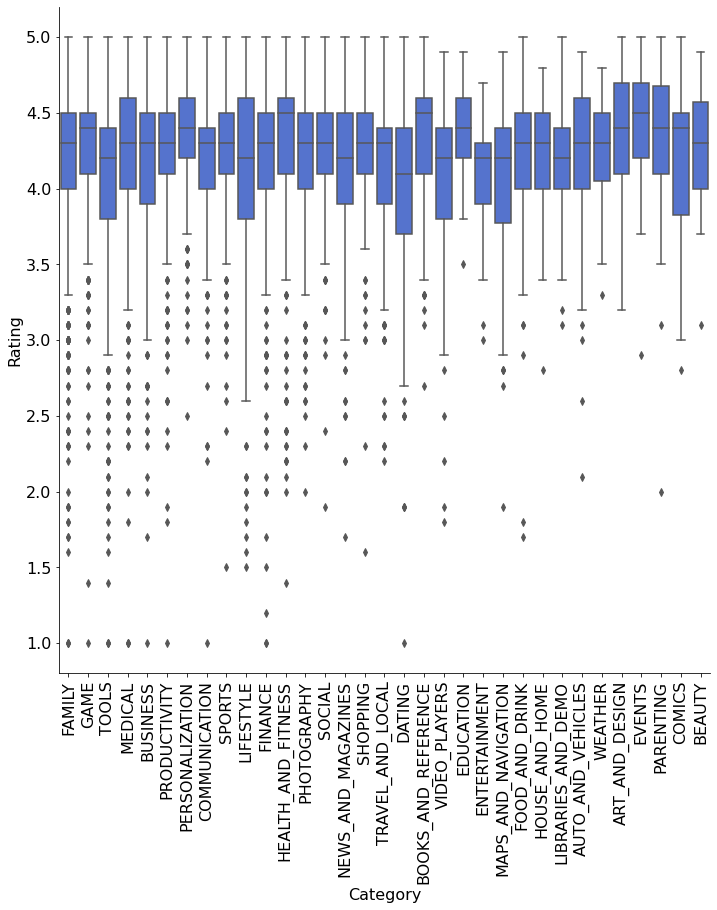

In [34]:
gcr = sns.catplot(x="Category",y="Rating",data=data, kind="box", height = 10, color="#4169E1",order = data['Category'].value_counts().index)
gcr.set_xticklabels(rotation=90)
gcr = gcr.set_ylabels("Rating")
#plt.title('Box Plot of Ratings for Apps of Different Category',size = 20);
plt.xlabel('Category',fontsize=16)
plt.ylabel('Rating',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('Category_Rating_Boxplot.png',bbox_inches = 'tight')

Apps whose category is "Events" tend to have higher mean ratings, while "Dating" apps tend to have lower ratings. This is confirmed by checking the lowest and highest mean rating of the category as follow:

In [35]:
data[['Category', 'Rating']].groupby(['Category'], as_index=False).mean().sort_values('Rating').head(1)

,Category,Rating
7,DATING,3.970769


In [36]:
data[['Category', 'Rating']].groupby(['Category'], as_index=False).mean().sort_values('Rating').tail(1)

,Category,Rating
10,EVENTS,4.435556


#### Categories and Rating - Rating Below Mean vs. Rating Above Mean

In [37]:
len(rbelow), len(rabove)

(3274, 6092)

In [38]:
col='Category'

v1=rbelow[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)

v2=rabove[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)

trace1 = go.Bar(x=v1[col], y=v1["count"], name="Below Average Rating", marker=dict(color="#4169E1"))
trace2 = go.Bar(x=v2[col], y=v2["count"], name="Above Average Rating", marker=dict(color="#FF8C00"))
y = [trace1, trace2]
layout={'title':"App Category"}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

Both the apps that had above and below the average ratings showed similar trends regardless of categories. Therefore, no significant effect of categories on the rating can be observed.

### 5-4. Genres

In [39]:
data['Genres'].describe()

count     10840
unique      119
top       Tools
freq        842
Name: Genres, dtype: object

In [40]:
# Unique "Genres"
data['Genres'].value_counts()

Tools                         842
Entertainment                 623
Education                     549
Medical                       463
Business                      460
                             ... 
Trivia;Education                1
Communication;Creativity        1
Health & Fitness;Education      1
Arcade;Pretend Play             1
Role Playing;Brain Games        1
Name: Genres, Length: 119, dtype: int64

In [41]:
print( len(data['Genres'].unique()) , "genres")

119 genres


#### Distribution of Different Genres - Bar Plot

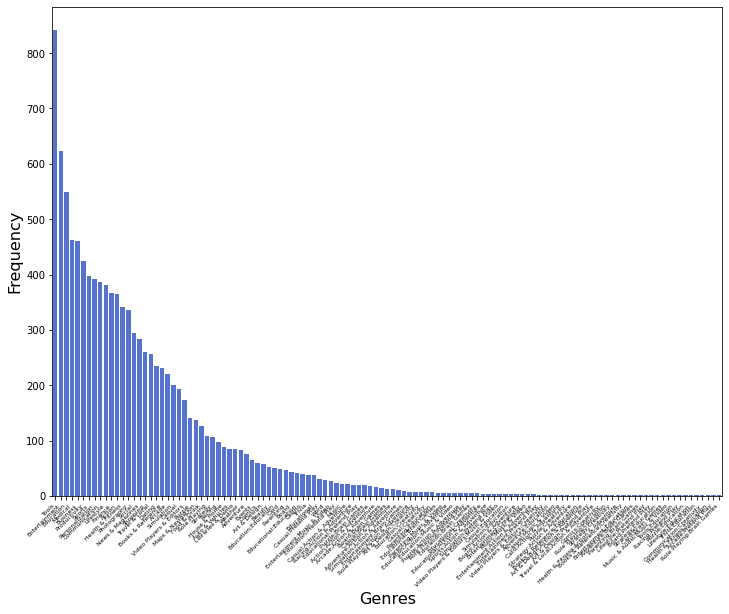

In [42]:
gg = sns.countplot(x="Genres",data=data, color = "#4169E1", order=data['Genres'].value_counts().index);
gg.set_xticklabels(gg.get_xticklabels(), rotation=45, ha="right");
plt.xlabel('Genres',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=6)
gg
#plt.title('Count of apps in each genres',size = 13)
plt.savefig('Genre_BarBeforeCleaning.png',bbox_inches = 'tight')

We can see that there is a skewed distribution for "Genres," which can be a potential cause for a bias. Therefore, decided to get rid of the sub genres (that starts after ";") and just use the bigger genres.

In [43]:
data['Genres'] = data['Genres'].str.split(';').str[0]

In [44]:
print( len(data['Genres'].unique()) , "genres")
print("\n", data['Genres'].unique())

48 genres

 ['Art & Design' 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business'
 'Comics' 'Communication' 'Dating' 'Education' 'Entertainment' 'Events'
 'Finance' 'Food & Drink' 'Health & Fitness' 'House & Home'
 'Libraries & Demo' 'Lifestyle' 'Adventure' 'Arcade' 'Casual' 'Card'
 'Action' 'Strategy' 'Puzzle' 'Sports' 'Music' 'Word' 'Racing'
 'Simulation' 'Board' 'Trivia' 'Role Playing' 'Educational'
 'Music & Audio' 'Video Players & Editors' 'Medical' 'Social' 'Shopping'
 'Photography' 'Travel & Local' 'Tools' 'Personalization' 'Productivity'
 'Parenting' 'Weather' 'News & Magazines' 'Maps & Navigation' 'Casino']


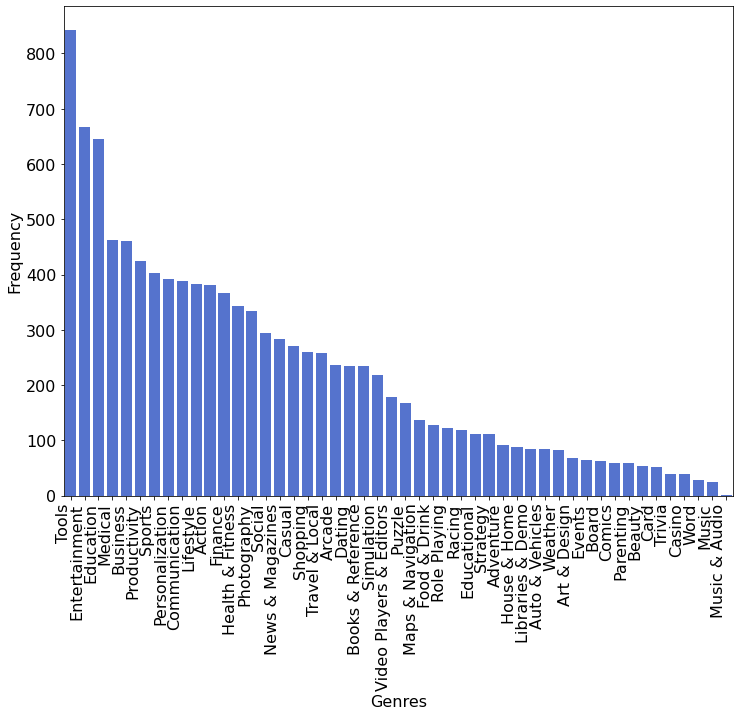

In [45]:
gg = sns.countplot(x="Genres",data=data, color = "#4169E1",order=data['Genres'].value_counts().index);
gg.set_xticklabels(gg.get_xticklabels(), rotation=90, ha="right");
gg
#plt.title('Histogram of apps in each genres',size = 20)
plt.xlabel('Genres',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('Genre_Bar.png',bbox_inches = 'tight')

#### Genres and Rating

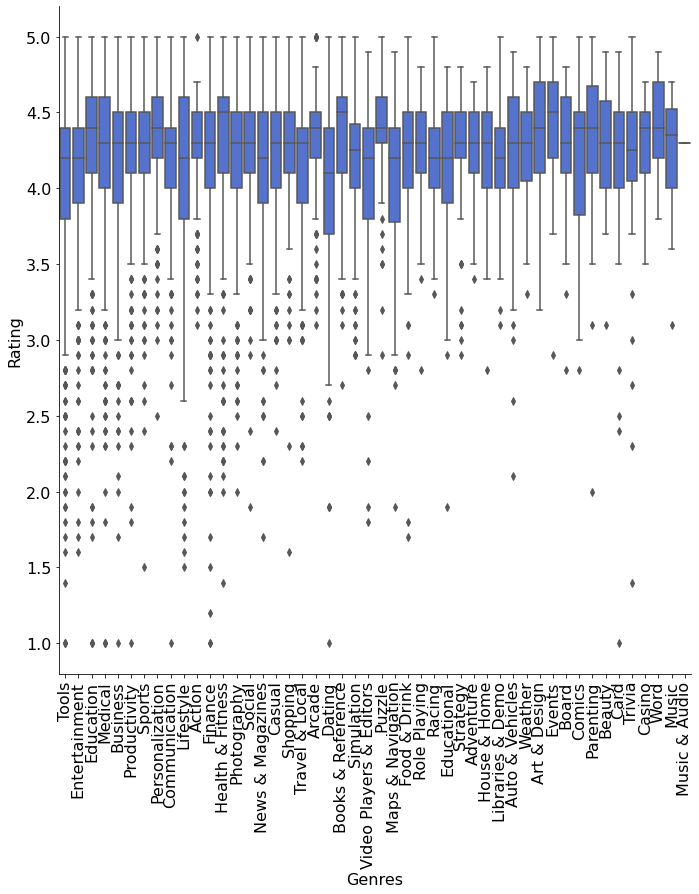

In [46]:
ggr = sns.catplot(x="Genres",y="Rating",data=data, kind="box", height = 10 , color = "#4169E1",order = data['Genres'].value_counts().index)
ggr.set_xticklabels(rotation=90)
ggr = ggr.set_ylabels("Rating")
#plt.title('Box Plot of Rating for Apps with Different Genres',size = 20);
plt.xlabel('Genres',size=16)
plt.ylabel('Rating',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('genres_rating_box.png',bbox_inches = 'tight')

As shown in EDA of Catgory, the apps whose genre is "Events" tend to have higher ratings, while the "Dating" apps tend to have lower ratings. 

The graphs show that the Categories and Genres have many overlaps in values. 

#### Genres and Category

In [47]:
(data[data.Category != data.Genres]
 .groupby('Category')['Genres']
 .value_counts())

Category             Genres                 
ART_AND_DESIGN       Art & Design                65
AUTO_AND_VEHICLES    Auto & Vehicles             85
BEAUTY               Beauty                      53
BOOKS_AND_REFERENCE  Books & Reference          231
BUSINESS             Business                   460
                                               ... 
SPORTS               Sports                     384
TOOLS                Tools                      843
TRAVEL_AND_LOCAL     Travel & Local             258
VIDEO_PLAYERS        Video Players & Editors    175
WEATHER              Weather                     82
Name: Genres, Length: 71, dtype: int64

In [48]:
data[['Category', 'Genres']].nunique()

Category    33
Genres      48
dtype: int64

In [49]:
data[data.Category != data.Genres]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design,15-Jan-18,2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up


As shown, a lot of Genres and Category have the same values. 

### 5-6. Content Rating

In [50]:
data['Content Rating'].describe()

count        10840
unique           6
top       Everyone
freq          8714
Name: Content Rating, dtype: object

In [51]:
# Unique "Content Rating"
data['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Most of the apps are made for "Everyone."

#### Barplot of Content Rating

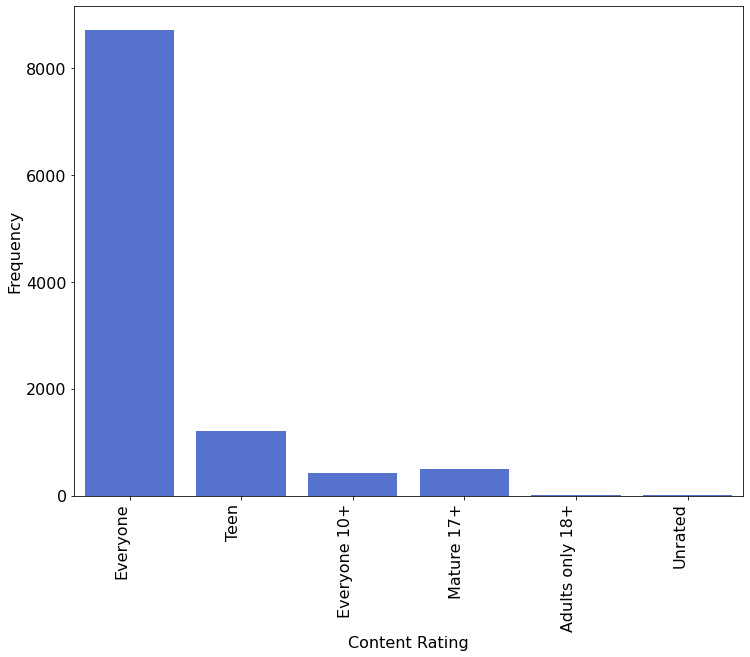

In [52]:
gcr = sns.countplot(x="Content Rating",data=data,color='#4169E1');
gcr.set_xticklabels(gcr.get_xticklabels(), rotation=90, ha="right");
#plt.title('Bar Plot of Content Rating for Apps',size = 20);
plt.xlabel('Content Rating',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)

plt.yticks(fontsize=16)
plt.savefig('contentrating_bar.png',bbox_inches = 'tight')

There are only 2 entries of "Unrated," and 3 entries of "Adults only 18+."

In [53]:
data[data['Content Rating']=='Unrated']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Best CG Photography,FAMILY,NaN,1,2.5M,500+,Free,0,Unrated,Entertainment,24-Jun-15,5.2,3.0 and up
DC Universe Online Map,TOOLS,4.1,1186,6.4M,"50,000+",Free,0,Unrated,Tools,27-Feb-12,1.3,2.3.3 and up


In [54]:
data[data['Content Rating']=='Adults only 18+']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Manga Master - Best manga & comic reader,COMICS,4.6,24005,4.9M,"500,000+",Free,0,Adults only 18+,Comics,4-Jul-18,1.1.7.0,4.1 and up
DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41M,"1,000,000+",Free,0,Adults only 18+,Sports,24-Jul-18,3.21.324,4.4 and up
Manga Books,COMICS,3.8,7326,Varies with device,"500,000+",Free,0,Adults only 18+,Comics,3-Aug-18,Varies with device,Varies with device


#### Content Rating and Rating - Box Plot

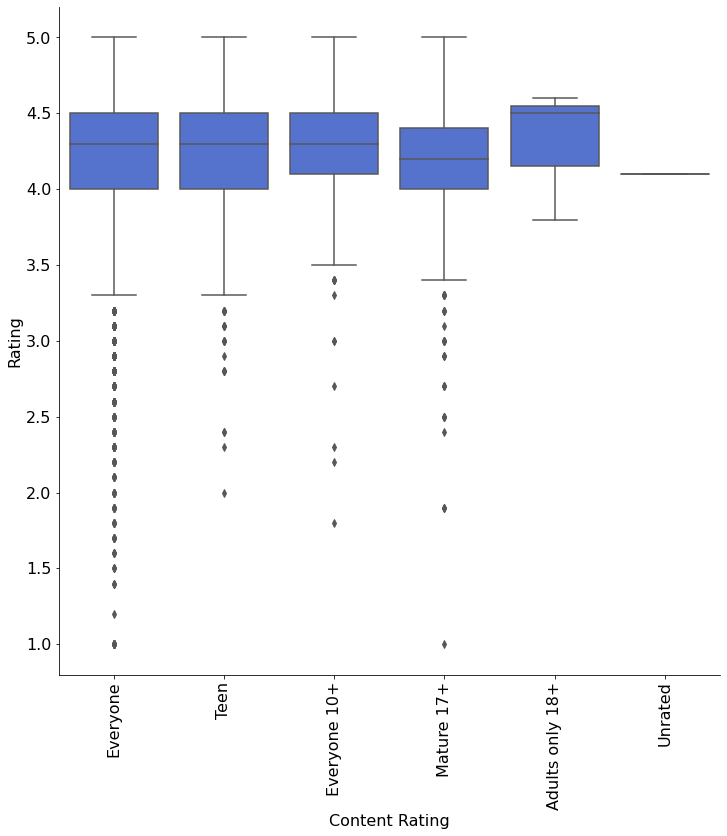

In [55]:
grcr = sns.catplot(x="Content Rating",y="Rating",data=data, kind="box", height = 10 ,color="#4169E1")
grcr.set_xticklabels(rotation=90)
grcr = grcr.set_ylabels("Rating")
#plt.title('Box plot of Rating for Each Content Rating',size = 20)
plt.xlabel('Content Rating',size=16)
plt.ylabel('Rating',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('content_rating_box.png',bbox_inches = 'tight')

Apps with the content rating of "Adults only 18+" seem to have higher rating, while the apps with the content rating of "Everyone" tend to have wide spread distribution of rating, ranging from 1 to 5. 

### 5-7. Reviews

In [56]:
data['Reviews'].describe()

count     10840
unique     6001
top           0
freq        596
Name: Reviews, dtype: object

In [57]:
pd.to_numeric(data['Reviews'],errors='coerce')

App
Photo Editor & Candy Camera & Grid & ScrapBook           159
Coloring book moana                                      967
U Launcher Lite – FREE Live Cool Themes, Hide Apps     87510
Sketch - Draw & Paint                                 215644
Pixel Draw - Number Art Coloring Book                    967
                                                       ...  
Sya9a Maroc - FR                                          38
Fr. Mike Schmitz Audio Teachings                           4
Parkinson Exercices FR                                     3
The SCP Foundation DB fr nn5n                            114
iHoroscope - 2018 Daily Horoscope & Astrology         398307
Name: Reviews, Length: 10840, dtype: int64

In [58]:
data['Reviews'].describe()

count     10840
unique     6001
top           0
freq        596
Name: Reviews, dtype: object

In [59]:
# Convert "Reviews" into integers
data['Reviews'] = data['Reviews'].apply(lambda x: int(x))
data['Reviews'].head()

App
Photo Editor & Candy Camera & Grid & ScrapBook           159
Coloring book moana                                      967
U Launcher Lite – FREE Live Cool Themes, Hide Apps     87510
Sketch - Draw & Paint                                 215644
Pixel Draw - Number Art Coloring Book                    967
Name: Reviews, dtype: int64

In [60]:
data['Reviews'].describe()

count    1.084000e+04
mean     4.441529e+05
std      2.927761e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.477550e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [61]:
# Unique "Reviews"
data['Reviews'].value_counts().head(30)

0     596
1     272
2     214
3     175
4     137
5     108
6      97
7      90
8      74
9      65
10     64
12     60
11     52
13     49
17     48
14     41
19     41
21     35
20     35
16     35
15     31
25     30
30     30
24     30
38     29
18     27
22     26
27     25
23     25
33     24
Name: Reviews, dtype: int64

#### Distribution of Number of Reviews   - Kernel Density Plot

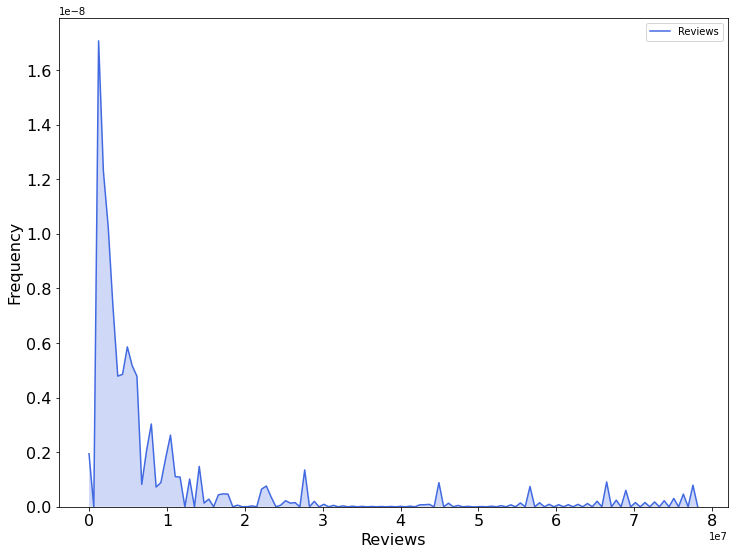

In [62]:
gnr = sns.kdeplot(data.Reviews, color="#4169E1", shade = True)
gnr.set_xlabel("Reviews")
gnr.set_ylabel("Frequency")
#plt.title('Kernel Density Plot of Number of Reveiws',size = 20);
plt.xlabel('Reviews',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('reviews_density.png',bbox_inches = 'tight')

#### Number of Reviews - Histogram

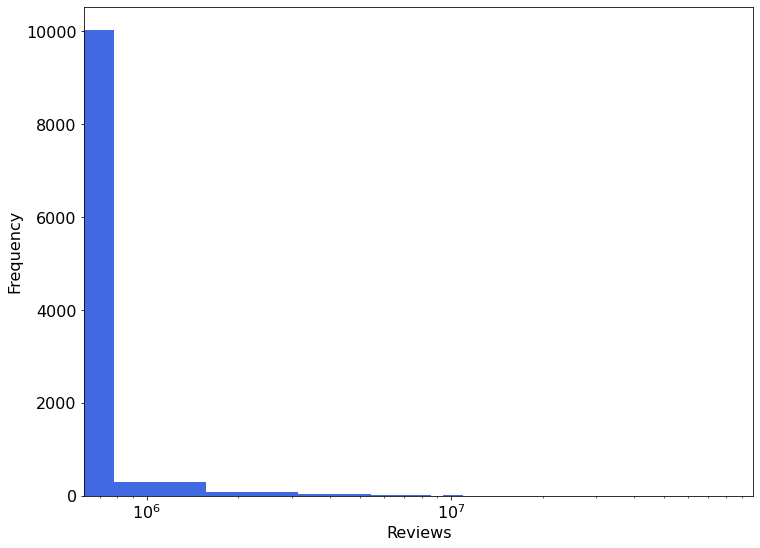

In [63]:
plt.hist(data.Reviews, bins=100, color='#4169E1')
plt.xlabel('Reviews',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xscale("log")
plt.savefig('reviews_bar.png',bbox_inches = 'tight')
plt.show()

In [64]:
# Median of Number of Reviews
print("min:", data['Reviews'].min(), "median:", data['Reviews'].median(), "mean:", data['Reviews'].mean(), "max:", data['Reviews'].max())

min: 0 median: 2094.0 mean: 444152.89603321033 max: 78158306


The median number of reivews is 2094, while the mean is 444153. This and the graphs above suggest that the number of reviews are skewed to left. 

To get further insight into the number of reviews, the number of reviews below the median is further examined.

In [65]:
# Categorizing the Number of Reviews
nrbelowmed = data[data['Reviews']<=2094]
nrabovemed = data[data['Reviews']>2094]

In [66]:
# No reviews
yesreview = data[data['Reviews']!=0]

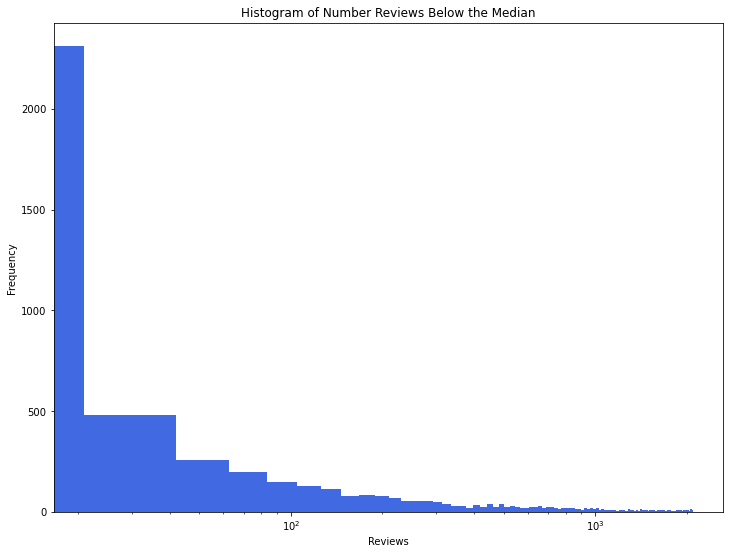

In [67]:
plt.hist(nrbelowmed['Reviews'], color='#4169E1', bins=100)
plt.title('Histogram of Number Reviews Below the Median')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.xscale("log")
plt.show()

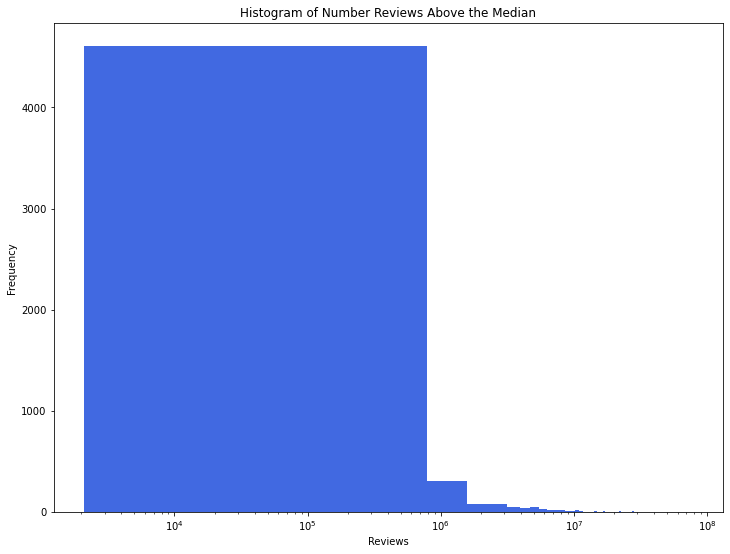

In [68]:
plt.hist(nrabovemed['Reviews'], color='#4169E1', bins=100)
plt.title('Histogram of Number Reviews Above the Median')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.xscale("log")
plt.show()

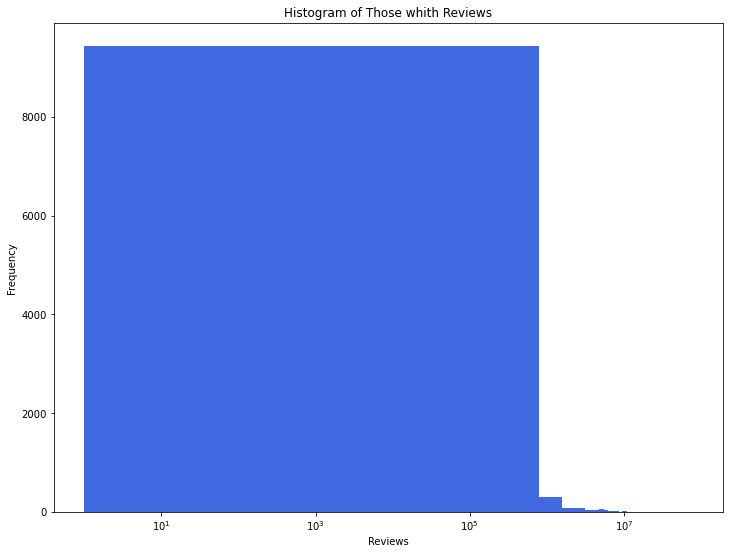

In [69]:
plt.hist(yesreview['Reviews'], color='#4169E1', bins=100)
plt.title('Histogram of Those whith Reviews')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.xscale("log")
plt.show()

For better understanding of Reviews, used "clip."

In [70]:
review_clipped = data['Reviews'].clip(0,500)

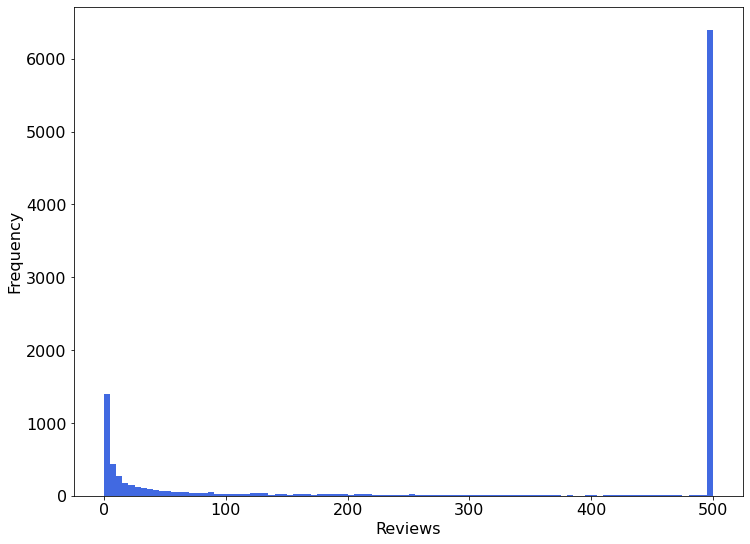

In [71]:
plt.hist(review_clipped, color='#4169E1', bins=100)
#plt.title('Histogram of Number Reviews Clipped (0,1000)')
plt.xlabel('Reviews',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('reviews_clipped_hist.png',bbox_inches = 'tight')
plt.show()

#### Number of Reviews and Rating 

<Figure size 1440x1440 with 0 Axes>

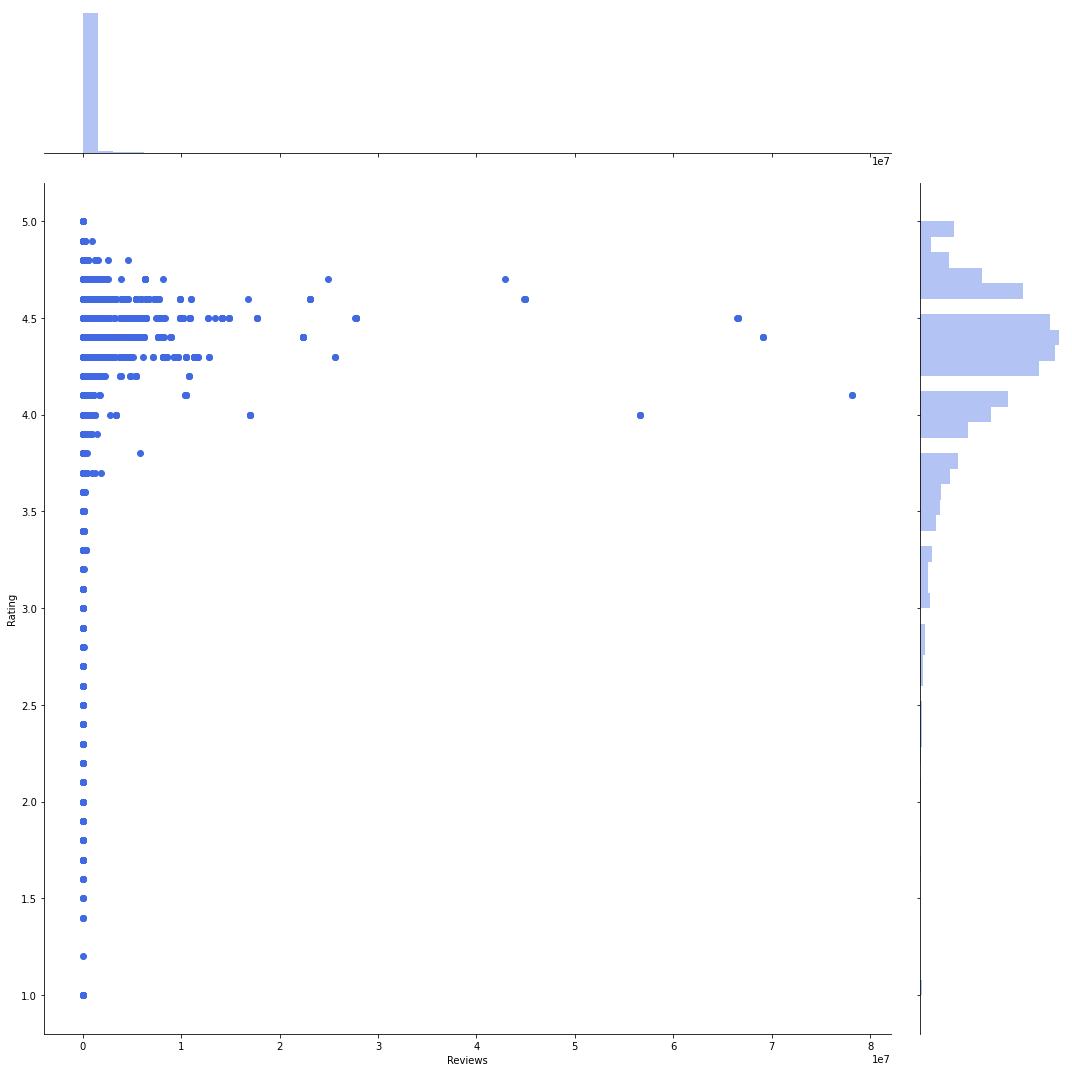

In [72]:
plt.figure(figsize = (20,20));
grr = sns.jointplot(x="Reviews", y="Rating", data=data, height=15, color = "#4169E1")
plt.savefig('reviews_rating_scatter.png',bbox_inches = 'tight')

<Figure size 1440x1440 with 0 Axes>

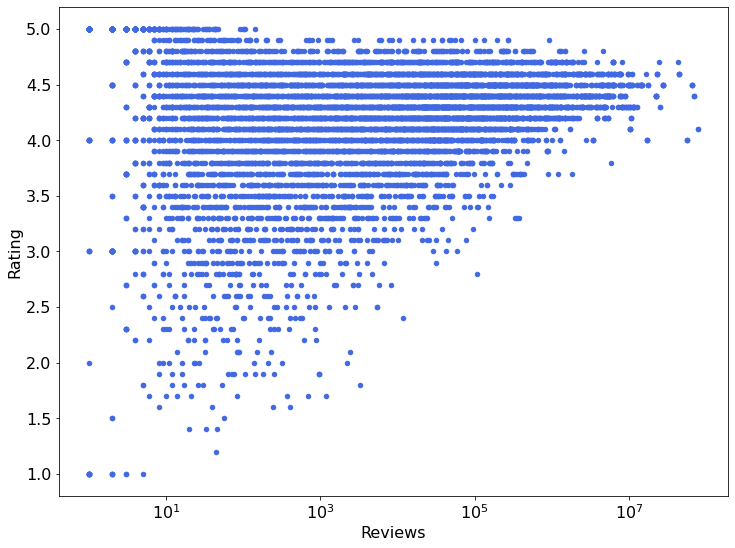

In [73]:
plt.figure(figsize = (20,20));
data.plot(x='Reviews', y='Rating', kind='scatter',color = "#4169E1")
#plt.title('Scatter Plot of Reviews and Rating',size=20)
plt.xlabel('Reviews',size=16)
plt.ylabel('Rating',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xscale("log")
plt.savefig('reviews_rating_scatter.png',bbox_inches = 'tight')
plt.show()


There are only few apps with a lot of reviews, and these apps tend to be on the higher ends of the rating. That is why the regresion plot tend to suggest positive relatinship between the number of reviews and rating. However this can be misleading as there are way more apps with small number of reviews and the distribution of rating for those apps are quite widespread. 

### 5-8. Size

In [74]:
data['Size'].describe()

count                  10840
unique                   461
top       Varies with device
freq                    1695
Name: Size, dtype: object

In [75]:
# Unique "Size"
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Can see that there are values with different measurement (i.e. ks and Ms) and some values "Varies with device."

In [76]:
data['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
552k                     1
551k                     1
400k                     1
940k                     1
378k                     1
Name: Size, Length: 461, dtype: int64

In [77]:
data[data['Size']== 'Varies with device']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,14-Jul-18,Varies with device,2.3.3 and up
Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,30-Jul-18,Varies with device,Varies with device
Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,30-Jul-18,Varies with device,Varies with device
Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,30-Jul-18,Varies with device,Varies with device
REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,25-May-18,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...
My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,24-Jul-18,Varies with device,Varies with device
Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,27-Sep-17,Varies with device,4.4 and up
Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,23-May-18,Varies with device,Varies with device


In [78]:
# Removing "M"s and replace "k" by dividing it by 1000 -  cpmvert it to Ms
data['Size'] = data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

data['Size'] = data['Size'].apply(lambda x: float(x))

In [79]:
data['Size'].value_counts()

11.000    198
12.000    196
14.000    194
13.000    191
15.000    184
         ... 
0.027       1
0.642       1
0.647       1
0.039       1
0.942       1
Name: Size, Length: 459, dtype: int64

In [80]:
data['Size'].describe()

count    9145.000000
mean       21.516530
std        22.588748
min         0.008500
25%         4.900000
50%        13.000000
75%        30.000000
max       100.000000
Name: Size, dtype: float64

C:\Users\chloe\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\chloe\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



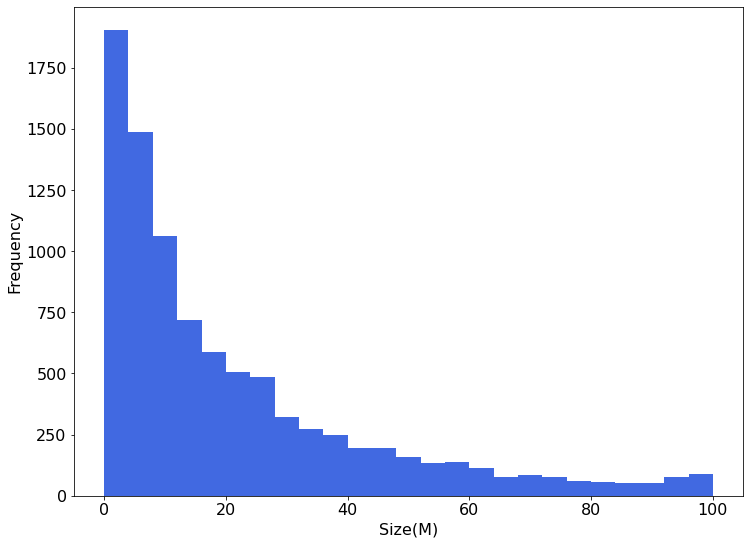

In [81]:
# Histogram
plt.hist(data['Size'],bins=25, color="#4169E1")
#plt.title('Histogram of Size',size=20)
plt.xlabel('Size(M)',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('size_hist.png',bbox_inches = 'tight')
plt.show()

#### Size and Rating

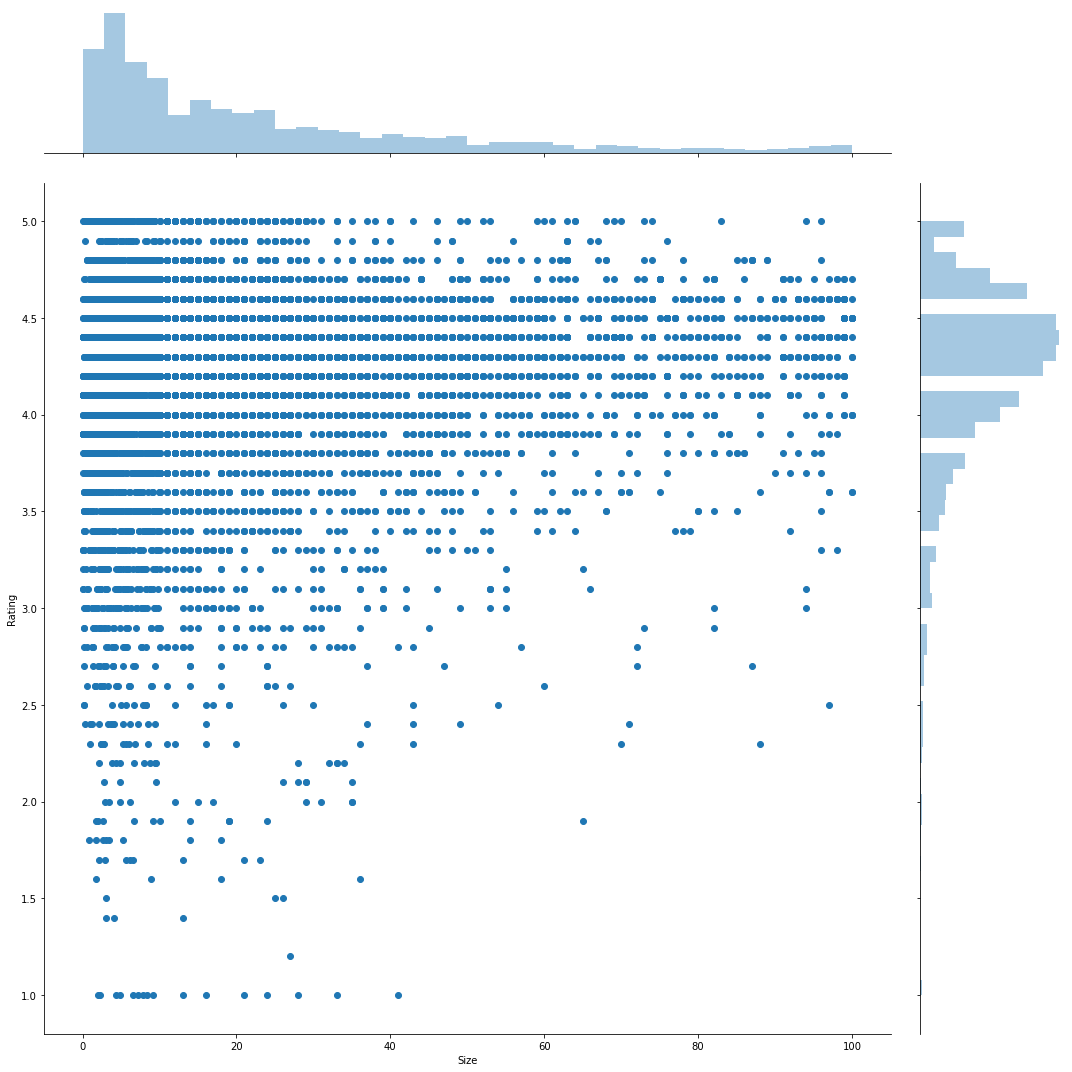

In [82]:
gsr = sns.jointplot(x="Size", y="Rating", data=data,  height=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
gsr.savefig('size_rating_scatter.png',bbox_inches = 'tight')

<Figure size 1440x1440 with 0 Axes>

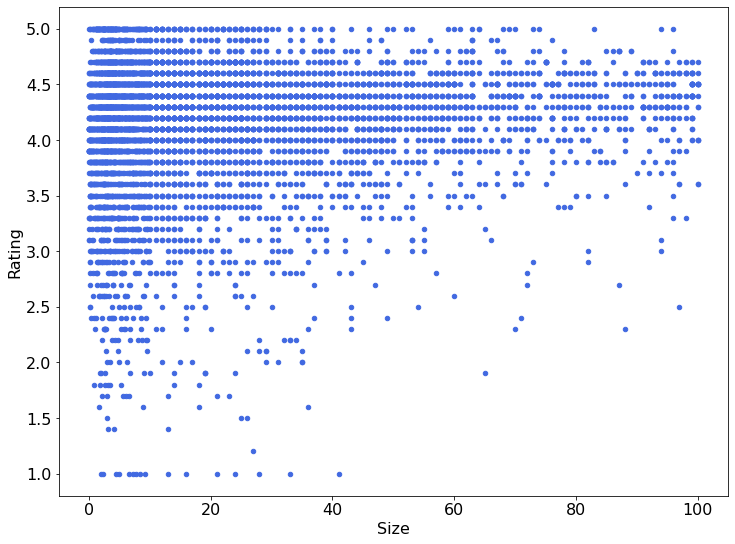

In [83]:
plt.figure(figsize = (20,20));
data.plot(x='Size', y='Rating', kind='scatter',color = "#4169E1")
#plt.title('Scatter Plot of Size and Rating',size=20)
plt.xlabel('Size',size=16)
plt.ylabel('Rating',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('size_rating_scatter.png',bbox_inches = 'tight')
plt.show()

### 5-9. Installs

In [84]:
data['Installs'].describe()

count          10840
unique            21
top       1,000,000+
freq            1579
Name: Installs, dtype: object

In [85]:
# Unique "Installs"
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [86]:
data['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [87]:
# Remove "+"s
data.Installs = data.Installs.apply(lambda x: x.replace(',',''))
data.Installs = data.Installs.apply(lambda x: x.replace('+',''))
data.Installs = data.Installs.apply(lambda x: int(x))

Note that 0+ is merged with 0s.

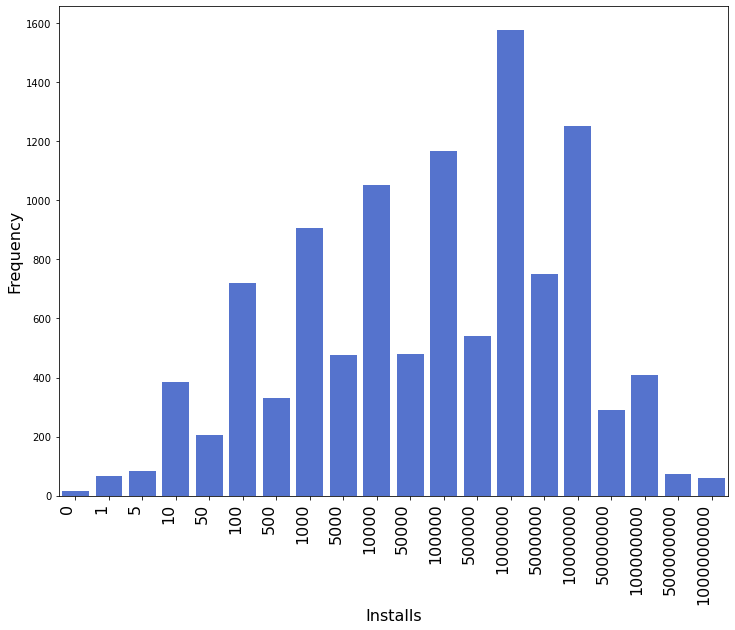

In [88]:
gi=sns.countplot(x="Installs",data=data, color = "#4169E1");
gi.set_xticklabels(gi.get_xticklabels(), rotation=90, ha="right", size=16);#
#plt.title('Bar Plot of Installs for Apps',size = 20)
plt.xlabel('Installs',size=16)
plt.ylabel('Frequency',size=16)
plt.savefig('installs_bar.png',bbox_inches = 'tight')

### Installs and Rating

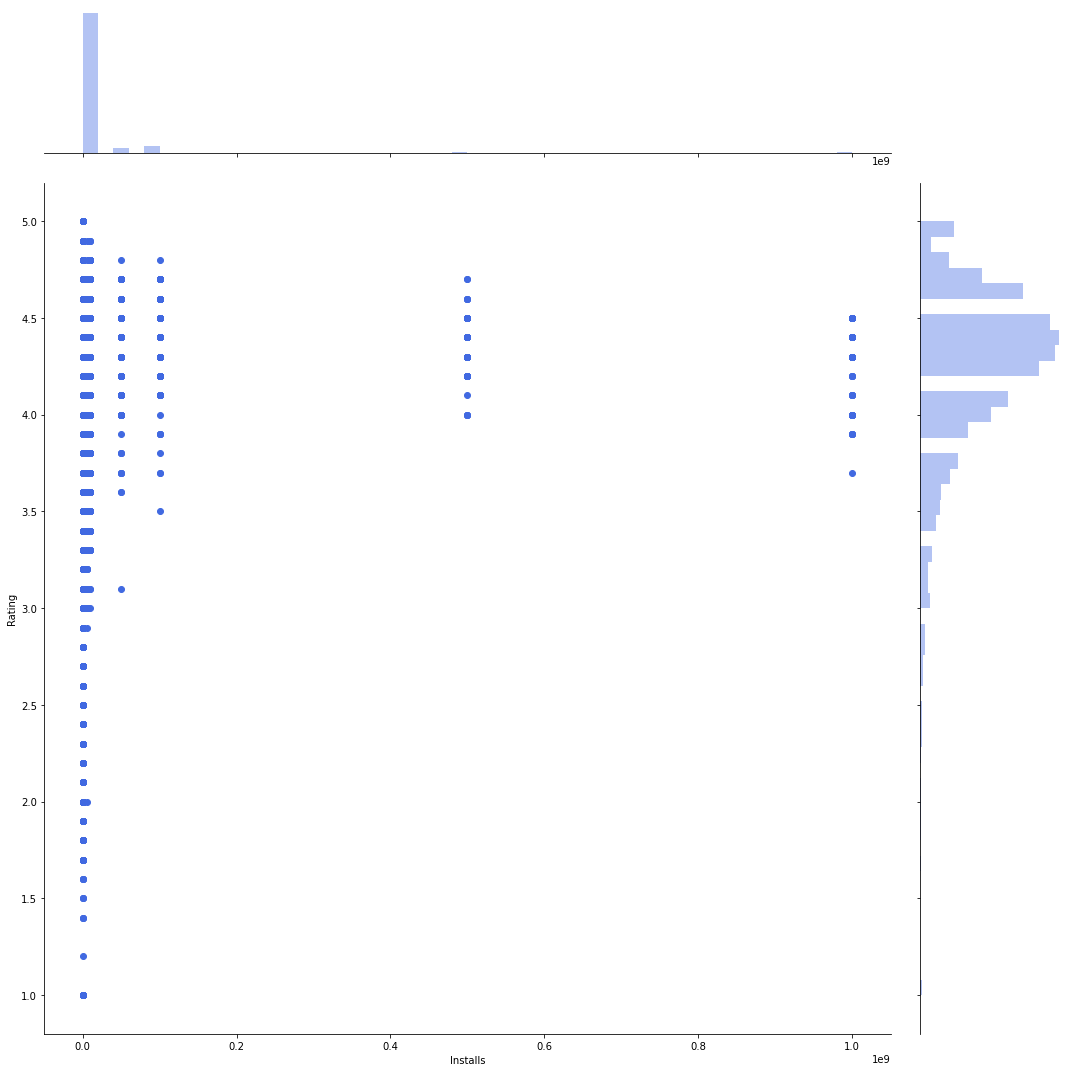

In [89]:
gir = sns.jointplot(x="Installs", y="Rating", data=data, height=15, color="#4169E1")
gir.savefig('installs.png',bbox_inches = 'tight')

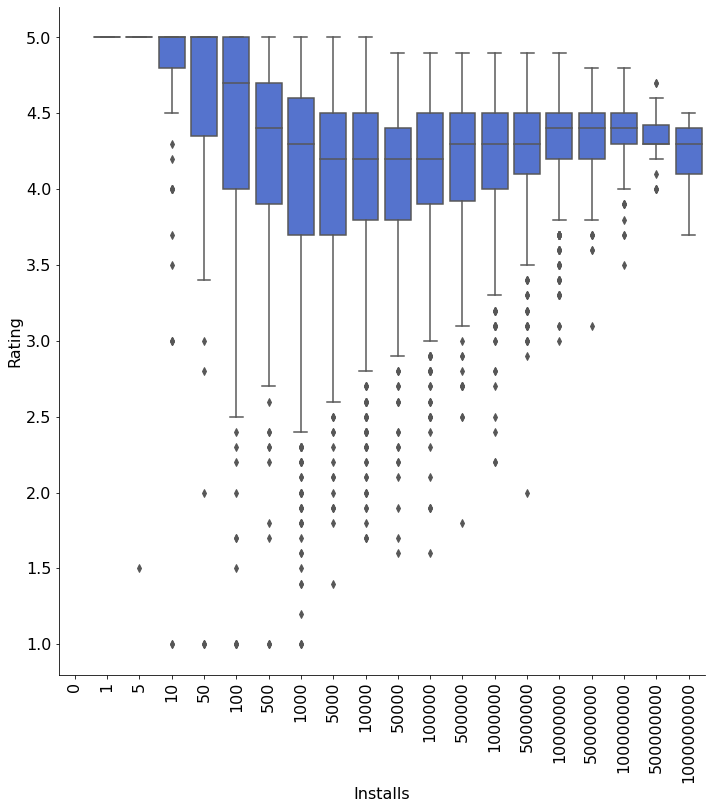

In [90]:
gri = sns.catplot(x="Installs",y="Rating",data=data, kind="box", height = 10 ,color = "#4169E1")
gri.set_xticklabels(rotation=90)
plt.xlabel('Installs',size=16)
plt.ylabel('Rating',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#plt.title('Box Plot of Rating for Apps with Different Number of Installs',size = 20);
plt.savefig('installs_rating_box.png',bbox_inches = 'tight')

In [91]:
col='Installs'

v1=rabove[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)

v2=rbelow[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)

trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Above Average Rating", marker=dict(color="#FF8C00"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Below Average Rating", marker=dict(color="#4169E1"))
y = [trace1, trace2]

layout={'title':"Number of Installs",'xaxis':{'title':"Installs"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)


There is no distinct difference in patterns between the apps with above averagerating and below average rating in number of installs. 

### 5-10. Type

In [92]:
data['Type'].describe()

count     10839
unique        2
top        Free
freq      10039
Name: Type, dtype: object

In [93]:
# Unique "Type"
data['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [94]:
data['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

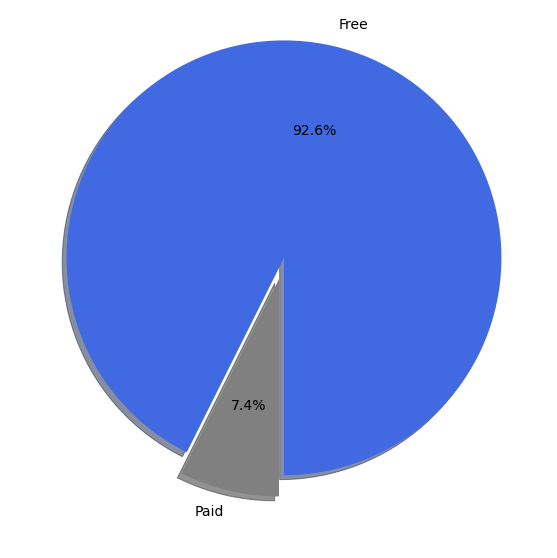

In [95]:
# Plot pie chart
labels =data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)

colors = ["#4169E1","#808080"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 10,10

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,textprops={'fontsize': 14})

#plt.title('Percent of Free Apps in Google Store',size = 20)
plt.savefig('type_pie.png',bbox_inches = 'tight')
plt.show()

In [96]:
col = "Type"
colors = ["#4169E1","#FF8C00"]
grouped = data[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.1, 0])
layout = {'title': 'Percentage of Apps that are Paid and Free'}
fig = go.Figure(data = [trace], layout = layout)
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,marker=dict(colors=colors, line=dict(color='#000000', width=0.5)))            
iplot(fig)

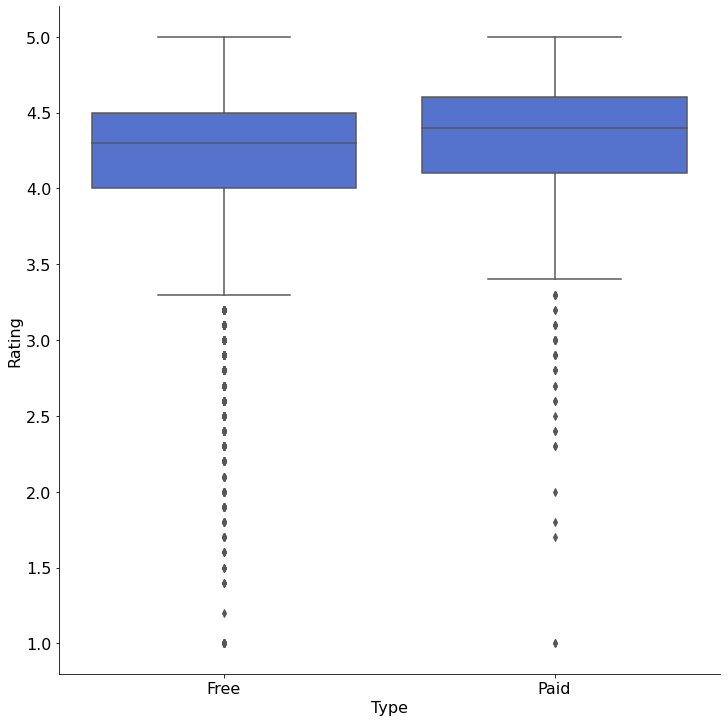

In [97]:
grt = sns.catplot(x="Type",y="Rating",data=data,height=10, kind="box",color = "#4169E1")
plt.xlabel('Type',size=16)
plt.ylabel('Rating',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Box Plot of Rating for Apps with Different Types',size = 20);
plt.savefig('type_rating_box.png',bbox_inches = 'tight')

In [98]:
col='Type'

v1=rabove[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)

v2=rbelow[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)

trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Above Average Rating", marker=dict(color="#FF8C00"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Below Average Rating", marker=dict(color="#4169E1"))
y = [trace1, trace2]

layout={'title':"Number of Applications for Each Type",'xaxis':{'title':"Installs"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)


The graph suggests that the free apps tend to have higher rating, however since there are way more free apps than paid apps in the data, the conclusions must be drawn with caution. 

### 5-11. Price

In [99]:
data['Price'].describe()

count     10840
unique       92
top           0
freq      10040
Name: Price, dtype: object

In [100]:
# Unique "Price"
data['Price'].unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$1.49 ', '$2.99 ', '$7.99 ',
       '$5.99 ', '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ',
       '$9.00 ', '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ',
       '$16.99 ', '$14.99 ', '$1.00 ', '$29.99 ', '$12.99 ', '$2.49 ',
       '$10.99 ', '$1.50 ', '$19.99 ', '$15.99 ', '$33.99 ', '$74.99 ',
       '$39.99 ', '$3.95 ', '$4.49 ', '$1.70 ', '$8.99 ', '$2.00 ',
       '$3.88 ', '$25.99 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$2.50 ', '$1.59 ',
       '$6.49 ', '$1.29 ', '$5.00 ', '$13.99 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$19.90 ', '$8.49 ', '$1.75 ',
       '$14.00 ', '$4.85 ', '$46.99 ', '$109.99 ', '$154.99 ', '$3.08 ',
       '$2.59 ', '$4.80 ', '$1.96 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$4.29 ', '$2.60 ', '$3.28 ', '$4.60 ',
       '$28.99 ', '$2.95 ', '$2.90 ', '$1.97 ', '$200.00 ', '$89.99 ',
       '$2.56 '

In [101]:
# Remove the dollar sign and make the variable float
data.Price = data.Price.apply(lambda x: x.replace('$',''))
data['Price'] = data['Price'].apply(lambda x: float(x))

In [102]:
data['Price'].describe()

count    10840.000000
mean         1.027368
std         15.949703
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

Max for price is $400!

In [103]:
data['Price'].value_counts()

0.00    10040
0.99      148
2.99      129
1.99       73
4.99       72
        ...  
1.20        1
1.59        1
2.56        1
1.61        1
1.04        1
Name: Price, Length: 92, dtype: int64

In [104]:
data['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

Most of the apps (10040) are $0. Based on the "Type." 10039 apps are actually free and only 800 apps are paid. 

#### Histogram of Price

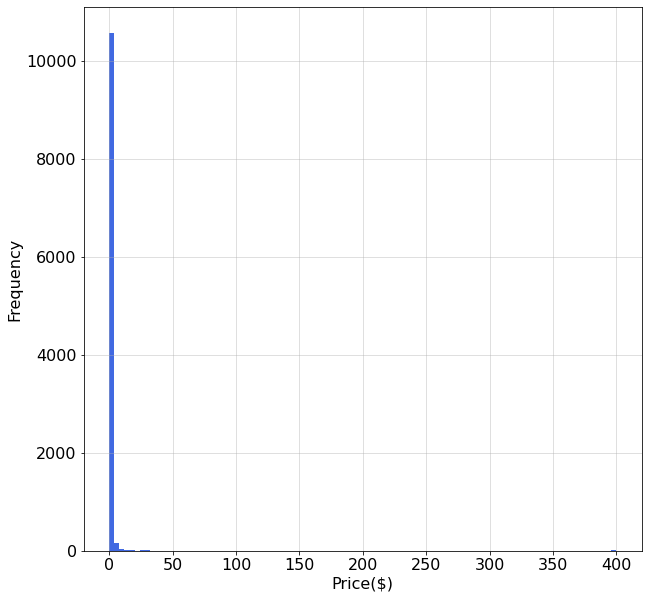

In [105]:
# Histogram
plt.hist(data['Price'],color='#4169E1', bins=100)
#plt.title('Histogram of Price', size=20)
plt.xlabel('Price($)',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(alpha=0.5)
plt.savefig('price_hist.png',bbox_inches = 'tight')
plt.show()

Due to the problem indicated above, the histogram of app price is all clustered around 0, which does not give any informative insight. 

So I deided to look at the histogram of apps that are "Paid."

In [106]:
# Catagorizing the Apps by Price
pfree = data[data['Type']=='Free']
ppaid = data[data['Type']=='Paid']

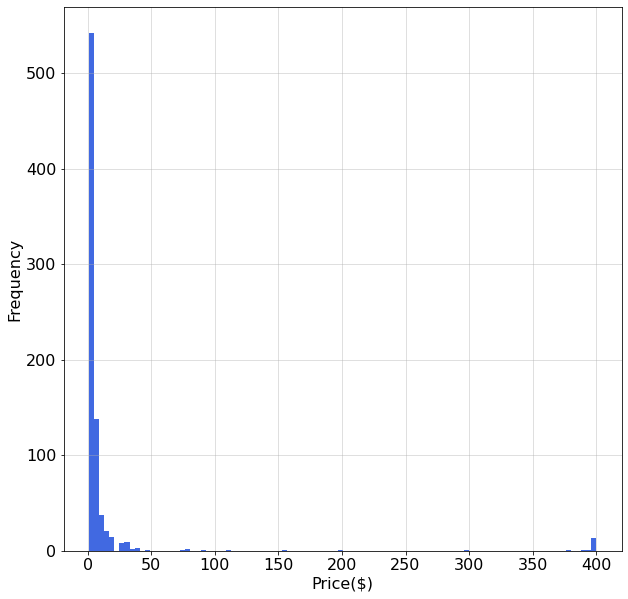

In [107]:
plt.hist(ppaid['Price'], color='#4169E1', bins=100)
#plt.title('Histogram of App Price of Only Paid Apps', size=20)
plt.xlabel('Price($)',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(alpha=0.5)
plt.savefig('pricepaid_hist.png',bbox_inches = 'tight')
plt.show()


(array([0.    , 0.0025, 0.005 , 0.0075, 0.01  , 0.0125, 0.015 , 0.0175,
        0.02  ]),
 <a list of 9 Text major ticklabel objects>)

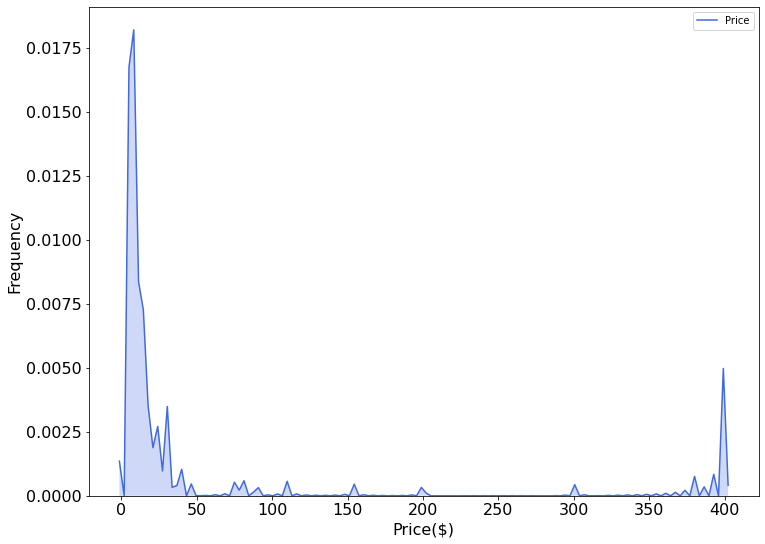

In [108]:
rcParams['figure.figsize'] = 12,9;
gr = sns.kdeplot(ppaid.Price, color="#4169E1", shade = True);
plt.xlabel('Price($)',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Kernel Density Plot of Price');

In [109]:
price_clipped = data['Price'].clip(0,20)

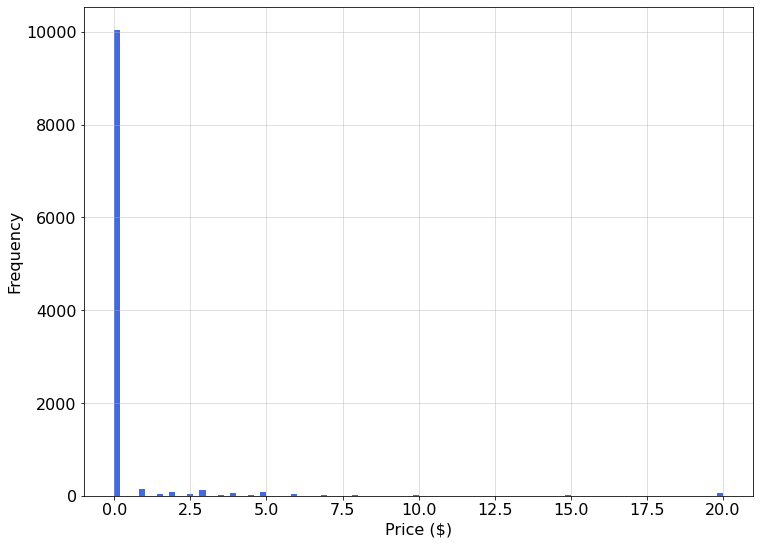

In [110]:
plt.hist(price_clipped,color='#4169E1', bins=100)
#plt.title('Histogram of Number Price Clipped (0,100)',size=20)
plt.xlabel('Price ($)',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(alpha=0.5)
plt.savefig('price_clipped.png',bbox_inches = 'tight')
plt.show()

#### Price and Rating

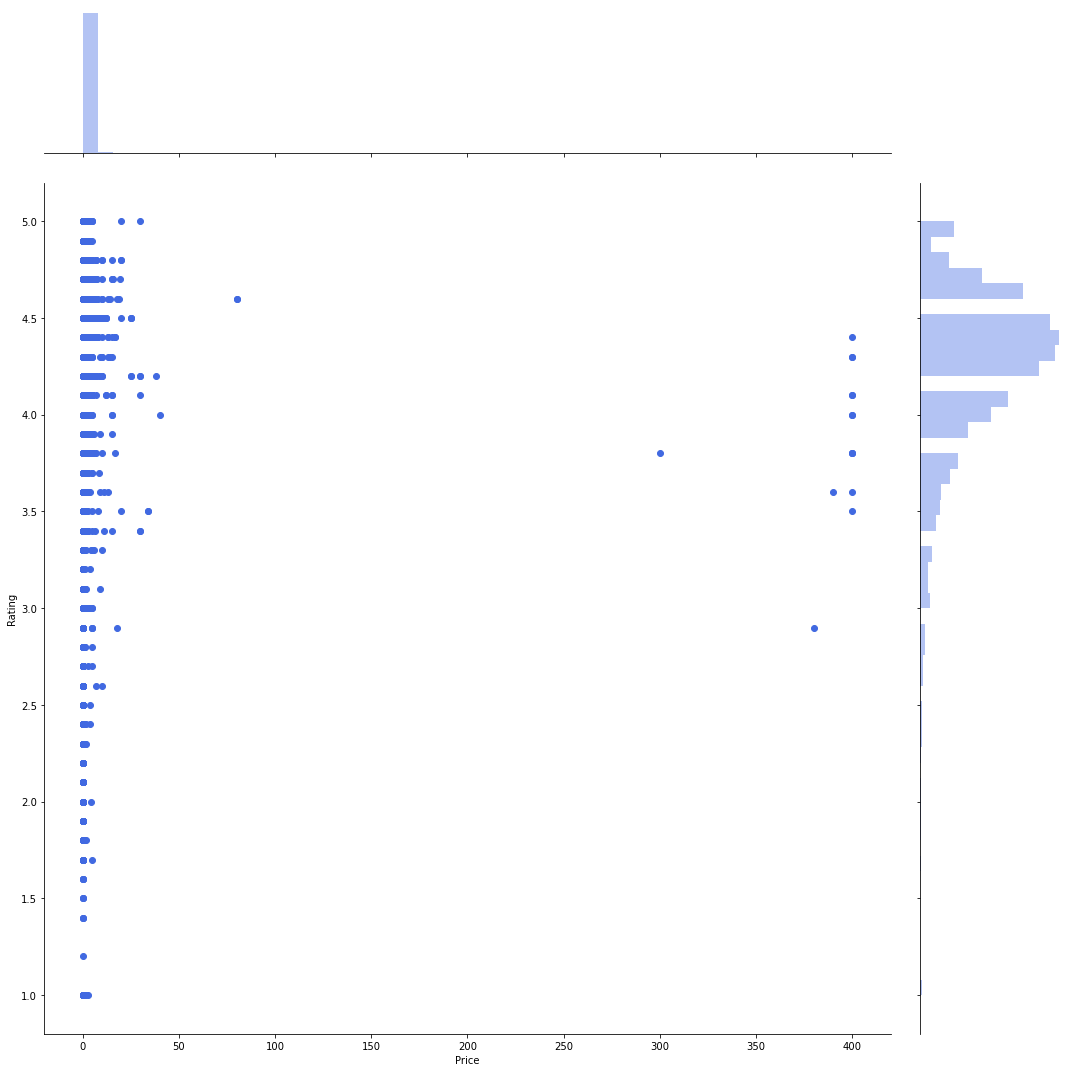

In [111]:
gpr = sns.jointplot(x="Price", y="Rating", data=data, height=15, color="#4169E1");

<Figure size 1440x1440 with 0 Axes>

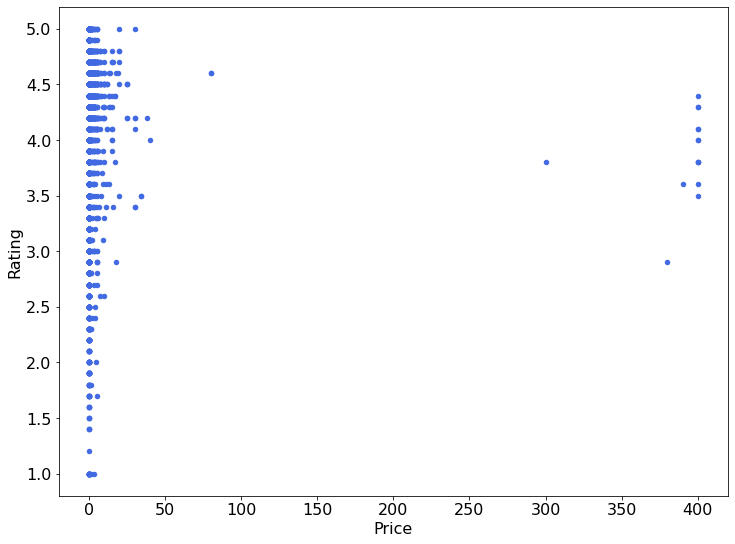

In [112]:
plt.figure(figsize = (20,20));
data.plot(x='Price', y='Rating', kind='scatter',color = "#4169E1")
#plt.title('Scatter Plot of Price and Rating',size=20)
plt.xlabel('Price',size=16)
plt.ylabel('Rating',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('price_rating_scatter.png',bbox_inches = 'tight')
plt.show()

The rating tends to decrease with the increase in price. 

### 5-12. Last Updated

In [113]:
data['Last Updated'].describe()

count        10840
unique        1377
top       3-Aug-18
freq           326
Name: Last Updated, dtype: object

In [114]:
# Unique "Installs"
data['Last Updated'].unique()

array(['7-Jan-18', '15-Jan-18', '1-Aug-18', ..., '20-Jan-14', '16-Feb-14',
       '23-Mar-14'], dtype=object)

In [115]:
data['Last Updated'].value_counts()

3-Aug-18     326
2-Aug-18     304
31-Jul-18    294
1-Aug-18     285
30-Jul-18    211
            ... 
25-Sep-15      1
24-Jan-14      1
4-Nov-17       1
23-Jun-11      1
13-Jan-15      1
Name: Last Updated, Length: 1377, dtype: int64

In [116]:
#Convert to datetime object
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data['Last Updated'].describe()

count                   10840
unique                   1377
top       2018-08-03 00:00:00
freq                      326
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: Last Updated, dtype: object

In [117]:
data['Last Updated'].max() 

Timestamp('2018-08-08 00:00:00')

In [118]:
data['Last Updated'].min()

Timestamp('2010-05-21 00:00:00')

In order to include "Last Updated" into the machine learning model, I have decided to only select the month that the applications have been last updated. 

In [119]:
data['Month'] = data['Last Updated'].dt.month

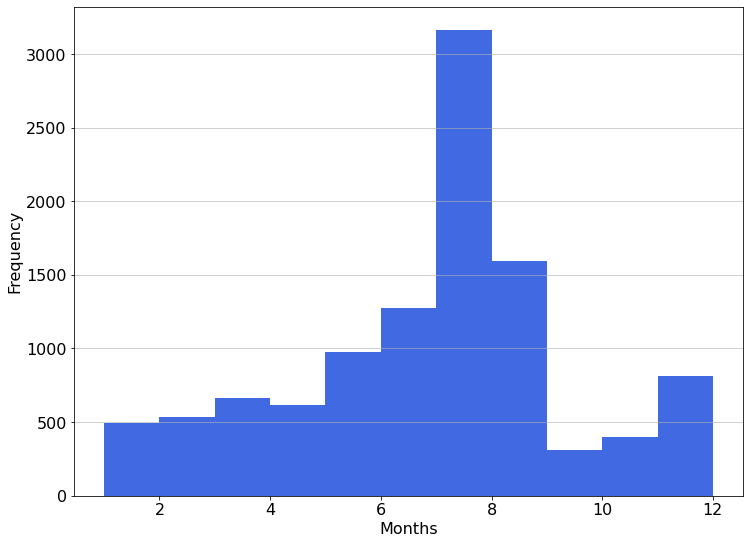

In [120]:
bins_list = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.hist(data['Month'],bins=bins_list,color='#4169E1')
plt.grid(axis='y', alpha=0.75);
plt.xlabel('Months',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Histogram of Last Updated Months', size=20);
plt.savefig('months_hist.png',bbox_inches = 'tight')

In [121]:
col='Month'
v1=data[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], marker=dict(color="gold"))
layout={'title':"Number of added over the month",'xaxis':{'title':"months"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

Interestingly, there were the most number of apps added in the month of July (7).

#### Last Updated Month and Rating

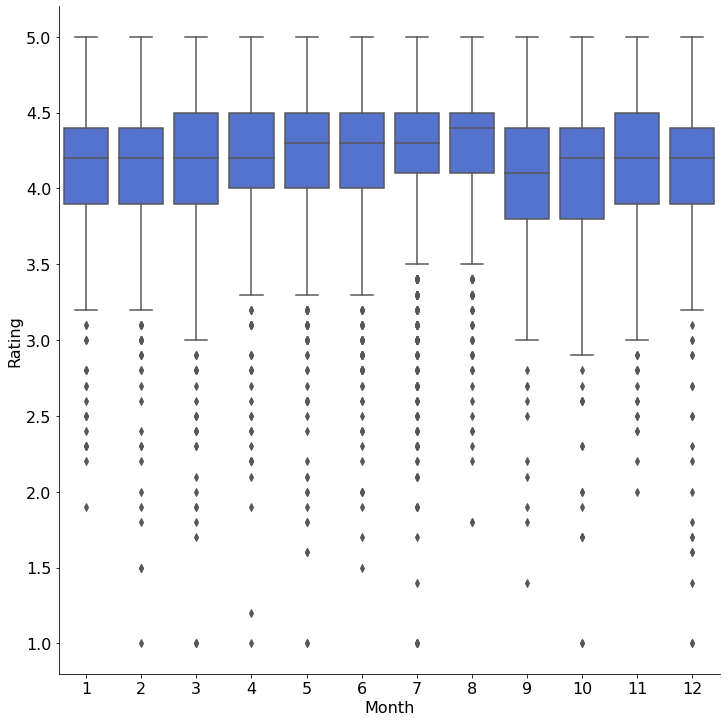

In [122]:
gg = sns.catplot(x="Month",y="Rating",data=data,  kind="box", height = 10, color="#4169E1")
gg.set_xticklabels()
gg = gg.set_ylabels("Rating")
plt.xlabel('Month',size=16)
plt.ylabel('Rating',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.grid(alpha=0.5)
#plt.title('Box plot of Rating for Each Last Updated Months',size = 20)
plt.savefig('month_rating_box.png',bbox_inches = 'tight')

### 5-13. Current Ver

In [123]:
data['Current Ver'].describe()

count                  10832
unique                  2783
top       Varies with device
freq                    1459
Name: Current Ver, dtype: object

In [124]:
# Unique "Current Ver"
data['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

### 5-14. Android Ver

In [125]:
data['Android Ver'].describe()

count          10838
unique            33
top       4.1 and up
freq            2451
Name: Android Ver, dtype: object

In [126]:
# Unique "Android Ver"
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

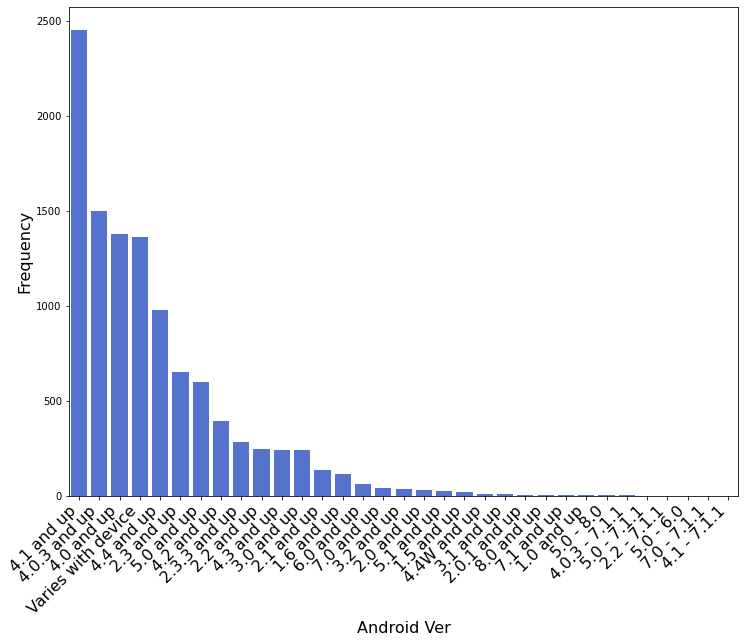

In [127]:
gi=sns.countplot(x="Android Ver",data=data, color = "#4169E1",order = data['Android Ver'].value_counts().index)
gi.set_xticklabels(gi.get_xticklabels(), rotation=45, ha="right", size=16);#
plt.xlabel('Android Ver',size=16)
plt.ylabel('Frequency',size=16)
plt.savefig('andver_bar.png',bbox_inches = 'tight')

In [128]:
data['av']=data['Android Ver'].astype(str).str[0]

In [129]:
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Month,av
App,,,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,1,4
Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up,1,4
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8,4
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,6,4
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4 and up,6,4


In [130]:
data['av'].unique()

array(['4', '2', '3', 'V', '5', '6', '1', '7', '8', 'n'], dtype=object)

There are V (varies with device) and n (nan). I have decided to merge them into one cateogry called NA.

In [131]:
data = data.replace({"V":"NA", "n":"NA"})

In [132]:
data['av'].unique()

array(['4', '2', '3', 'NA', '5', '6', '1', '7', '8'], dtype=object)

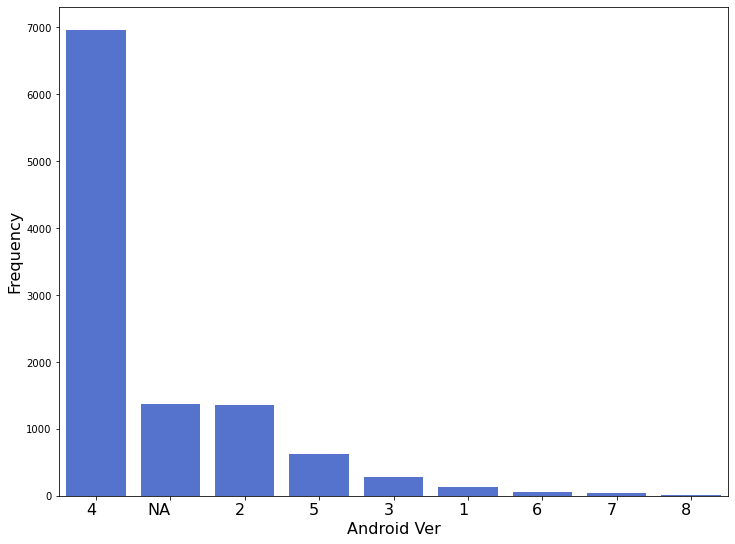

In [133]:
gi=sns.countplot(x="av",data=data, color = "#4169E1", order = data['av'].value_counts().index);
gi.set_xticklabels(gi.get_xticklabels(), ha="right", size=16);
plt.xlabel('Android Ver',size=16)
plt.ylabel('Frequency',size=16)
plt.savefig('andver_barcleaned.png',bbox_inches = 'tight')

### Correlation 

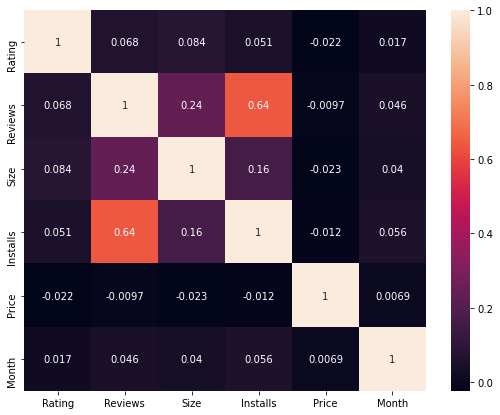

In [134]:
plt.figure(figsize=(9,7))
sns.heatmap(data.corr(),annot=True)
plt.savefig('correlation.png',bbox_inches = 'tight')

There is a moderate positive correlation of 0.64 between the number of installs and reviews. The apps that the customers downloaded more tend to have more reviews. 

## 6. Export the Data

In [135]:
data.to_csv('googleplaystore_1eda.csv', index = False)

## III. Preprocessing

#### - Given all these variables, can we predict when someone updates for the last time?
#### - Given the state of the applciations, can we predict what the rating of the applications would be? 

In [136]:
from sklearn import __version__ as sklearn_version
from sklearn import metrics, svm
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [137]:
# Sort by "Category"
data.sort_values("Category", inplace = True)

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, Photo Editor & Candy Camera & Grid & ScrapBook to Real time Weather Forecast
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        10840 non-null  object        
 1   Rating          9366 non-null   float64       
 2   Reviews         10840 non-null  int64         
 3   Size            9145 non-null   float64       
 4   Installs        10840 non-null  int64         
 5   Type            10839 non-null  object        
 6   Price           10840 non-null  float64       
 7   Content Rating  10840 non-null  object        
 8   Genres          10840 non-null  object        
 9   Last Updated    10840 non-null  datetime64[ns]
 10  Current Ver     10832 non-null  object        
 11  Android Ver     10838 non-null  object        
 12  Month           10840 non-null  int64         
 13  av              10840 non-null  object       

"Current Ver" and "Android Ver" will not be included in our model, and therefore will be dropped. 

In [139]:
df = data
df = df.drop(columns = ['Current Ver', 'Android Ver'], axis=1) #axis=1: drop column
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Month,av
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.00,Everyone,Art & Design,2018-01-07,1,4
How to draw Ladybug and Cat Noir,ART_AND_DESIGN,3.8,564,9.2,100000,Free,0.00,Everyone,Art & Design,2018-07-11,7,4
UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24.0,500000,Free,0.00,Everyone,Art & Design,2018-08-02,8,4
Floor Plan Creator,ART_AND_DESIGN,4.1,36639,NaN,5000000,Free,0.00,Everyone,Art & Design,2018-07-14,7,2
PIP Camera - PIP Collage Maker,ART_AND_DESIGN,4.7,158,11.0,10000,Free,0.00,Everyone,Art & Design,2017-11-29,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...
wetter.com - Weather and Radar,WEATHER,4.2,189310,38.0,10000000,Free,0.00,Everyone,Weather,2018-08-06,8,NA
Yahoo Weather,WEATHER,4.4,1312037,NaN,10000000,Free,0.00,Everyone,Weather,2018-08-01,8,NA
Klara weather,WEATHER,4.6,36900,4.8,500000,Free,0.00,Everyone,Weather,2018-07-28,7,4


## 1. Missing Values 

In [140]:
total=df.isnull().sum()
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Category,0,0.000000
Rating,1474,0.135978
Reviews,0,0.000000
Size,1695,0.156365
Installs,0,0.000000
Type,1,0.000092
Price,0,0.000000
Content Rating,0,0.000000
Genres,0,0.000000
Last Updated,0,0.000000


Rating and Size have over 1000 missing values. The missing values for the Rating and Size will be imputed with the medians. 

Type, on the other hand, has only 1 missing value. This specific row will be examined and determine whether the Type should be "Paid" or "Free" based on the Price variable. 

### Imputation with Median

#### Rating - impute with median

In [141]:
imputer = SimpleImputer()

In [142]:
# Replace "NaN" with median
df['Rating'] = imputer.fit_transform(df[['Rating']])

#### Size - impute with median

In [143]:
# Replace "NaN" with median
df['Size'] = imputer.fit_transform(df[['Size']])

In [144]:
total=df.isnull().sum()
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Category,0,0.000000
Rating,0,0.000000
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000
Type,1,0.000092
Price,0,0.000000
Content Rating,0,0.000000
Genres,0,0.000000
Last Updated,0,0.000000


#### Type

In [145]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Month,av
App,,,,,,,,,,,,
Command & Conquer: Rivals,FAMILY,4.191757,0,21.51653,0,NaN,0.0,Everyone 10+,Strategy,2018-06-28,6,NA


Since the Price for this app is 0, we can assume that the Type is Free.

In [146]:
# Replace the NaN value for Type with "Free"
df['Type'].fillna(value="Free", axis=0, inplace=True)

In [147]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Month,av
App,,,,,,,,,,,,


In [148]:
total=df.isnull().sum()
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Category,0,0.0
Rating,0,0.0
Reviews,0,0.0
Size,0,0.0
Installs,0,0.0
Type,0,0.0
Price,0,0.0
Content Rating,0,0.0
Genres,0,0.0
Last Updated,0,0.0


## 1. Integer Encoding 

### Convert all the variables into numerical format

In [149]:
df_int = df
df_int.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, Photo Editor & Candy Camera & Grid & ScrapBook to Real time Weather Forecast
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        10840 non-null  object        
 1   Rating          10840 non-null  float64       
 2   Reviews         10840 non-null  int64         
 3   Size            10840 non-null  float64       
 4   Installs        10840 non-null  int64         
 5   Type            10840 non-null  object        
 6   Price           10840 non-null  float64       
 7   Content Rating  10840 non-null  object        
 8   Genres          10840 non-null  object        
 9   Last Updated    10840 non-null  datetime64[ns]
 10  Month           10840 non-null  int64         
 11  av              10840 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 1.1+ MB


"Category", "Type", "Content Rating", and "Genres" are string objects and therefore will be converted into numeric values.

#### 1) Cateogry

In [150]:
# Cleaning Categories into integers
CategoryString = df_int["Category"]
categoryVal = df_int["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
df["Category"] = df["Category"].map(category_dict).astype(int)

In [151]:
category_dict

{'ART_AND_DESIGN': 0,
 'AUTO_AND_VEHICLES': 1,
 'BEAUTY': 2,
 'BOOKS_AND_REFERENCE': 3,
 'BUSINESS': 4,
 'COMICS': 5,
 'COMMUNICATION': 6,
 'DATING': 7,
 'EDUCATION': 8,
 'ENTERTAINMENT': 9,
 'EVENTS': 10,
 'FAMILY': 11,
 'FINANCE': 12,
 'FOOD_AND_DRINK': 13,
 'GAME': 14,
 'HEALTH_AND_FITNESS': 15,
 'HOUSE_AND_HOME': 16,
 'LIBRARIES_AND_DEMO': 17,
 'LIFESTYLE': 18,
 'MAPS_AND_NAVIGATION': 19,
 'MEDICAL': 20,
 'NEWS_AND_MAGAZINES': 21,
 'PARENTING': 22,
 'PERSONALIZATION': 23,
 'PHOTOGRAPHY': 24,
 'PRODUCTIVITY': 25,
 'SHOPPING': 26,
 'SOCIAL': 27,
 'SPORTS': 28,
 'TOOLS': 29,
 'TRAVEL_AND_LOCAL': 30,
 'VIDEO_PLAYERS': 31,
 'WEATHER': 32}

#### 2) Genre

In [152]:
GenresVal = df_int.Genres.unique()
genres_dict = {}
for i in range(len(GenresVal)):
    genres_dict[GenresVal[i]] = i
df_int['Genres'] = df_int['Genres'].map(genres_dict).astype(int)

In [153]:
genres_dict

{'Art & Design': 0,
 'Auto & Vehicles': 1,
 'Beauty': 2,
 'Books & Reference': 3,
 'Business': 4,
 'Comics': 5,
 'Communication': 6,
 'Dating': 7,
 'Education': 8,
 'Entertainment': 9,
 'Events': 10,
 'Casual': 11,
 'Simulation': 12,
 'Puzzle': 13,
 'Role Playing': 14,
 'Strategy': 15,
 'Educational': 16,
 'Adventure': 17,
 'Health & Fitness': 18,
 'Lifestyle': 19,
 'Arcade': 20,
 'Action': 21,
 'Racing': 22,
 'Video Players & Editors': 23,
 'Sports': 24,
 'Trivia': 25,
 'Card': 26,
 'Board': 27,
 'Music & Audio': 28,
 'Music': 29,
 'Finance': 30,
 'Food & Drink': 31,
 'Word': 32,
 'Casino': 33,
 'House & Home': 34,
 'Libraries & Demo': 35,
 'Maps & Navigation': 36,
 'Medical': 37,
 'News & Magazines': 38,
 'Parenting': 39,
 'Personalization': 40,
 'Photography': 41,
 'Productivity': 42,
 'Shopping': 43,
 'Social': 44,
 'Tools': 45,
 'Travel & Local': 46,
 'Weather': 47}

#### 3) Type

In [154]:
#Converting Type classification into binary
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

df_int['Type'] = df_int['Type'].map(type_cat)

#### 4) Content Rating

In [155]:
RatingVal = df_int['Content Rating'].unique()
rating_dict = {}
for i in range(len(RatingVal)):
    rating_dict[RatingVal[i]] = i
df_int['Content Rating'] = df_int['Content Rating'].map(rating_dict).astype(int)

In [156]:
rating_dict

{'Everyone': 0,
 'Teen': 1,
 'Everyone 10+': 2,
 'Mature 17+': 3,
 'Adults only 18+': 4,
 'Unrated': 5}

#### 5) Android Version

In [157]:
avVal = df_int.av.unique()
av_dict = {}
for i in range(len(avVal)):
    av_dict[avVal[i]] = i
df_int['av'] = df_int['av'].map(av_dict).astype(int)

##### Make sure that other variables are all numeric as well

In [158]:
# Change datatype
df_int['Reviews'] = pd.to_numeric(df_int['Reviews'])
df_int['Installs'] = pd.to_numeric(df_int['Installs'])
df_int['Price'] = pd.to_numeric(df_int['Price'])

In [159]:
df_int.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, Photo Editor & Candy Camera & Grid & ScrapBook to Real time Weather Forecast
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        10840 non-null  int32         
 1   Rating          10840 non-null  float64       
 2   Reviews         10840 non-null  int64         
 3   Size            10840 non-null  float64       
 4   Installs        10840 non-null  int64         
 5   Type            10840 non-null  int64         
 6   Price           10840 non-null  float64       
 7   Content Rating  10840 non-null  int32         
 8   Genres          10840 non-null  int32         
 9   Last Updated    10840 non-null  datetime64[ns]
 10  Month           10840 non-null  int64         
 11  av              10840 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(4), int64(4)
memory usage: 931.6+ KB


## 3. Dummy Coding 

##### Dummy Coding
df2 is a new dataframe that contains dummy coded variables. 

In [160]:
# for dummy variable encoding for Categories
df_d_nogen = pd.get_dummies(df, columns=['Category','Content Rating', 'Type','av'],drop_first=True)

In [161]:
df_d_nogen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, Photo Editor & Candy Camera & Grid & ScrapBook to Real time Weather Forecast
Data columns (total 54 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Rating            10840 non-null  float64       
 1   Reviews           10840 non-null  int64         
 2   Size              10840 non-null  float64       
 3   Installs          10840 non-null  int64         
 4   Price             10840 non-null  float64       
 5   Genres            10840 non-null  int32         
 6   Last Updated      10840 non-null  datetime64[ns]
 7   Month             10840 non-null  int64         
 8   Category_1        10840 non-null  uint8         
 9   Category_2        10840 non-null  uint8         
 10  Category_3        10840 non-null  uint8         
 11  Category_4        10840 non-null  uint8         
 12  Category_5        10840 non-null  uint8         
 13  Category_6     

In [162]:
df_d = pd.get_dummies(df, columns=['Category', 'Genres', 'Content Rating', 'Type','av'],drop_first=True)

In [163]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, Photo Editor & Candy Camera & Grid & ScrapBook to Real time Weather Forecast
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Rating            10840 non-null  float64       
 1   Reviews           10840 non-null  int64         
 2   Size              10840 non-null  float64       
 3   Installs          10840 non-null  int64         
 4   Price             10840 non-null  float64       
 5   Last Updated      10840 non-null  datetime64[ns]
 6   Month             10840 non-null  int64         
 7   Category_1        10840 non-null  uint8         
 8   Category_2        10840 non-null  uint8         
 9   Category_3        10840 non-null  uint8         
 10  Category_4        10840 non-null  uint8         
 11  Category_5        10840 non-null  uint8         
 12  Category_6        10840 non-null  uint8         
 13  Category_7    

## IV. Training and Modeling

### Set Up for Evaluation of Models Using Different Metrics 
To evaluate models, decided 

In [164]:
# Define "Evaluationmatrix"
def Evaluationmatrix(y_true, y_predict):
    print ('R Squared Score: '+ str(metrics .r2_score(y_true,y_predict)))
    print ('Mean Absolute Error: '+ str(metrics.mean_absolute_error(y_true,y_predict)))
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_true,y_predict)))

In [165]:
#to add into results_index for evaluation of error term 
def Evaluationmatrix_dict(y_true, y_predict, name = 'Linear - Integer'):
    dict_matrix = {}
    dict_matrix['Series Name'] = name
    dict_matrix['R Squared Score'] = metrics.r2_score(y_true,y_predict)
    dict_matrix['Mean Absolute Error'] = metrics.mean_absolute_error(y_true,y_predict)
    dict_matrix['Mean Squared Error'] = metrics.mean_squared_error(y_true,y_predict)
    return dict_matrix

#### Predicting the rating of applications in Google Play App Store, given varaibles - category, reviews, size, installs, price and content rating.


## 1. Integer Encoded + Median Imputed
##### a) Feature selection

In [166]:
df_int.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, Photo Editor & Candy Camera & Grid & ScrapBook to Real time Weather Forecast
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        10840 non-null  int32         
 1   Rating          10840 non-null  float64       
 2   Reviews         10840 non-null  int64         
 3   Size            10840 non-null  float64       
 4   Installs        10840 non-null  int64         
 5   Type            10840 non-null  int64         
 6   Price           10840 non-null  float64       
 7   Content Rating  10840 non-null  int32         
 8   Genres          10840 non-null  int32         
 9   Last Updated    10840 non-null  datetime64[ns]
 10  Month           10840 non-null  int64         
 11  av              10840 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(4), int64(4)
memory usage: 931.6+ KB


In [167]:
# Features selection
X_int = df_int.drop(labels = ['Rating', 'Last Updated'],axis = 1)

In [168]:
# Label selection
y=df_int.Rating

In [169]:
# For testing purpose
X_train, X_test, y_train, y_test = train_test_split(X_int, y, test_size=0.3)

In [170]:
X_train.shape, X_test.shape

((7588, 10), (3252, 10))

In [171]:
y_train.shape, y_test.shape

((7588,), (3252,))

### 1) Linear Regression Model

#### Scale the data
For linear regression, after populating the missing values with median of each feature, the data has to be scaled to zero and unit variances.  

In [172]:
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_test)

In [173]:
# Train the model on the train split
lm = LinearRegression()
lm.fit(X_tr_scaled, y_train)

LinearRegression()

In [174]:
#make predictions using the model on both train and test splits
y_te_pred = lm.predict(X_te_scaled)

In [175]:
results = y_te_pred

##### Assess model performance

In [176]:
resultsdf = pd.DataFrame()
resultsdf = resultsdf.from_dict(Evaluationmatrix_dict(y_test,results),orient = 'index')
resultsdf = resultsdf.transpose()

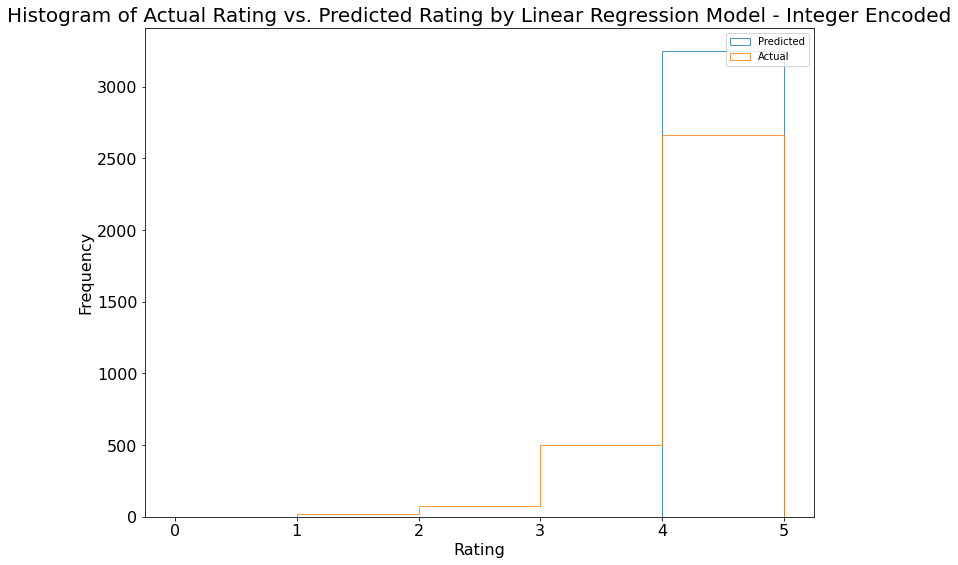

In [177]:
bins_list = [0,1,2,3,4,5]
plt.hist(results, bins_list, alpha=0.8, label='Predicted', histtype='step')
plt.hist(y_test, bins_list, alpha=0.8, label='Actual', histtype='step')
plt.legend(loc='upper right')
plt.title('Histogram of Actual Rating vs. Predicted Rating by Linear Regression Model - Integer Encoded', size=20)
plt.xlabel('Rating',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

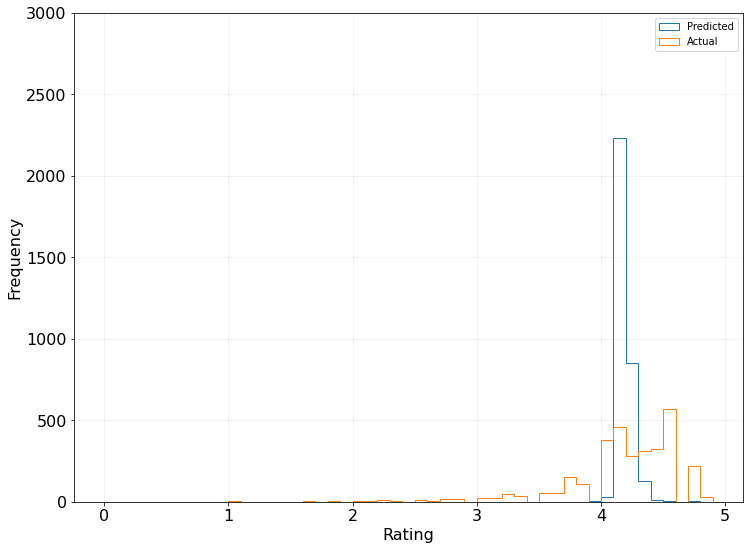

In [178]:
bins_list2 = np.arange(0,5,0.1)

plt.hist(results, bins=bins_list2, label='Predicted', histtype='step')
plt.hist(y_test, bins=bins_list2, label='Actual',histtype='step')
plt.legend(loc='upper right')
#plt.title('Histogram of Actual vs. Predicted Rating by LR Model- Integer Encoded', size=20)
plt.xlabel('Rating',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(alpha=0.2)
plt.ylim([0,3000])
plt.savefig('ActualvsPredicted_IntLinear',bbox_inches = 'tight')
plt.show()

The histogram shows that linear regression model on predicting the rating of applications might not be the accurate model. 

In [179]:
results_np = np.array(results)
y_test_np = np.array(y_test)
diff = y_test_np-results_np

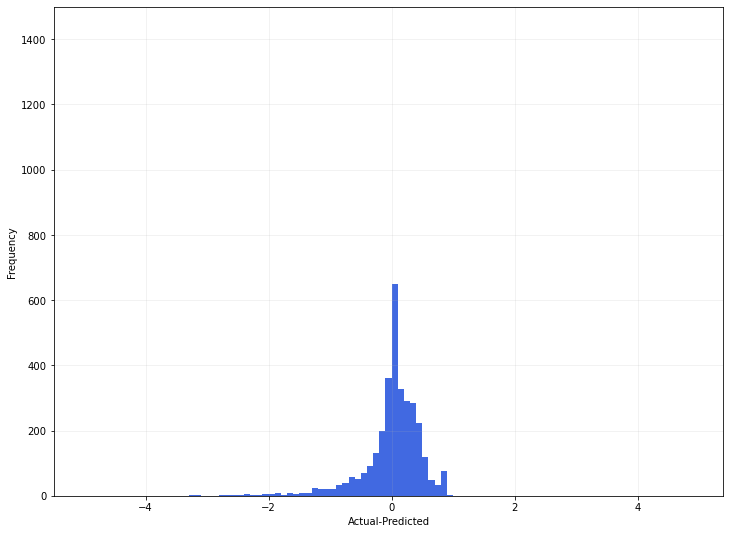

In [180]:
bins_list3 = np.arange(-5,5,0.1)
plt.hist(diff, bins=bins_list3, range=[-5,5], color="#4169E1")
#plt.title('Difference between Actual Value and Linear Regression Model Predicted Values for Rating - Integer Encoded')
plt.xlabel('Actual-Predicted')
plt.ylabel('Frequency')
plt.grid(alpha=0.2)
plt.ylim([0,1500])
plt.savefig('Diff_Intlinear',bbox_inches = 'tight')
plt.show()

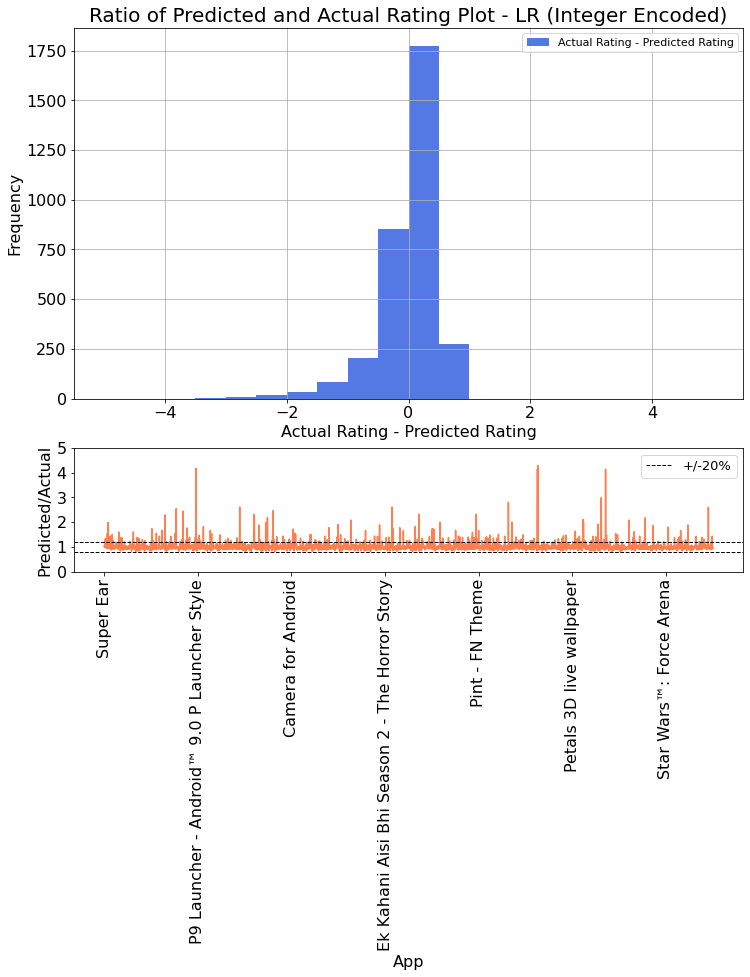

In [181]:
# Ratio Plot
fig = plt.figure(figsize=(12,10))    
gs=gridspec.GridSpec(2, 1, hspace=0.2, height_ratios=[3, 1])
        
ax = fig.add_subplot(gs[0])
diff=  pd.DataFrame(diff)
diff.hist(ax=ax,label='Actual Rating - Predicted Rating',bins=20, range=[-5,5],color='#4169E1', alpha=0.9)

ax.set_ylabel('Frequency', fontsize=16)
ax.set_xlabel('Actual Rating - Predicted Rating',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax.set_title('Ratio of Predicted and Actual Rating Plot - LR (Integer Encoded)',fontsize=20)
plt.legend(loc='best', fontsize=11)
        
ax = fig.add_subplot(gs[1])
(results/y_test).plot(label="", color='#FF7F50')
ax.set_ylim(0,5)
plt.axhline(y=1.2, linestyle='--', color='k', label='+/-20%', linewidth=1)
plt.axhline(y=0.8, linestyle='--', color='k', linewidth=1)
ax.set_ylabel('Predicted/Actual', fontsize=16)
ax.set_xlabel('App',fontsize=16)
plt.xticks(fontsize=16 ,rotation=90)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=13)
plt.savefig('Ratio_IntLinear.png')

In [182]:
print(results.mean(), results.std())

4.191026795955791 0.056283511203969266


### 2) Support Vector Regression (SVR) Model

In [183]:
model2 = svm.SVR()
model2.fit(X_tr_scaled,y_train)

results2 = model2.predict(X_te_scaled)

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,results2, name = 'SVM - Integer'),ignore_index = True)

In [184]:
resultsdf

,Series Name,R Squared Score,Mean Absolute Error,Mean Squared Error
0,Linear - Integer,0.00860552,0.318426,0.236498
1,SVM - Integer,0.022312,0.305911,0.233229


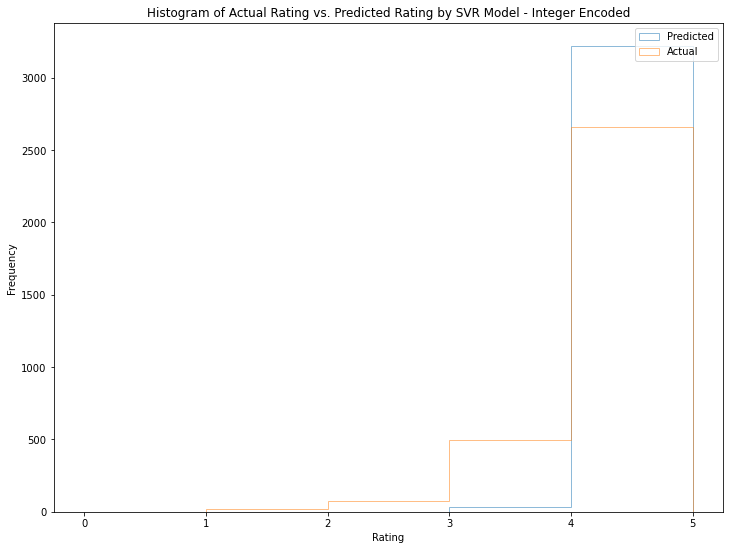

In [185]:
plt.hist(results2, bins_list, alpha=0.5, label='Predicted', histtype='step')
plt.hist(y_test, bins_list, alpha=0.5, label='Actual', histtype='step')
plt.legend(loc='upper right')
plt.title('Histogram of Actual Rating vs. Predicted Rating by SVR Model - Integer Encoded')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

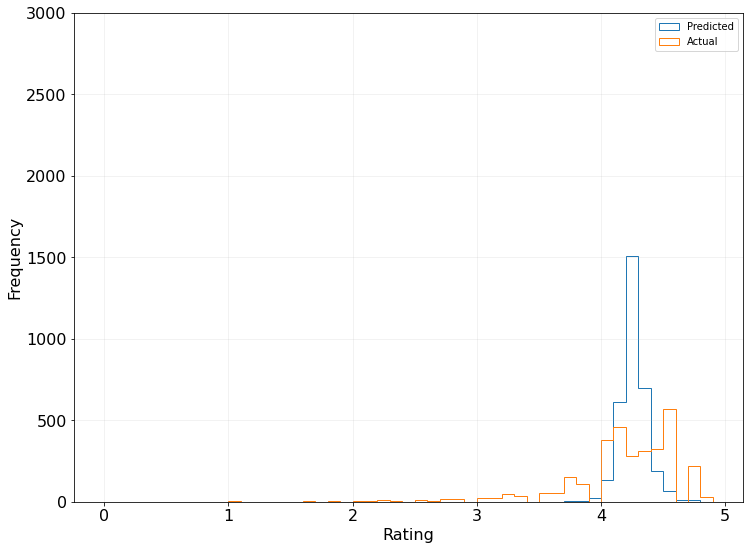

In [186]:
plt.hist(results2, bins=bins_list2, label='Predicted', histtype='step')
plt.hist(y_test, bins=bins_list2, label='Actual',histtype='step')
plt.legend(loc='upper right')
#plt.title('Histogram of Actual vs. Predicted Rating by SVR Model- Integer Encoded', size=20)
plt.xlabel('Rating',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(alpha=0.2)
plt.ylim([0,3000])
plt.savefig('ActualvsPredicted_IntSVR',bbox_inches = 'tight')
plt.show()

In [187]:
results2_np = np.array(results2)
y_test_np = np.array(y_test)
diff2 = y_test_np-results2_np
diff2

array([-0.26754784, -0.11368745, -0.01037421, ..., -0.1691987 ,
        0.32514129,  0.24800398])

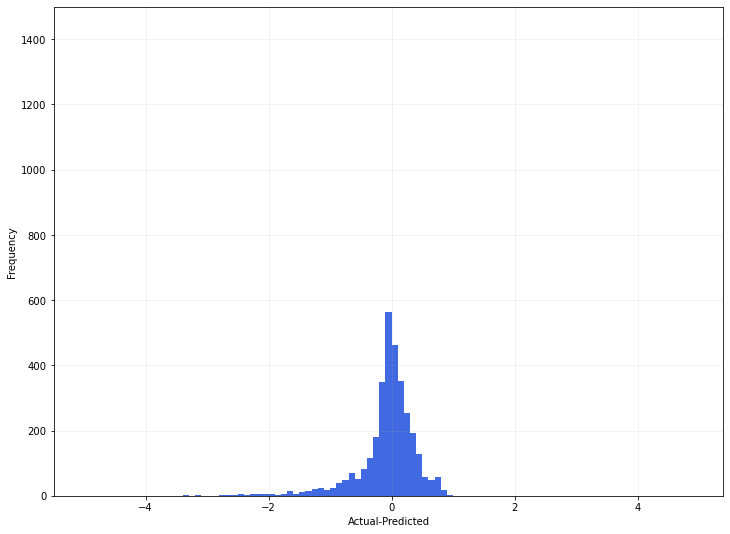

In [188]:
plt.hist(diff2,bins=bins_list3,range=[-5,5], color="#4169E1")
#plt.title('Difference between Actual Value and SVR Model Predicted Values for Rating - Integer Encoded')
plt.xlabel('Actual-Predicted')
plt.ylabel('Frequency')
plt.grid(alpha=0.2)
plt.ylim([0,1500])
plt.savefig('diffInt_SVR',bbox_inches = 'tight')
plt.show()

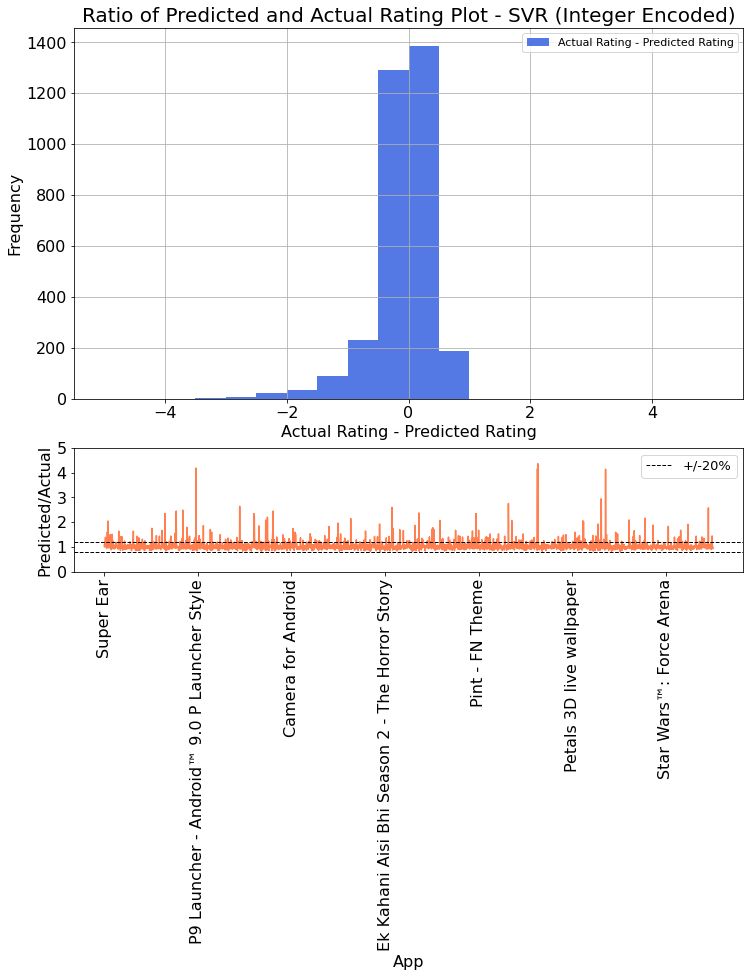

In [189]:
# Ratio Plot
fig = plt.figure(figsize=(12,10))    
gs=gridspec.GridSpec(2, 1, hspace=0.2, height_ratios=[3, 1])
        
ax = fig.add_subplot(gs[0])
diff2=  pd.DataFrame(diff2)
diff2.hist(ax=ax,label='Actual Rating - Predicted Rating',bins=20, range=[-5,5],color='#4169E1', alpha=0.9)

ax.set_ylabel('Frequency', fontsize=16)
ax.set_xlabel('Actual Rating - Predicted Rating',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Ratio of Predicted and Actual Rating Plot - SVR (Integer Encoded)',fontsize=20)

plt.legend(loc='best', fontsize=11)
        
ax = fig.add_subplot(gs[1])
(results2/y_test).plot(label="", color='#FF7F50')
ax.set_ylim(0,5)
plt.axhline(y=1.2, linestyle='--', color='k', label='+/-20%', linewidth=1)
plt.axhline(y=0.8, linestyle='--', color='k', linewidth=1)
ax.set_ylabel('Predicted/Actual', fontsize=16)
ax.set_xlabel('App',fontsize=16)
plt.xticks(fontsize=16 ,rotation=90)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=13)

plt.savefig('Ratio_IntSVR')

In [190]:
print(results2.mean(), results2.std())

4.2614262762486685 0.10645295070511093


## 3) Random Forest Regressor Model

In [191]:
model3 = RandomForestRegressor()
model3.fit(X_train,y_train)
results3 = model3.predict(X_test)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,results3, name = 'RFR - Integer'),ignore_index = True)

In [192]:
resultsdf

,Series Name,R Squared Score,Mean Absolute Error,Mean Squared Error
0,Linear - Integer,0.00860552,0.318426,0.236498
1,SVM - Integer,0.022312,0.305911,0.233229
2,RFR - Integer,0.150801,0.284625,0.202578


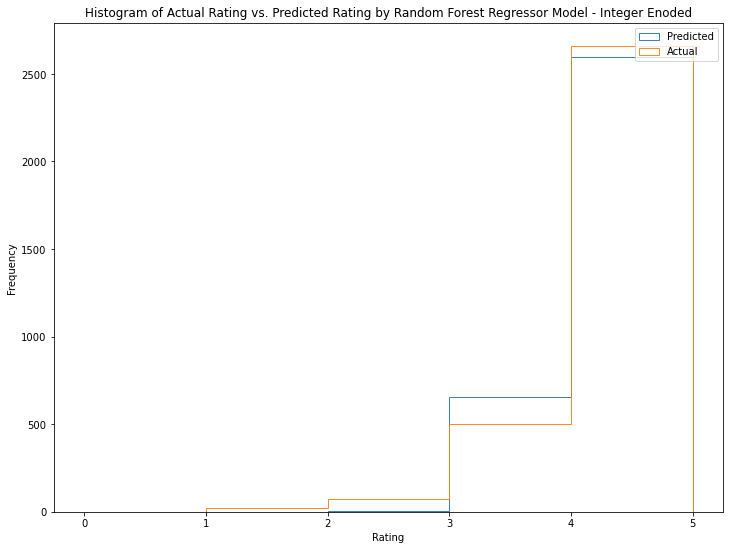

In [193]:
plt.hist(results3, bins=bins_list, alpha=0.9, label='Predicted', histtype='step')
plt.hist(y_test, bins=bins_list, alpha=0.9, label='Actual',histtype='step')
plt.legend(loc='upper right')
plt.title('Histogram of Actual Rating vs. Predicted Rating by Random Forest Regressor Model - Integer Enoded')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

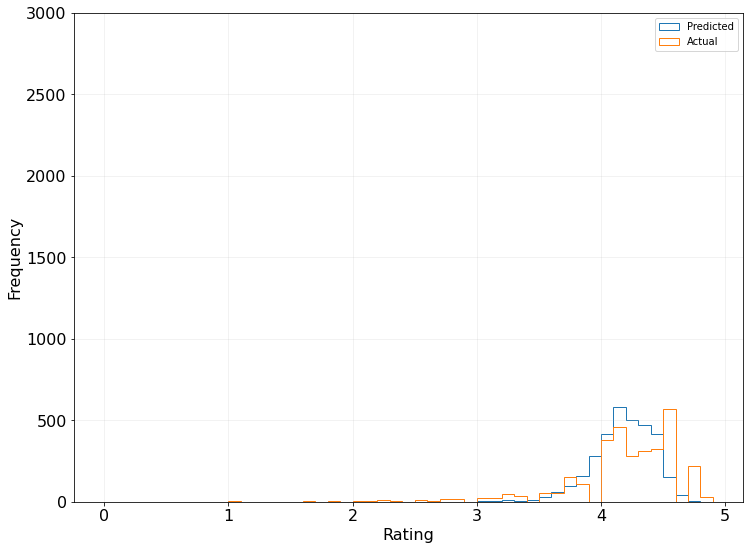

In [194]:
plt.hist(results3, bins=bins_list2, label='Predicted', histtype='step')
plt.hist(y_test, bins=bins_list2, label='Actual',histtype='step')
plt.legend(loc='upper right')
#plt.title('Histogram of Actual vs. Predicted Rating by RFR Model- Integer Encoded', size=20)
plt.xlabel('Rating',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(alpha=0.2)
plt.ylim([0,3000])
plt.savefig('ActualvsPredicted_IntRFR',bbox_inches = 'tight')
plt.show()

In [195]:
print(results3.mean(), results3.std())

4.180651940598521 0.2432133163100202


In [196]:
results3_np = np.array(results3)
y_test_np = np.array(y_test)
diff3 = y_test_np-results3_np
diff3

array([-0.30575272, -0.018     ,  0.036     , ..., -0.066     ,
        0.101     ,  0.166     ])

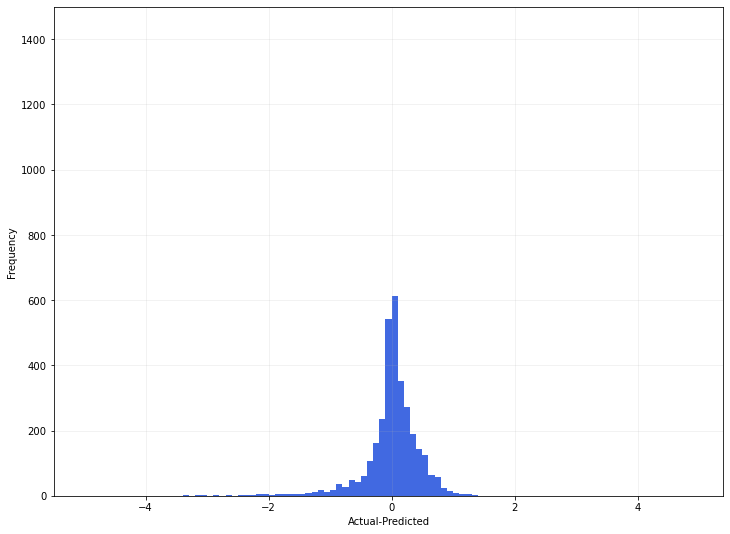

In [197]:
plt.hist(diff3,bins=bins_list3,range=[-5,5], color="#4169E1")
#plt.title('Difference between Actual Value and Random Forest Regressor (Integer Encoded) Predicted Values for Rating')
plt.xlabel('Actual-Predicted')
plt.ylabel('Frequency')
plt.grid(alpha=0.2)
plt.ylim([0,1500])
plt.savefig('diffInt_RFR',bbox_inches = 'tight')
plt.show()

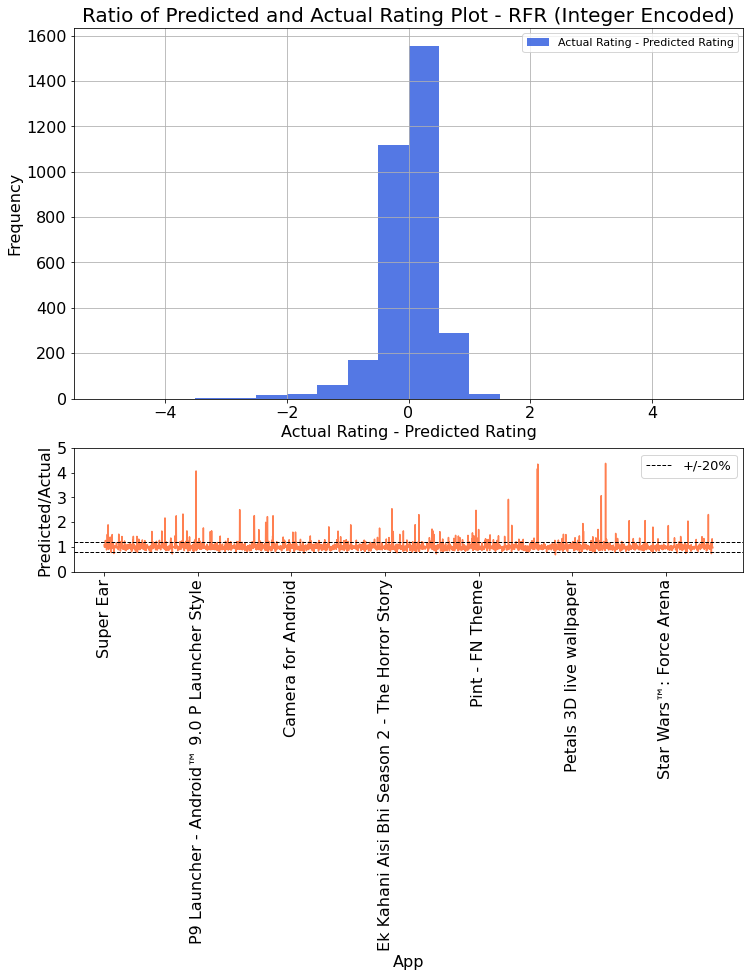

In [198]:
# Ratio Plot
fig = plt.figure(figsize=(12,10))    
gs=gridspec.GridSpec(2, 1, hspace=0.2, height_ratios=[3, 1])
        
ax = fig.add_subplot(gs[0])
diff3=  pd.DataFrame(diff3)
diff3.hist(ax=ax,label='Actual Rating - Predicted Rating',bins=20, range=[-5,5],color='#4169E1', alpha=0.9)

ax.set_ylabel('Frequency', fontsize=16)
ax.set_xlabel('Actual Rating - Predicted Rating',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Ratio of Predicted and Actual Rating Plot - RFR (Integer Encoded)',fontsize=20)
plt.legend(loc='best', fontsize=11)
        
ax = fig.add_subplot(gs[1])
(results3/y_test).plot(label="", color='#FF7F50')
ax.set_ylim(0,5)
plt.axhline(y=1.2, linestyle='--', color='k', label='+/-20%', linewidth=1)
plt.axhline(y=0.8, linestyle='--', color='k', linewidth=1)
ax.set_ylabel('Predicted/Actual', fontsize=16)
ax.set_xlabel('App',fontsize=16)
plt.xticks(fontsize=16 ,rotation=90)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=13)
plt.savefig('Ratio_IntRFR.png')


#### Comparing the models

In [199]:
resultsdf

,Series Name,R Squared Score,Mean Absolute Error,Mean Squared Error
0,Linear - Integer,0.00860552,0.318426,0.236498
1,SVM - Integer,0.022312,0.305911,0.233229
2,RFR - Integer,0.150801,0.284625,0.202578


## 2. Dummy Coded + Median Imputed
##### a) Feature selection

In [200]:
df_d.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated',
       'Month', 'Category_1', 'Category_2', 'Category_3', 'Category_4',
       'Category_5', 'Category_6', 'Category_7', 'Category_8', 'Category_9',
       'Category_10', 'Category_11', 'Category_12', 'Category_13',
       'Category_14', 'Category_15', 'Category_16', 'Category_17',
       'Category_18', 'Category_19', 'Category_20', 'Category_21',
       'Category_22', 'Category_23', 'Category_24', 'Category_25',
       'Category_26', 'Category_27', 'Category_28', 'Category_29',
       'Category_30', 'Category_31', 'Category_32', 'Genres_1', 'Genres_2',
       'Genres_3', 'Genres_4', 'Genres_5', 'Genres_6', 'Genres_7', 'Genres_8',
       'Genres_9', 'Genres_10', 'Genres_11', 'Genres_12', 'Genres_13',
       'Genres_14', 'Genres_15', 'Genres_16', 'Genres_17', 'Genres_18',
       'Genres_19', 'Genres_20', 'Genres_21', 'Genres_22', 'Genres_23',
       'Genres_24', 'Genres_25', 'Genres_26', 'Genres_27', 'Genres_28',
 

In [201]:
# Features selection
X_d = df_d.drop(labels = ['Rating', 'Last Updated'],axis = 1)

In [202]:
# Label selection
y_d = df_d.Rating

In [203]:
# For testing purpose
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)

## 1) Linear Regression

In [204]:
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_d_scaled = scaler.transform(X_train)
X_te_d_scaled = scaler.transform(X_test)

In [205]:
# Train the model on the train split
lm = LinearRegression()
lm.fit(X_tr_d_scaled, y_train)

LinearRegression()

In [206]:
# Train the model on the train split
lm = LinearRegression().fit(X_tr_d_scaled,y_train_d)

In [207]:
#make predictions using the model on both train and test splits
y_tr_pred = lm.predict(X_tr_d_scaled)
y_te_pred = lm.predict(X_te_d_scaled)

In [208]:
results_d = y_te_pred
results_d

array([4.19786934, 4.19632363, 4.18739754, ..., 4.18835828, 4.18607969,
       4.20186586])

In [209]:
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,results_d, name = 'Linear - Dummy'),ignore_index = True)

In [210]:
resultsdf

,Series Name,R Squared Score,Mean Absolute Error,Mean Squared Error
0,Linear - Integer,0.00860552,0.318426,0.236498
1,SVM - Integer,0.022312,0.305911,0.233229
2,RFR - Integer,0.150801,0.284625,0.202578
3,Linear - Dummy,-0.00264611,0.311902,0.231993


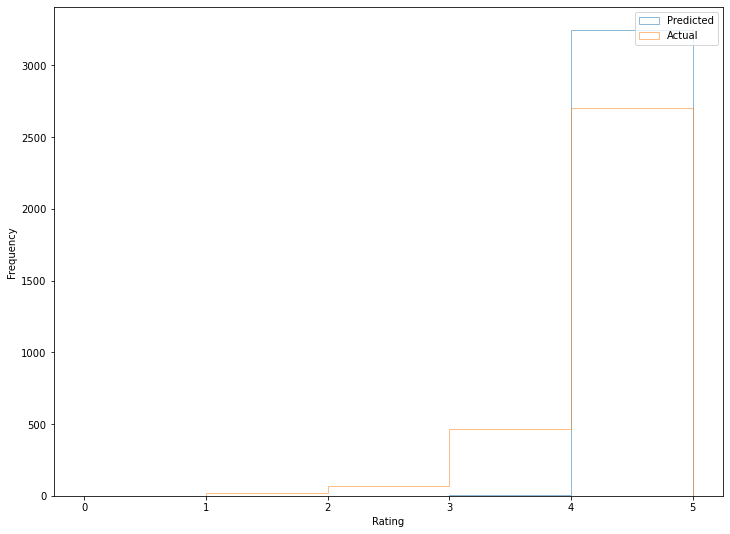

In [211]:
plt.hist(results_d, bins_list, alpha=0.5, label='Predicted',histtype='step')
plt.hist(y_test_d, bins_list, alpha=0.5, label='Actual',histtype='step')
plt.legend(loc='upper right')
#plt.title('Histogram of Actual Rating vs. Predicted Rating by Linear Regression Model- Dummy Coded')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

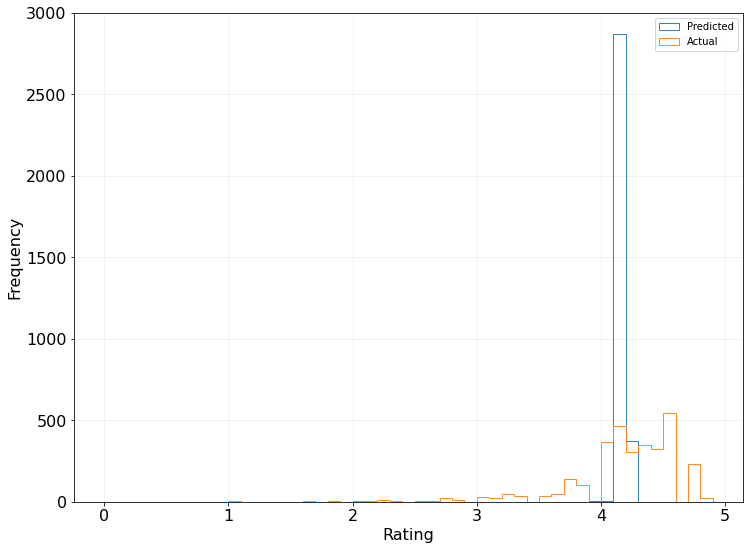

In [212]:
plt.hist(results_d, bins=bins_list2, alpha=0.9, label='Predicted', histtype='step')
plt.hist(y_test_d, bins=bins_list2, alpha=0.9, label='Actual',histtype='step')
plt.legend(loc='upper right')
#plt.title('Histogram of Actual vs. Predicted Rating by LR Model- Dummy', size=20)
plt.xlabel('Rating',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(alpha=0.2)
plt.ylim([0,3000])
plt.savefig('ActualvsPredicted_DumLR',bbox_inches = 'tight')
plt.show()

In [213]:
results_d_np = np.array(results_d)
y_test_d_np = np.array(y_test_d)
diffd = results_d_np-y_test_d_np
diffd

array([ 0.09786934, -0.00367637,  0.08739754, ..., -0.11164172,
       -0.00567773, -0.29813414])

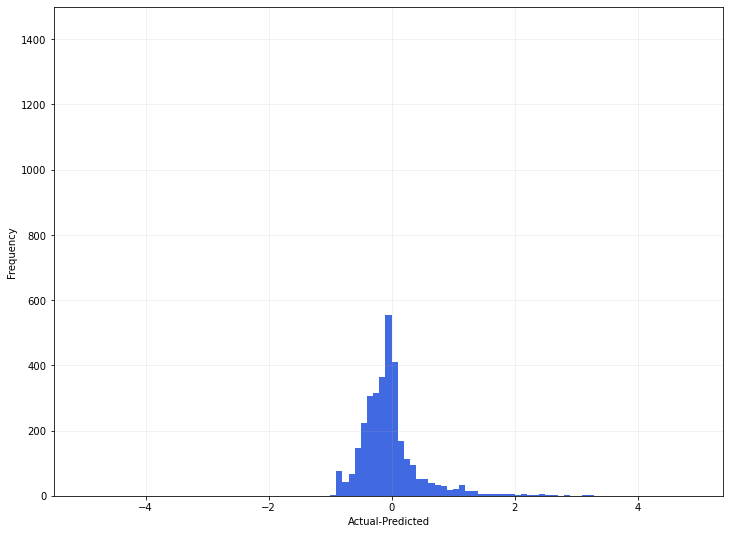

In [214]:
plt.hist(diffd,bins=bins_list3,range=[-5,5],color="#4169E1")
#plt.title('Difference between Actual Value and LR Model Predicted Values for Rating - Dummy Coded')
plt.xlabel('Actual-Predicted')
plt.ylabel('Frequency')
plt.grid(alpha=0.2)
plt.ylim([0,1500])
plt.savefig('diffdum_LR',bbox_inches = 'tight')
plt.show()

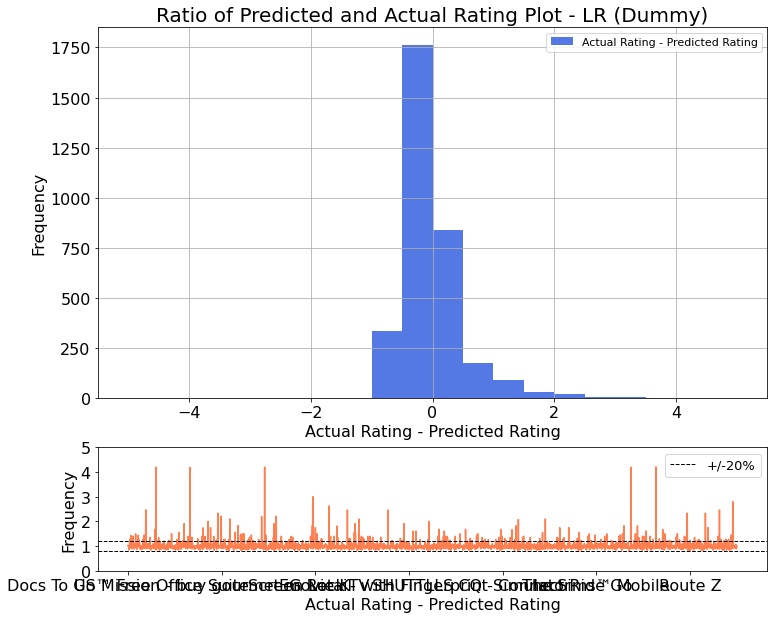

In [215]:
# Ratio Plot
fig = plt.figure(figsize=(12,10))    
gs=gridspec.GridSpec(2, 1, hspace=0.2, height_ratios=[3, 1])
        
ax = fig.add_subplot(gs[0])
diffd=pd.DataFrame(diffd)
diffd.hist(ax=ax,label='Actual Rating - Predicted Rating',bins=20, range=[-5,5],color='#4169E1', alpha=0.9)

ax.set_ylabel('Frequency', fontsize=16)
ax.set_xlabel('Actual Rating - Predicted Rating',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Ratio of Predicted and Actual Rating Plot - LR (Dummy)',fontsize=20)
plt.legend(loc='best', fontsize=11)
        
ax = fig.add_subplot(gs[1])
(results_d/y_test_d).plot(label="", color='#FF7F50')
ax.set_ylim(0,5)
plt.axhline(y=1.2, linestyle='--', color='k', label='+/-20%', linewidth=1)
plt.axhline(y=0.8, linestyle='--', color='k', linewidth=1)
ax.set_ylabel('Frequency', fontsize=16)
ax.set_xlabel('Actual Rating - Predicted Rating',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=13)
plt.savefig('Ratio_DumLR.png')

In [216]:
print(results.mean(), results.std())

4.191026795955791 0.056283511203969266


### 2) Elipson-Support Vector Regression (SVR) Model

In [217]:
svr = svm.SVR()
svr.fit(X_train_d,y_train_d)

results2_d = svr.predict(X_test_d)

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,results2_d, name = 'SVM - Dummy'),ignore_index = True)

In [218]:
resultsdf

,Series Name,R Squared Score,Mean Absolute Error,Mean Squared Error
0,Linear - Integer,0.00860552,0.318426,0.236498
1,SVM - Integer,0.022312,0.305911,0.233229
2,RFR - Integer,0.150801,0.284625,0.202578
3,Linear - Dummy,-0.00264611,0.311902,0.231993
4,SVM - Dummy,0.0215285,0.296187,0.226399


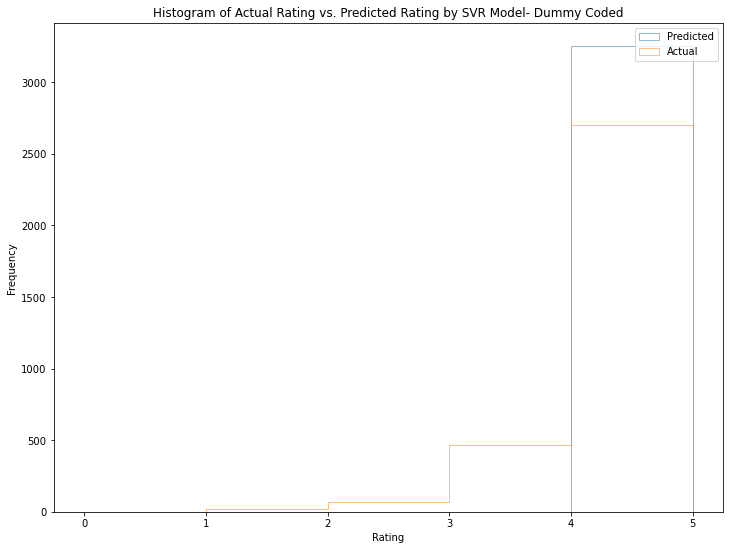

In [219]:
plt.hist(results2_d, bins_list, alpha=0.5, label='Predicted', histtype='step')
plt.hist(y_test_d, bins_list, alpha=0.5, label='Actual', histtype='step')
plt.legend(loc='upper right')
plt.title('Histogram of Actual Rating vs. Predicted Rating by SVR Model- Dummy Coded')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

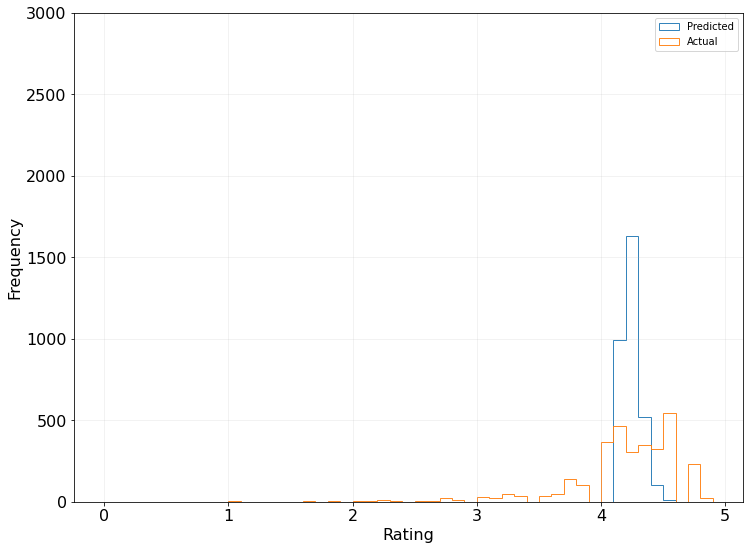

In [220]:
plt.hist(results2_d, bins=bins_list2, alpha=0.9, label='Predicted', histtype='step')
plt.hist(y_test_d, bins=bins_list2, alpha=0.9, label='Actual',histtype='step')
plt.legend(loc='upper right')
#plt.title('Histogram of Actual vs. Predicted Rating by SVR Model- Dummy', size=20)
plt.xlabel('Rating',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(alpha=0.2)
plt.ylim([0,3000])
plt.savefig('ActualvsPredicted_DumSVR',bbox_inches = 'tight')
plt.show()

In [221]:
results2_d_np = np.array(results2_d)
y_test_d_np = np.array(y_test_d)
diff2d = results2_d_np-y_test_d_np
diff2d

array([ 0.26145086,  0.16831995,  0.11325042, ..., -0.08673014,
        0.00816423, -0.28707193])

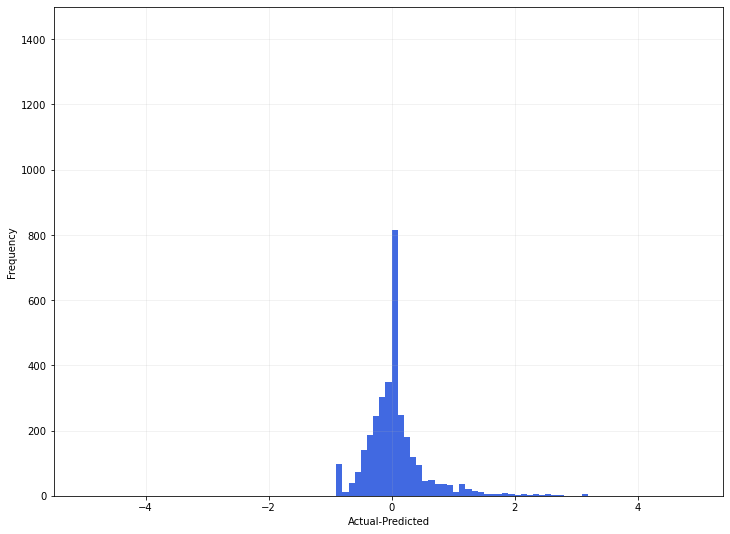

In [222]:
plt.hist(diff2d,bins=bins_list3,range=[-5,5],color="#4169E1")
#plt.title('Difference between Actual Value and SVR Model Predicted Values for Rating - Dummy Coded')
plt.xlabel('Actual-Predicted')
plt.ylabel('Frequency')
plt.grid(alpha=0.2)
plt.ylim([0,1500])
plt.savefig('diffdum_SVR',bbox_inches = 'tight')
plt.show()

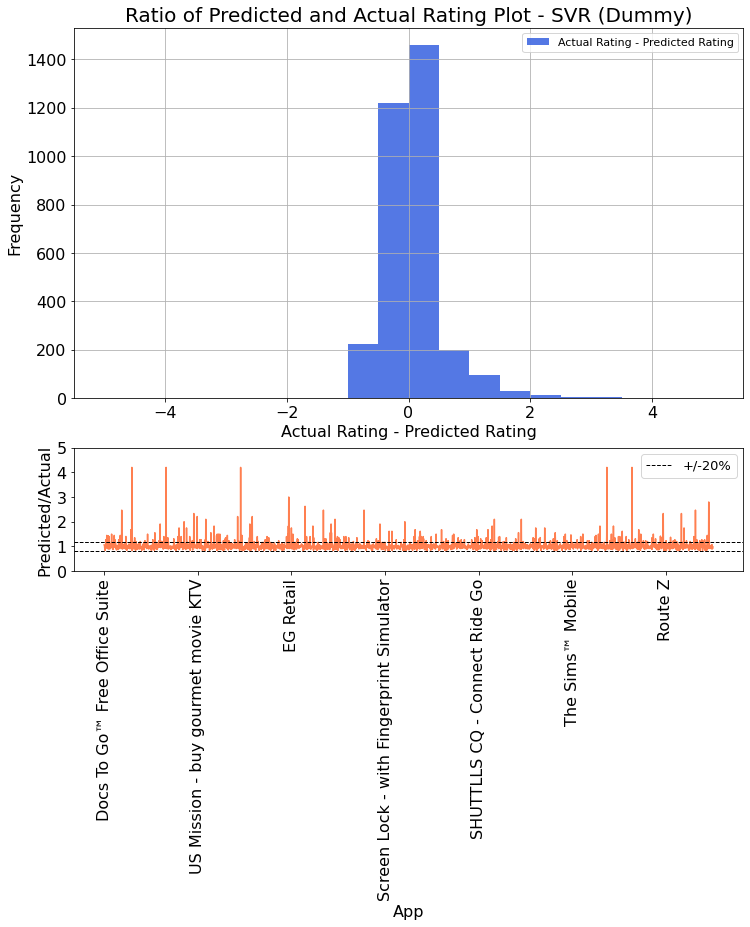

In [223]:
# Ratio Plot
fig = plt.figure(figsize=(12,10))    
gs=gridspec.GridSpec(2, 1, hspace=0.2, height_ratios=[3, 1])
        
ax = fig.add_subplot(gs[0])
diff2d=pd.DataFrame(diff2d)
diff2d.hist(ax=ax,label='Actual Rating - Predicted Rating',bins=20, range=[-5,5],color='#4169E1', alpha=0.9)

ax.set_ylabel('Frequency', fontsize=16)
ax.set_xlabel('Actual Rating - Predicted Rating',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax.set_title('Ratio of Predicted and Actual Rating Plot - SVR (Dummy)',fontsize=20)
plt.legend(loc='best', fontsize=11)
    
ax = fig.add_subplot(gs[1])
(results2_d/y_test_d).plot(label="", color='#FF7F50')
ax.set_ylim(0,5)
plt.axhline(y=1.2, linestyle='--', color='k', label='+/-20%', linewidth=1)
plt.axhline(y=0.8, linestyle='--', color='k', linewidth=1)
ax.set_ylabel('Predicted/Actual', fontsize=16)
ax.set_xlabel('App',fontsize=16)
plt.xticks(fontsize=16 ,rotation=90)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=13)
plt.savefig('Ratio_DumSVR.png',bbox_inches = 'tight')

In [224]:
print(results2.mean(), results2.std())

4.2614262762486685 0.10645295070511093


## 3) Random Forest Regressor Model

In [225]:
rf = RandomForestRegressor()
rf.fit(X_train_d,y_train_d)
results3_d = rf.predict(X_test_d)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,results3_d, name = 'RFR - Dummy'),ignore_index = True)

In [226]:
print(rf.score(X_test_d,y_test_d))

0.12517089961651084


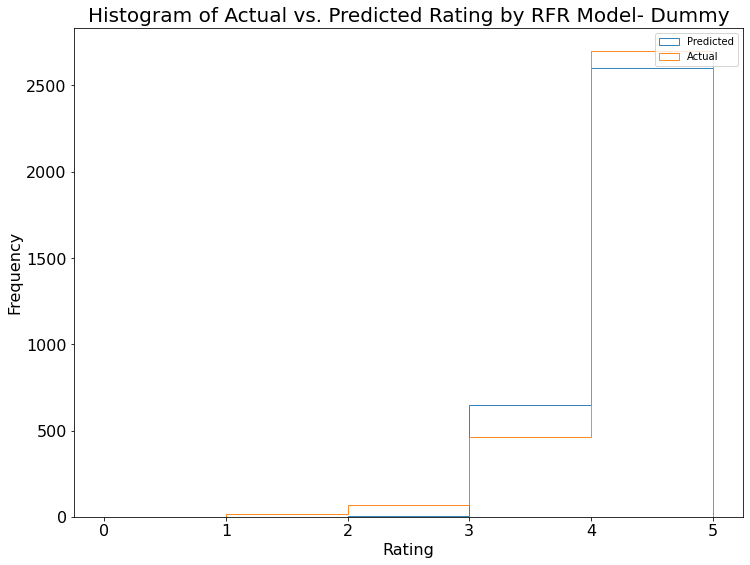

In [227]:
plt.hist(results3_d, bins_list, alpha=0.9, label='Predicted',histtype='step')
plt.hist(y_test_d, bins_list, alpha=0.9, label='Actual',histtype='step')
plt.legend(loc='upper right')
plt.title('Histogram of Actual vs. Predicted Rating by RFR Model- Dummy', size=20)
plt.xlabel('Rating',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

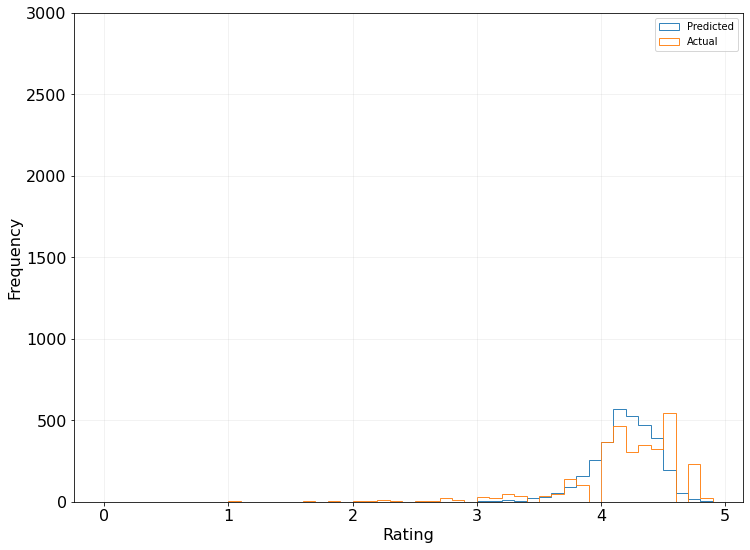

In [228]:
plt.hist(results3_d, bins=bins_list2, alpha=0.9, label='Predicted', histtype='step')
plt.hist(y_test_d, bins=bins_list2, alpha=0.9, label='Actual',histtype='step')
plt.legend(loc='upper right')
#plt.title('Histogram of Actual vs. Predicted Rating by RFR Model- Dummy', size=20)
plt.xlabel('Rating',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(alpha=0.2)
plt.ylim([0,3000])
plt.savefig('ActualvsPredicted_DumRFR',bbox_inches = 'tight')
plt.show()

In [229]:
results3_d_np = np.array(results3_d)
y_test_d_np = np.array(y_test_d)
diff3d = results3_d_np-y_test_d_np

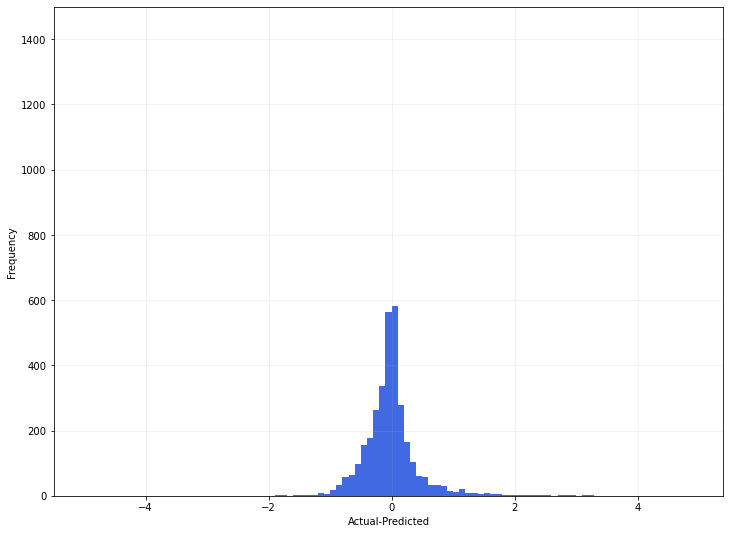

In [230]:
plt.hist(diff3d, bins=bins_list3,range=[-5,5], color="#4169E1")
#plt.title('Difference between Actual Value and RFR Model Predicted Values for Rating - Dummy Coded')
plt.xlabel('Actual-Predicted')
plt.ylabel('Frequency')
plt.grid(alpha=0.2)
plt.ylim([0,1500])
plt.savefig('diffdum_RFR',bbox_inches = 'tight')
plt.show()

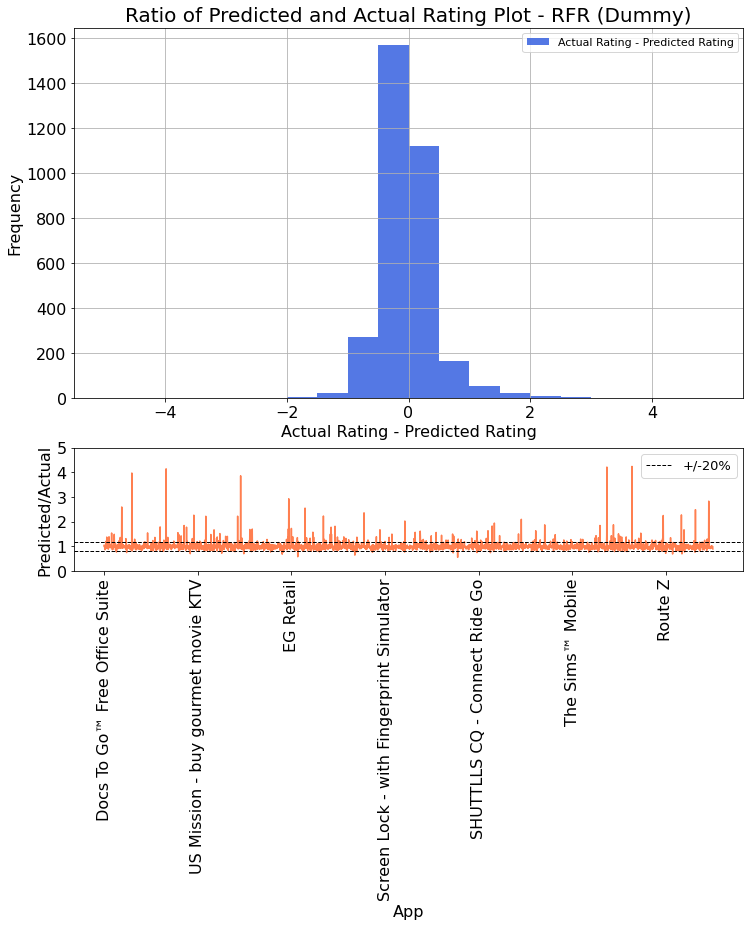

In [231]:
# Ratio Plot
fig = plt.figure(figsize=(12,10))    
gs=gridspec.GridSpec(2, 1, hspace=0.2, height_ratios=[3, 1])
        
ax = fig.add_subplot(gs[0])
diff3d=pd.DataFrame(diff3d)
diff3d.hist(ax=ax,label='Actual Rating - Predicted Rating',bins=20, range=[-5,5],color='#4169E1', alpha=0.9)

ax.set_ylabel('Frequency', fontsize=16)
ax.set_xlabel('Actual Rating - Predicted Rating',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Ratio of Predicted and Actual Rating Plot - RFR (Dummy)',fontsize=20)
plt.legend(loc='best', fontsize=11)
        
ax = fig.add_subplot(gs[1])
(results3_d/y_test_d).plot(label="", color='#FF7F50')
ax.set_ylim(0,5)
plt.axhline(y=1.2, linestyle='--', color='k', label='+/-20%', linewidth=1)
plt.axhline(y=0.8, linestyle='--', color='k', linewidth=1)
ax.set_ylabel('Predicted/Actual', fontsize=16)
ax.set_xlabel('App',fontsize=16)
plt.xticks(fontsize=16 ,rotation=90)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=13)
plt.savefig('Ratio_DumRF.png')

In [232]:
print(results3.mean(), results3.std())

4.180651940598521 0.2432133163100202


#### Just to further clarify, histograms for model predicted rating for each actual rating is plotted.

In [233]:
results3_d_df = pd.DataFrame(results3_d)
y_test_d_df = pd.DataFrame(y_test_d)

#### For actual rating = [1,2)

In [234]:
# For Actual Rating = [1,2)
actualindex = []
for i in range(0, len(y_test_d)):
    if y_test_d[i]<2:
        actualindex.append(i)

predicted = []
for i in results:
    predicted = results3_d_df.iloc[actualindex]
    
predicted = predicted.to_numpy()

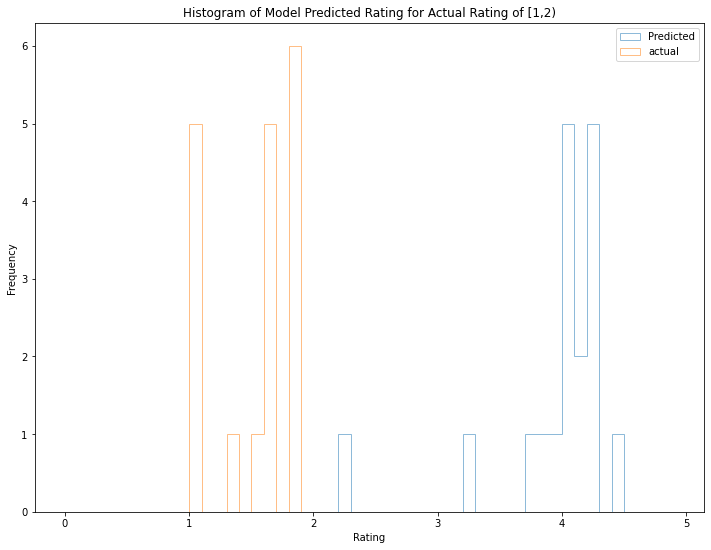

In [235]:
plt.hist(predicted, bins=bins_list2, alpha=0.5, histtype='step', label='Predicted')
plt.hist(y_test_d[actualindex], bins=bins_list2, alpha=0.5, histtype='step', label='actual')
plt.legend(loc='upper right')
plt.title('Histogram of Model Predicted Rating for Actual Rating of [1,2)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#### For actual rating = [2,3)

In [236]:
actualindex2 = []
for i in range(0, len(y_test_d)):
    if 2<=y_test_d[i]<3:
        actualindex2.append(i)
        
predicted2 = []
for i in results:
    predicted2 = results3_d_df.iloc[actualindex2]
    
predicted2 = predicted2.to_numpy()

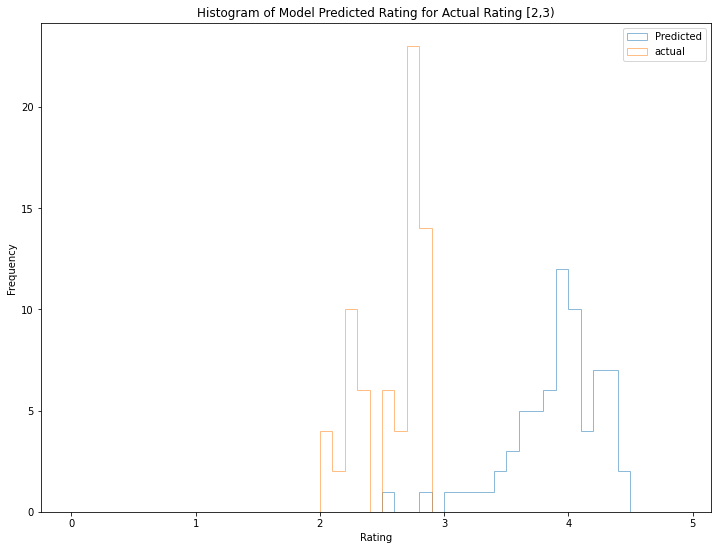

In [237]:
plt.hist(predicted2, bins=bins_list2, alpha=0.5, histtype='step', label='Predicted')
plt.hist(y_test_d[actualindex2], bins=bins_list2, alpha=0.5, histtype='step', label='actual')
plt.legend(loc='upper right')
plt.title('Histogram of Model Predicted Rating for Actual Rating [2,3)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#### For actual rating = [3,4)

In [238]:
actualindex3 = []
for i in range(0, len(y_test_d)):
    if 3<=y_test_d[i]<4:
        actualindex3.append(i)
        
predicted3 = []
for i in results:
    predicted3 = results3_d_df.iloc[actualindex3]
    
predicted3 = predicted3.to_numpy()

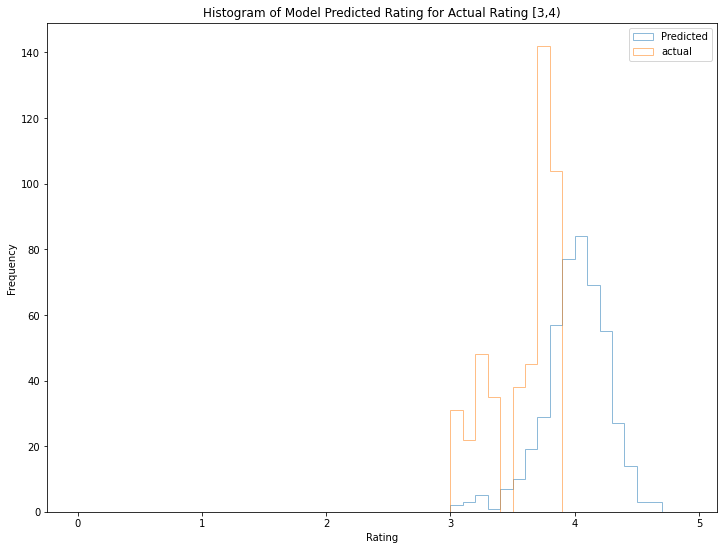

In [239]:
plt.hist(predicted3, bins=bins_list2, alpha=0.5, histtype='step', label='Predicted')
plt.hist(y_test_d[actualindex3], bins=bins_list2, alpha=0.5, histtype='step', label='actual')
plt.legend(loc='upper right')
plt.title('Histogram of Model Predicted Rating for Actual Rating [3,4)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#### For actual rating = [4,5]

In [240]:
actualindex4 = []
for i in range(0, len(y_test_d)):
    if 4<=y_test_d[i]<=5:
        actualindex4.append(i)
        
predicted4 = []
for i in results:
    predicted4 = results3_d_df.iloc[actualindex4]
    
predicted4 = predicted4.to_numpy()

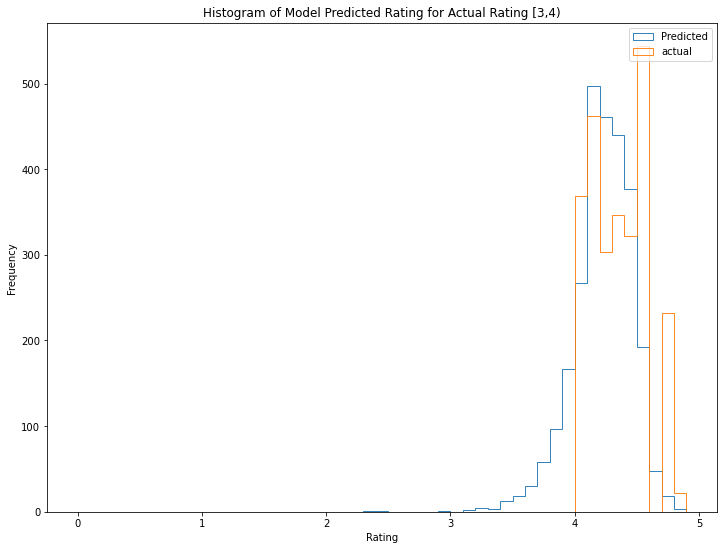

In [241]:
plt.hist(predicted4, bins=bins_list2, alpha=0.9, histtype='step', label='Predicted')
plt.hist(y_test_d[actualindex4], bins=bins_list2, alpha=0.9, histtype='step', label='actual')
plt.legend(loc='upper right')
plt.title('Histogram of Model Predicted Rating for Actual Rating [3,4)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

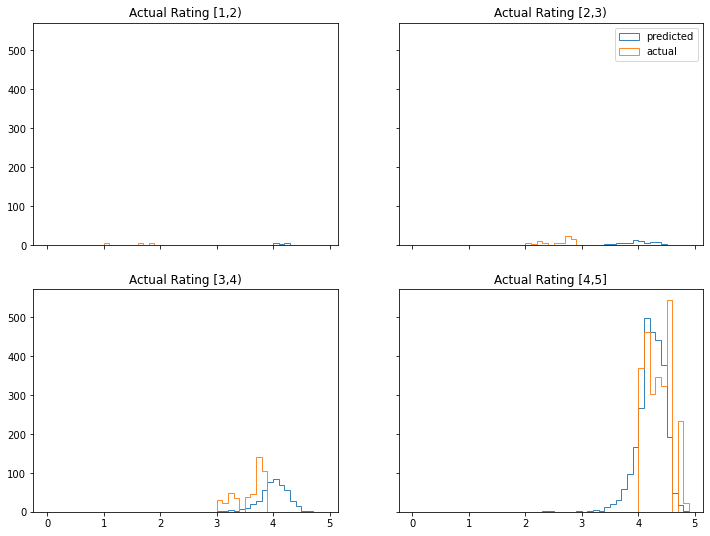

In [242]:
fig,axs = plt.subplots(2,2,sharex=True, sharey=True)
#fig.suptitle('Histogram of RFR Model Predicted Rating for Each Acutal Rating')

axs[0,0].hist(predicted,bins=bins_list2, range=[0,5], alpha=0.9, histtype='step', label='predicted')
axs[0,0].hist(y_test_d[actualindex], bins=bins_list2, alpha=0.9, histtype='step', label='actual')
axs[0,0].set_title('Actual Rating [1,2)');

axs[0,1].hist(predicted2,bins=bins_list2, range=[0,5], alpha=0.9, histtype='step', label='predicted')
axs[0,1].hist(y_test_d[actualindex2], bins=bins_list2, alpha=0.9, histtype='step', label='actual')
axs[0,1].set_title('Actual Rating [2,3)');
axs[0,1].legend(loc='upper right');

axs[1,0].hist(predicted3,bins=bins_list2, range=[0,5], alpha=0.9, histtype='step', label='predicted')
axs[1,0].hist(y_test_d[actualindex3], bins=bins_list2, alpha=0.9, histtype='step', label='actual')
axs[1,0].set_title('Actual Rating [3,4)');

axs[1,1].hist(predicted4,bins=bins_list2, range=[0,5], alpha=0.9, histtype='step', label='predicted')
axs[1,1].hist(y_test_d[actualindex4],bins=bins_list2, alpha=0.9, histtype='step', label='actual')
axs[1,1].set_title('Actual Rating [4,5]');

plt.savefig('ActualvsPredicted_DumRFR_EachRange.png',bbox_inches = 'tight')

### Random Forest Regression - Excluding Genres
Random forest regressor are biased in favor of attributes with more levels, and theefore, data with categorical variables with different number of levels result in bias. 

In [243]:
df_d.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated',
       'Month', 'Category_1', 'Category_2', 'Category_3', 'Category_4',
       'Category_5', 'Category_6', 'Category_7', 'Category_8', 'Category_9',
       'Category_10', 'Category_11', 'Category_12', 'Category_13',
       'Category_14', 'Category_15', 'Category_16', 'Category_17',
       'Category_18', 'Category_19', 'Category_20', 'Category_21',
       'Category_22', 'Category_23', 'Category_24', 'Category_25',
       'Category_26', 'Category_27', 'Category_28', 'Category_29',
       'Category_30', 'Category_31', 'Category_32', 'Genres_1', 'Genres_2',
       'Genres_3', 'Genres_4', 'Genres_5', 'Genres_6', 'Genres_7', 'Genres_8',
       'Genres_9', 'Genres_10', 'Genres_11', 'Genres_12', 'Genres_13',
       'Genres_14', 'Genres_15', 'Genres_16', 'Genres_17', 'Genres_18',
       'Genres_19', 'Genres_20', 'Genres_21', 'Genres_22', 'Genres_23',
       'Genres_24', 'Genres_25', 'Genres_26', 'Genres_27', 'Genres_28',
 

In [244]:
# Features selection
X_d = df_d[['Reviews', 'Size', 'Installs', 'Price', 'Month', 'Content Rating_2', 'Content Rating_3', 'Content Rating_4','Content Rating_5', 'Type_1', 'Category_5', 'Category_6', 'Category_7', 'Category_8', 'Category_9','Category_10', 'Category_11', 'Category_12', 'Category_13','Category_14', 'Category_15', 'Category_16', 'Category_17','Category_18', 'Category_19', 'Category_20', 'Category_21','Category_22', 'Category_23', 'Category_24', 'Category_25','Category_26', 'Category_27', 'Category_28', 'Category_29','Category_30', 'Category_31', 'Category_32']]

In [245]:
# Label selection
y_d = df_d.Rating

In [246]:
# For testing purpose
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)

In [247]:
model3 = RandomForestRegressor()
model3.fit(X_train_d,y_train_d)
results4_d = model3.predict(X_test_d)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,results4_d, name = 'RFR - Dummy w/o Genres'),ignore_index = True)

In [248]:
print(model3.score(X_test_d,y_test_d))

0.12679627957282613


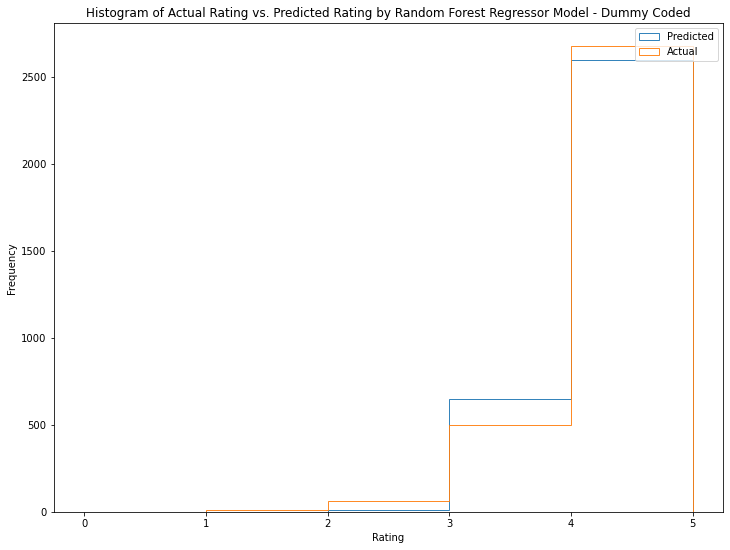

In [249]:
plt.hist(results4_d, bins_list, alpha=0.9, label='Predicted',histtype='step')
plt.hist(y_test_d, bins_list, alpha=0.9, label='Actual',histtype='step')
plt.legend(loc='upper right')
plt.title('Histogram of Actual Rating vs. Predicted Rating by Random Forest Regressor Model - Dummy Coded')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

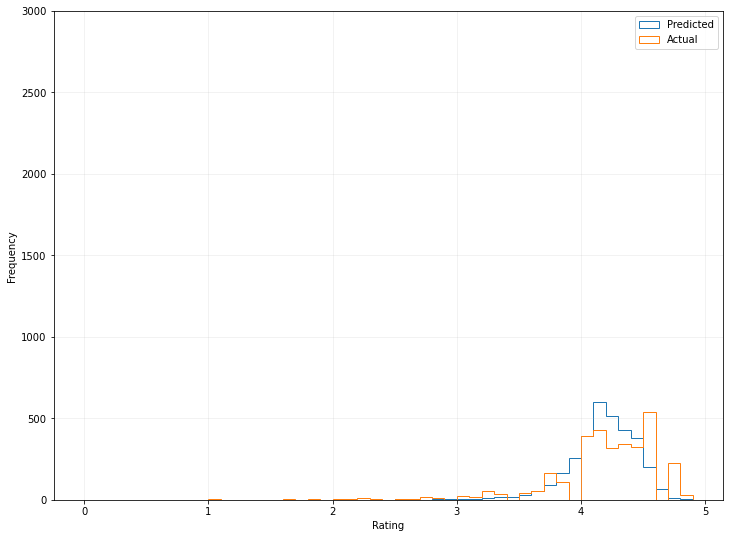

In [250]:
plt.hist(results4_d, bins=bins_list2, label='Predicted', histtype='step')
plt.hist(y_test_d, bins=bins_list2,label='Actual',histtype='step')
plt.legend(loc='upper right')
#plt.title('Histogram of Actual Rating vs. Predicted Rating by RFR Model- Dummy Coded')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(alpha=0.2)
plt.ylim([0,3000])
plt.savefig('ActualvsPredicted_DumRFRwoGENRE',bbox_inches = 'tight')
plt.show()

In [251]:
results4_d_np = np.array(results4_d)
y_test_d_np = np.array(y_test_d)
diff4d = results4_d_np-y_test_d_np

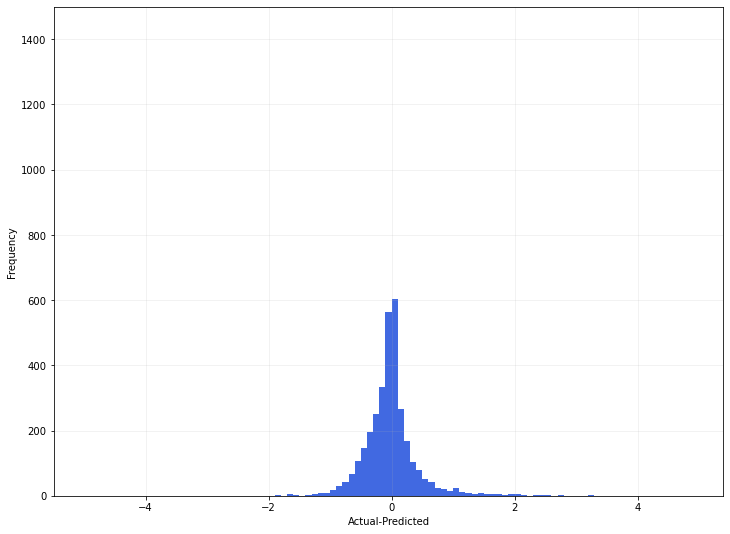

In [252]:
plt.hist(diff4d,bins=bins_list3,range=[-5,5],color="#4169E1")
#plt.title('Difference between Actual Value and RFR Model Predicted Values for Rating - Dummy Coded')
plt.xlabel('Actual-Predicted')
plt.ylabel('Frequency')
plt.grid(alpha=0.2)
plt.ylim([0,1500])
plt.savefig('Diffdum_RFRwoGENRE',bbox_inches = 'tight')
plt.show()

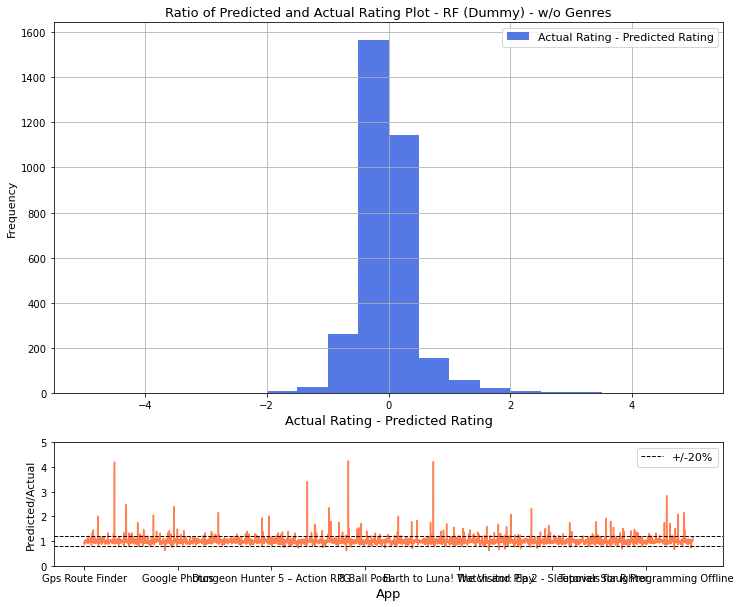

In [253]:
# Ratio Plot
fig = plt.figure(figsize=(12,10))    
gs=gridspec.GridSpec(2, 1, hspace=0.2, height_ratios=[3, 1])
        
ax = fig.add_subplot(gs[0])
diff4d=pd.DataFrame(diff4d)
diff4d.hist(ax=ax,label='Actual Rating - Predicted Rating',bins=20, range=[-5,5],color='#4169E1', alpha=0.9)

ax.set_ylabel('Frequency', fontsize=11)
ax.set_xlabel('Actual Rating - Predicted Rating',fontsize=13)
ax.set_title('Ratio of Predicted and Actual Rating Plot - RF (Dummy) - w/o Genres',fontsize=13)
plt.legend(loc='best', fontsize=11)
        
ax = fig.add_subplot(gs[1])
(results4_d/y_test_d).plot(label="", color='#FF7F50')
ax.set_ylim(0,5)
plt.axhline(y=1.2, linestyle='--', color='k', label='+/-20%', linewidth=1)
plt.axhline(y=0.8, linestyle='--', color='k', linewidth=1)
ax.set_ylabel('Predicted/Actual', fontsize=11)
ax.set_xlabel('App',fontsize=13)
plt.legend(loc='best', fontsize=11)
plt.savefig('Ratio_DumRF.png')

### XGBoost 
Since the data is structured/tabular with many levels of categorical variables, XGBoost will be used to solve this regression predictive modeling. 

https://www.geeksforgeeks.org/xgboost-for-regression/

In [254]:
from sklearn import datasets
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE 

In [255]:
# Features selection
X = df_d.drop(labels = ['Rating', 'Last Updated'],axis = 1)

In [256]:
# Label selection
y = df_d.Rating

In [257]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [258]:
xgb_r = xgb.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 123) 

In [259]:
# Fitting the model 
xgb_r.fit(X_train, y_train) 

[15:24:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [260]:
# Predict the model 
pred = xgb_r.predict(X_test) 

In [261]:
rmse = np.sqrt(MSE(y_test, pred)) 
print("RMSE : % f" %(rmse)) 

RMSE :  0.451754


### XGBoost: Linear Base Learner

In [262]:
from sklearn.metrics import mean_squared_error as MSE 

In [263]:
# Splitting 
train_X, test_X, train_y, test_y = train_test_split(X, y,  
                      test_size = 0.3, random_state = 123) 

In [264]:
# Train and test set are converted to DMatrix objects, 
# as it is required by learning API. 
train_dmatrix = xgb.DMatrix(data = train_X, label = train_y) 
test_dmatrix = xgb.DMatrix(data = test_X, label = test_y) 

In [265]:
# Parameter dictionary specifying base learner 
param = {"booster":"gblinear", "objective":"reg:linear"} 
xgb_r = xgb.train(params = param, dtrain = train_dmatrix, num_boost_round = 10) 
pred = xgb_r.predict(test_dmatrix) 

[15:24:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [266]:
# RMSE Computation 
rmse = np.sqrt(MSE(test_y, pred)) 
print("RMSE : % f" %(rmse)) 

RMSE :  0.535842


In [267]:
#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(test_y,pred, name = 'XGBoost'),ignore_index = True)
resultsdf

,Series Name,R Squared Score,Mean Absolute Error,Mean Squared Error
0,Linear - Integer,0.00860552,0.318426,0.236498
1,SVM - Integer,0.022312,0.305911,0.233229
2,RFR - Integer,0.150801,0.284625,0.202578
3,Linear - Dummy,-0.00264611,0.311902,0.231993
4,SVM - Dummy,0.0215285,0.296187,0.226399
5,RFR - Dummy,-0.257209,0.387092,0.299909
6,RFR - Dummy w/o Genres,-0.306964,0.394934,0.311778
7,XGBoost,-0.203627,0.378074,0.287127


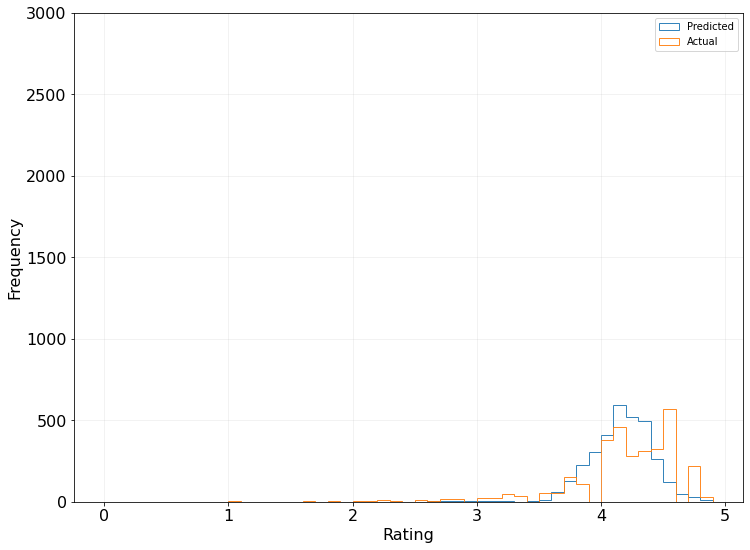

In [268]:
plt.hist(pred, bins=bins_list2, alpha=0.9, label='Predicted', histtype='step')
plt.hist(test_y, bins=bins_list2, alpha=0.9, label='Actual',histtype='step')
plt.legend(loc='upper right')
plt.xlabel('Rating',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(alpha=0.2)
plt.ylim([0,3000])
plt.savefig('ActualvsPredicted_DumXGBoost',bbox_inches = 'tight')
plt.show()

In [269]:
pred_np = np.array(pred)
test_y_np = np.array(test_y)
diff_xgb = pred_np-test_y_np
diff_xgb

array([-0.02253485,  0.1028841 ,  0.5301569 , ..., -0.09058247,
       -0.06248369, -0.45520878])

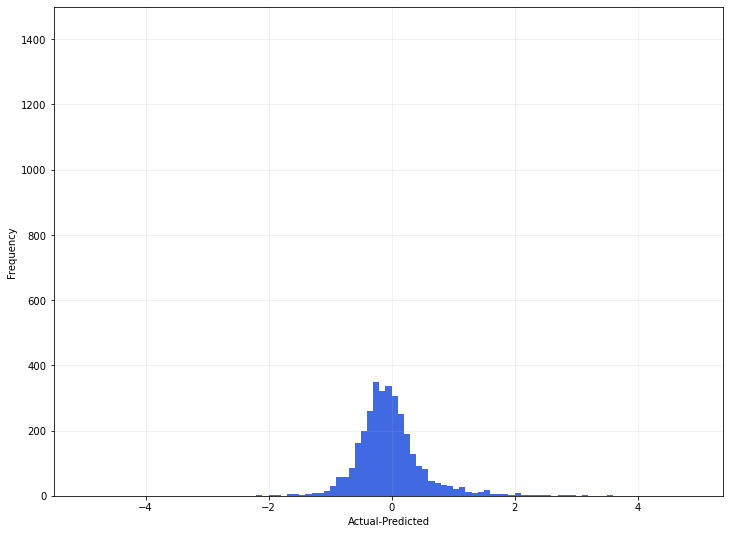

In [270]:
plt.hist(diff_xgb,bins=bins_list3,range=[-5,5], color="#4169E1")
#plt.title('Difference between Actual Value and SVR Model Predicted Values for Rating - Dummy Coded')
plt.xlabel('Actual-Predicted')
plt.ylabel('Frequency')
plt.grid(alpha=0.2)
plt.ylim([0,1500])
plt.savefig('diffdum_XGB',bbox_inches = 'tight')
plt.show()

### CatBoost

In [271]:
import catboost as ctb

In [272]:
# Features selection
X = data.drop(labels = ['Rating', 'Last Updated','Current Ver','Android Ver'],axis = 1)

# Label selection
y=data.Rating

In [273]:
X.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Month,av
App,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19.0,10000,Free,0.0,Everyone,Art & Design,1,4
How to draw Ladybug and Cat Noir,ART_AND_DESIGN,564,9.2,100000,Free,0.0,Everyone,Art & Design,7,4
UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,8145,24.0,500000,Free,0.0,Everyone,Art & Design,8,4
Floor Plan Creator,ART_AND_DESIGN,36639,NaN,5000000,Free,0.0,Everyone,Art & Design,7,2
PIP Camera - PIP Collage Maker,ART_AND_DESIGN,158,11.0,10000,Free,0.0,Everyone,Art & Design,11,4


In [274]:
# Splitting 
train_X, test_X, train_y, test_y = train_test_split(X, y,  
                      test_size = 0.3, random_state = 123) 

In [275]:
model_CBR = ctb.CatBoostRegressor()
model_CBR.fit(X_train, y_train)
print(model_CBR)

Learning rate set to 0.055984
0:	learn: 0.4797661	total: 58.9ms	remaining: 58.9s
1:	learn: 0.4778556	total: 62ms	remaining: 30.9s
2:	learn: 0.4761478	total: 65ms	remaining: 21.6s
3:	learn: 0.4747070	total: 68.3ms	remaining: 17s
4:	learn: 0.4733612	total: 71.5ms	remaining: 14.2s
5:	learn: 0.4719925	total: 74.8ms	remaining: 12.4s
6:	learn: 0.4706962	total: 77.6ms	remaining: 11s
7:	learn: 0.4698620	total: 79.6ms	remaining: 9.88s
8:	learn: 0.4687950	total: 82.9ms	remaining: 9.12s
9:	learn: 0.4677009	total: 86.8ms	remaining: 8.59s
10:	learn: 0.4667846	total: 89.9ms	remaining: 8.08s
11:	learn: 0.4659843	total: 93.1ms	remaining: 7.67s
12:	learn: 0.4652332	total: 96.4ms	remaining: 7.32s
13:	learn: 0.4643897	total: 99.6ms	remaining: 7.01s
14:	learn: 0.4635976	total: 103ms	remaining: 6.74s
15:	learn: 0.4628667	total: 106ms	remaining: 6.51s
16:	learn: 0.4623155	total: 109ms	remaining: 6.3s
17:	learn: 0.4617477	total: 112ms	remaining: 6.12s
18:	learn: 0.4613329	total: 116ms	remaining: 5.96s
19:	le

164:	learn: 0.4306373	total: 686ms	remaining: 3.47s
165:	learn: 0.4305493	total: 690ms	remaining: 3.47s
166:	learn: 0.4303781	total: 694ms	remaining: 3.46s
167:	learn: 0.4302571	total: 698ms	remaining: 3.45s
168:	learn: 0.4301090	total: 701ms	remaining: 3.45s
169:	learn: 0.4299699	total: 705ms	remaining: 3.44s
170:	learn: 0.4298341	total: 709ms	remaining: 3.44s
171:	learn: 0.4296498	total: 713ms	remaining: 3.43s
172:	learn: 0.4294337	total: 717ms	remaining: 3.43s
173:	learn: 0.4292503	total: 721ms	remaining: 3.42s
174:	learn: 0.4291038	total: 725ms	remaining: 3.42s
175:	learn: 0.4289531	total: 729ms	remaining: 3.41s
176:	learn: 0.4287797	total: 733ms	remaining: 3.41s
177:	learn: 0.4286871	total: 737ms	remaining: 3.4s
178:	learn: 0.4285168	total: 742ms	remaining: 3.4s
179:	learn: 0.4283955	total: 746ms	remaining: 3.4s
180:	learn: 0.4283159	total: 750ms	remaining: 3.39s
181:	learn: 0.4281691	total: 754ms	remaining: 3.39s
182:	learn: 0.4280387	total: 758ms	remaining: 3.38s
183:	learn: 0.4

360:	learn: 0.4042145	total: 1.37s	remaining: 2.43s
361:	learn: 0.4041135	total: 1.37s	remaining: 2.42s
362:	learn: 0.4040473	total: 1.38s	remaining: 2.42s
363:	learn: 0.4039037	total: 1.38s	remaining: 2.41s
364:	learn: 0.4038033	total: 1.38s	remaining: 2.41s
365:	learn: 0.4037099	total: 1.39s	remaining: 2.4s
366:	learn: 0.4036290	total: 1.39s	remaining: 2.4s
367:	learn: 0.4035447	total: 1.39s	remaining: 2.4s
368:	learn: 0.4034032	total: 1.4s	remaining: 2.39s
369:	learn: 0.4033391	total: 1.4s	remaining: 2.38s
370:	learn: 0.4032014	total: 1.4s	remaining: 2.38s
371:	learn: 0.4030466	total: 1.41s	remaining: 2.38s
372:	learn: 0.4029543	total: 1.41s	remaining: 2.37s
373:	learn: 0.4028596	total: 1.41s	remaining: 2.37s
374:	learn: 0.4027413	total: 1.42s	remaining: 2.36s
375:	learn: 0.4026107	total: 1.42s	remaining: 2.36s
376:	learn: 0.4025199	total: 1.42s	remaining: 2.35s
377:	learn: 0.4024616	total: 1.43s	remaining: 2.35s
378:	learn: 0.4023462	total: 1.43s	remaining: 2.34s
379:	learn: 0.4022

551:	learn: 0.3860079	total: 2.06s	remaining: 1.67s
552:	learn: 0.3858943	total: 2.06s	remaining: 1.67s
553:	learn: 0.3856986	total: 2.07s	remaining: 1.66s
554:	learn: 0.3856126	total: 2.07s	remaining: 1.66s
555:	learn: 0.3854919	total: 2.07s	remaining: 1.66s
556:	learn: 0.3854274	total: 2.08s	remaining: 1.65s
557:	learn: 0.3853347	total: 2.08s	remaining: 1.65s
558:	learn: 0.3852453	total: 2.09s	remaining: 1.65s
559:	learn: 0.3851616	total: 2.09s	remaining: 1.64s
560:	learn: 0.3851179	total: 2.09s	remaining: 1.64s
561:	learn: 0.3850285	total: 2.1s	remaining: 1.64s
562:	learn: 0.3849512	total: 2.1s	remaining: 1.63s
563:	learn: 0.3848825	total: 2.1s	remaining: 1.63s
564:	learn: 0.3848101	total: 2.11s	remaining: 1.62s
565:	learn: 0.3847314	total: 2.11s	remaining: 1.62s
566:	learn: 0.3846816	total: 2.12s	remaining: 1.62s
567:	learn: 0.3845560	total: 2.12s	remaining: 1.61s
568:	learn: 0.3844974	total: 2.12s	remaining: 1.61s
569:	learn: 0.3844239	total: 2.13s	remaining: 1.6s
570:	learn: 0.38

753:	learn: 0.3705259	total: 2.75s	remaining: 896ms
754:	learn: 0.3704470	total: 2.75s	remaining: 893ms
755:	learn: 0.3704396	total: 2.75s	remaining: 889ms
756:	learn: 0.3703573	total: 2.76s	remaining: 885ms
757:	learn: 0.3703345	total: 2.76s	remaining: 881ms
758:	learn: 0.3702521	total: 2.76s	remaining: 878ms
759:	learn: 0.3701676	total: 2.77s	remaining: 874ms
760:	learn: 0.3700856	total: 2.77s	remaining: 870ms
761:	learn: 0.3700163	total: 2.77s	remaining: 866ms
762:	learn: 0.3699434	total: 2.78s	remaining: 862ms
763:	learn: 0.3698660	total: 2.78s	remaining: 859ms
764:	learn: 0.3698072	total: 2.78s	remaining: 855ms
765:	learn: 0.3697562	total: 2.79s	remaining: 851ms
766:	learn: 0.3697165	total: 2.79s	remaining: 847ms
767:	learn: 0.3696045	total: 2.79s	remaining: 844ms
768:	learn: 0.3695211	total: 2.79s	remaining: 840ms
769:	learn: 0.3694348	total: 2.8s	remaining: 836ms
770:	learn: 0.3693750	total: 2.8s	remaining: 832ms
771:	learn: 0.3692354	total: 2.81s	remaining: 829ms
772:	learn: 0.

914:	learn: 0.3603153	total: 3.26s	remaining: 303ms
915:	learn: 0.3602451	total: 3.27s	remaining: 300ms
916:	learn: 0.3601912	total: 3.27s	remaining: 296ms
917:	learn: 0.3601603	total: 3.27s	remaining: 292ms
918:	learn: 0.3601313	total: 3.28s	remaining: 289ms
919:	learn: 0.3600294	total: 3.28s	remaining: 285ms
920:	learn: 0.3599311	total: 3.28s	remaining: 282ms
921:	learn: 0.3598841	total: 3.29s	remaining: 278ms
922:	learn: 0.3597816	total: 3.29s	remaining: 274ms
923:	learn: 0.3597653	total: 3.29s	remaining: 271ms
924:	learn: 0.3597197	total: 3.29s	remaining: 267ms
925:	learn: 0.3596661	total: 3.3s	remaining: 264ms
926:	learn: 0.3595357	total: 3.3s	remaining: 260ms
927:	learn: 0.3594436	total: 3.3s	remaining: 256ms
928:	learn: 0.3593701	total: 3.31s	remaining: 253ms
929:	learn: 0.3593124	total: 3.31s	remaining: 249ms
930:	learn: 0.3592892	total: 3.31s	remaining: 246ms
931:	learn: 0.3592018	total: 3.32s	remaining: 242ms
932:	learn: 0.3591424	total: 3.32s	remaining: 238ms
933:	learn: 0.3

In [276]:
expected_y  = y_test
predicted_y = model_CBR.predict(X_test)

In [277]:
results_d = predicted_y
results_d

array([4.15773126, 4.24285197, 4.44339497, ..., 4.16447397, 4.06591273,
       3.91355914])

In [278]:
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,results_d, name = 'CatBoost'),ignore_index = True)

In [279]:
resultsdf

,Series Name,R Squared Score,Mean Absolute Error,Mean Squared Error
0,Linear - Integer,0.00860552,0.318426,0.236498
1,SVM - Integer,0.022312,0.305911,0.233229
2,RFR - Integer,0.150801,0.284625,0.202578
3,Linear - Dummy,-0.00264611,0.311902,0.231993
4,SVM - Dummy,0.0215285,0.296187,0.226399
5,RFR - Dummy,-0.257209,0.387092,0.299909
6,RFR - Dummy w/o Genres,-0.306964,0.394934,0.311778
7,XGBoost,-0.203627,0.378074,0.287127
8,CatBoost,0.181293,0.283537,0.183039


In [280]:
print(metrics.r2_score(expected_y, predicted_y))

0.18129289942312743


In [281]:
print(metrics.mean_squared_error(expected_y, predicted_y))

0.18303859838742076


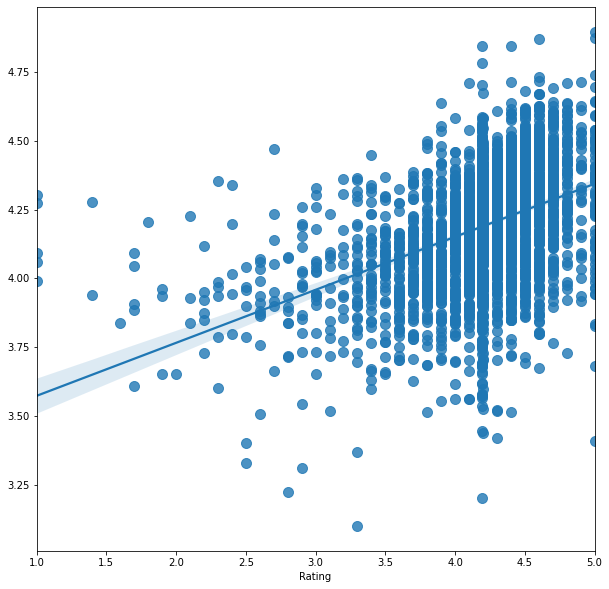

In [282]:
plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

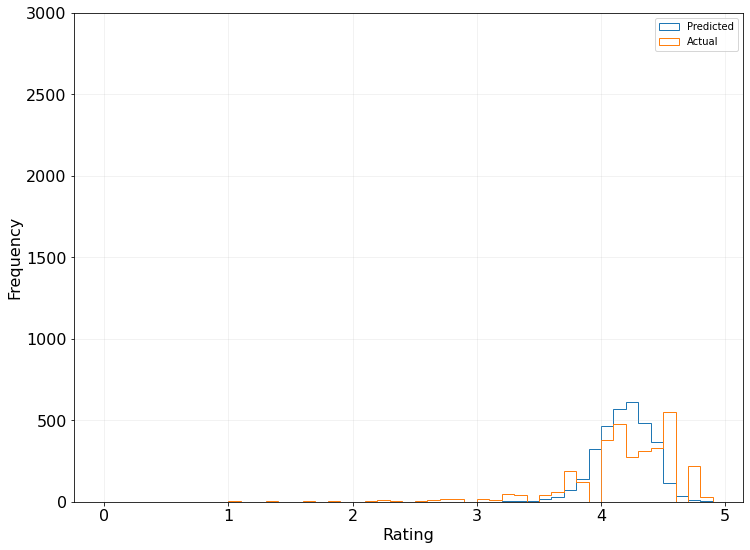

In [283]:
plt.hist(predicted_y, bins=bins_list2,label='Predicted', histtype='step')
plt.hist(expected_y, bins=bins_list2,label='Actual',histtype='step')
plt.legend(loc='upper right')
#plt.title('Histogram of Actual vs. Predicted Rating by SVR Model- Dummy', size=20)
plt.xlabel('Rating',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(alpha=0.2)
plt.ylim([0,3000])
plt.savefig('ActualvsPredicted_Catboost',bbox_inches = 'tight')
plt.show()

In [284]:
pred_np = np.array(predicted_y)
test_y_np = np.array(expected_y)
diff_cb = pred_np-test_y_np
diff_cb

array([ 0.65773126,  0.04285197,  0.04339497, ...,  0.46447397,
       -0.1258447 ,  0.31355914])

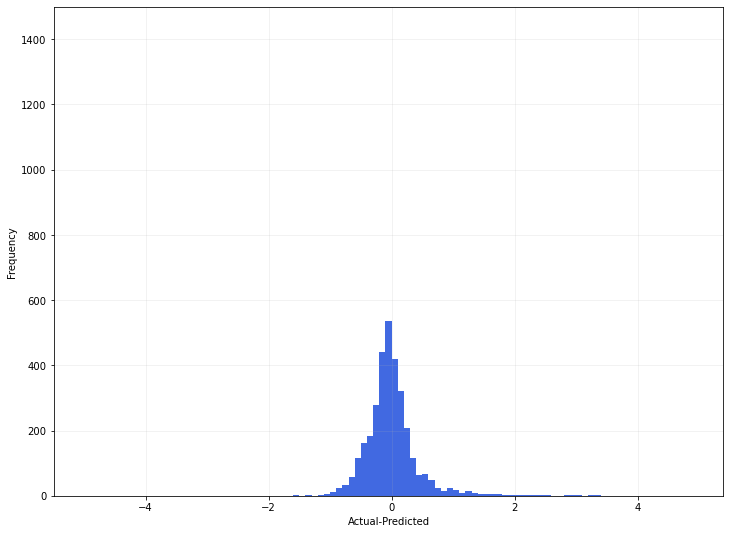

In [285]:
plt.hist(diff_cb,bins=bins_list3,range=[-5,5],color="#4169E1")
#plt.title('Difference between Actual Value and SVR Model Predicted Values for Rating - Dummy Coded')
plt.xlabel('Actual-Predicted')
plt.ylabel('Frequency')
plt.grid(alpha=0.2)
plt.ylim([0,1500])
plt.savefig('diffdum_CB',bbox_inches = 'tight')
plt.show()

In [286]:
resultsdf

,Series Name,R Squared Score,Mean Absolute Error,Mean Squared Error
0,Linear - Integer,0.00860552,0.318426,0.236498
1,SVM - Integer,0.022312,0.305911,0.233229
2,RFR - Integer,0.150801,0.284625,0.202578
3,Linear - Dummy,-0.00264611,0.311902,0.231993
4,SVM - Dummy,0.0215285,0.296187,0.226399
5,RFR - Dummy,-0.257209,0.387092,0.299909
6,RFR - Dummy w/o Genres,-0.306964,0.394934,0.311778
7,XGBoost,-0.203627,0.378074,0.287127
8,CatBoost,0.181293,0.283537,0.183039


## 3. Comparing the models

In [287]:
resultsdf

,Series Name,R Squared Score,Mean Absolute Error,Mean Squared Error
0,Linear - Integer,0.00860552,0.318426,0.236498
1,SVM - Integer,0.022312,0.305911,0.233229
2,RFR - Integer,0.150801,0.284625,0.202578
3,Linear - Dummy,-0.00264611,0.311902,0.231993
4,SVM - Dummy,0.0215285,0.296187,0.226399
5,RFR - Dummy,-0.257209,0.387092,0.299909
6,RFR - Dummy w/o Genres,-0.306964,0.394934,0.311778
7,XGBoost,-0.203627,0.378074,0.287127
8,CatBoost,0.181293,0.283537,0.183039


It is difficult to decide which model has the best predictive power by just looking at R squared scores, mean absolute errors and mean squared errors of the models. Random forest regressor model seems to have the lowest error rates. 

## VI. Model Selection

Based on the results above, 

In [288]:
df_d.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated',
       'Month', 'Category_1', 'Category_2', 'Category_3', 'Category_4',
       'Category_5', 'Category_6', 'Category_7', 'Category_8', 'Category_9',
       'Category_10', 'Category_11', 'Category_12', 'Category_13',
       'Category_14', 'Category_15', 'Category_16', 'Category_17',
       'Category_18', 'Category_19', 'Category_20', 'Category_21',
       'Category_22', 'Category_23', 'Category_24', 'Category_25',
       'Category_26', 'Category_27', 'Category_28', 'Category_29',
       'Category_30', 'Category_31', 'Category_32', 'Genres_1', 'Genres_2',
       'Genres_3', 'Genres_4', 'Genres_5', 'Genres_6', 'Genres_7', 'Genres_8',
       'Genres_9', 'Genres_10', 'Genres_11', 'Genres_12', 'Genres_13',
       'Genres_14', 'Genres_15', 'Genres_16', 'Genres_17', 'Genres_18',
       'Genres_19', 'Genres_20', 'Genres_21', 'Genres_22', 'Genres_23',
       'Genres_24', 'Genres_25', 'Genres_26', 'Genres_27', 'Genres_28',
 

In [289]:
# Features selection
X_d = df_d.drop(labels = ['Rating', 'Last Updated'],axis = 1)

In [290]:
# Label selection
y_d = df_d.Rating

In [291]:
# For testing purpose
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)

### Linear Regression Model

#### 1. Define pipeline

In [292]:
pipeLR = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression,k='all'),
    LinearRegression()
)

#### 2. Fit the pipeline
fit: combines imputation and scaling, and then trains the model

In [293]:
pipeLR.fit(X_train_d, y_train_d)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x000001834B9BE3A0>)),
                ('linearregression', LinearRegression())])

#### 3. Make Prediction and Assess performance on Train and Test Data

In [294]:
y_tr_pred = pipeLR.predict(X_train_d)
y_te_pred = pipeLR.predict(X_test_d)

#### 4. Assess performance

In [295]:
# R squared
r2_score(y_train, y_tr_pred), r2_score(y_test_d, y_te_pred)

(-0.05518220350370906, 0.03228285306845746)

In [296]:
# Mean Absolute Error
mean_absolute_error(y_train_d, y_tr_pred), mean_absolute_error(y_test_d, y_te_pred)

(0.315211650972476, 0.30725424207026586)

#### 4. Cross-Validation

In [297]:
cv_results = cross_validate(pipeLR, X_train_d, y_train_d, cv=5)

C:\Users\chloe\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\chloe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning:

invalid value encountered in less_equal

C:\Users\chloe\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\chloe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning:

invalid value encountered in less_equal



In [298]:
cv_results

{'fit_time': array([0.11699843, 0.1020484 , 0.10200047, 0.10699749, 0.10599995]),
 'score_time': array([0.01000071, 0.01000023, 0.01100254, 0.00900006, 0.00900102]),
 'test_score': array([-4.57402000e+21, -2.41526826e+23,  3.82092676e-02, -1.91882783e+22,
        -2.61622842e+25])}

In [299]:
cv_scores = cv_results['test_score']
cv_scores

array([-4.57402000e+21, -2.41526826e+23,  3.82092676e-02, -1.91882783e+22,
       -2.61622842e+25])

In [300]:
np.mean(cv_scores), np.std(cv_scores)

(-5.285514659416305e+24, 1.0438778773393265e+25)

In [301]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([-2.61630722e+25,  1.55920429e+25])

#### 5. Hyperparameter search using RandomizedSeachCV

In [302]:
#To see the parameters currently in use: 
pipeLR.get_params()

{'memory': None,
 'steps': [('simpleimputer', SimpleImputer(strategy='median')),
  ('standardscaler', StandardScaler()),
  ('selectkbest',
   SelectKBest(k='all', score_func=<function f_regression at 0x000001834B9BE3A0>)),
  ('linearregression', LinearRegression())],
 'verbose': False,
 'simpleimputer': SimpleImputer(strategy='median'),
 'standardscaler': StandardScaler(),
 'selectkbest': SelectKBest(k='all', score_func=<function f_regression at 0x000001834B9BE3A0>),
 'linearregression': LinearRegression(),
 'simpleimputer__add_indicator': False,
 'simpleimputer__copy': True,
 'simpleimputer__fill_value': None,
 'simpleimputer__missing_values': nan,
 'simpleimputer__strategy': 'median',
 'simpleimputer__verbose': 0,
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'selectkbest__k': 'all',
 'selectkbest__score_func': <function sklearn.feature_selection._univariate_selection.f_regression(X, y, *, center=True)>,
 'linearregression__cop

#### 5. Hyperparameter search using GridSearchCV


In [303]:
pipeLR.get_params()

{'memory': None,
 'steps': [('simpleimputer', SimpleImputer(strategy='median')),
  ('standardscaler', StandardScaler()),
  ('selectkbest',
   SelectKBest(k='all', score_func=<function f_regression at 0x000001834B9BE3A0>)),
  ('linearregression', LinearRegression())],
 'verbose': False,
 'simpleimputer': SimpleImputer(strategy='median'),
 'standardscaler': StandardScaler(),
 'selectkbest': SelectKBest(k='all', score_func=<function f_regression at 0x000001834B9BE3A0>),
 'linearregression': LinearRegression(),
 'simpleimputer__add_indicator': False,
 'simpleimputer__copy': True,
 'simpleimputer__fill_value': None,
 'simpleimputer__missing_values': nan,
 'simpleimputer__strategy': 'median',
 'simpleimputer__verbose': 0,
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'selectkbest__k': 'all',
 'selectkbest__score_func': <function sklearn.feature_selection._univariate_selection.f_regression(X, y, *, center=True)>,
 'linearregression__cop

In [304]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [305]:
lr_grid_cv = GridSearchCV(pipeLR, param_grid=grid_params, cv=5, n_jobs=-1)

In [306]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(k='all',
                                                    score_func=<function f_regression at 0x000001834B9BE3A0>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [307]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [308]:
lr_grid_cv.best_params_

{'selectkbest__k': 19}

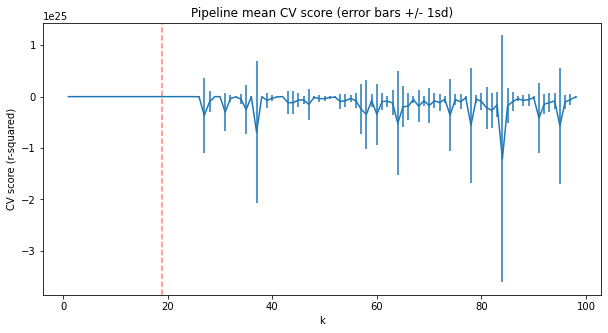

In [309]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [310]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [311]:
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

Genres_18      0.089577
Category_14    0.028083
Reviews        0.025201
Genres_8       0.024633
av_2           0.023090
Genres_13      0.021665
Category_23    0.012072
Genres_40      0.012072
Size           0.012057
Category_8     0.011256
Installs      -0.000301
Category_7    -0.012504
Genres_7      -0.012504
Genres_45     -0.012765
Category_29   -0.012765
Category_18   -0.015728
Genres_9      -0.016992
av_1          -0.030568
Category_15   -0.069444
dtype: float64

### Random Forest Regression Model

#### 1. Define the pipeline

Defined a pipeline for random forest resgressor model.

In [312]:
rf = RandomForestRegressor(random_state=47)
#forest_model.fit(X_train, y_train)
#melb_preds = forest_model.predict(X_test)
#print(mean_absolute_error(y_test, melb_preds))

In [313]:
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

In [314]:
type(RF_pipe)

sklearn.pipeline.Pipeline

In [315]:
#Check if the resultant Pipeline object has a fit() method and a predict() method
hasattr(RF_pipe, 'fit'), hasattr(RF_pipe, 'predict')

(True, True)

#### 2. Fit the pipeline

In [316]:
RF_pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=47))])

#### 3. Make predictiosn on the train and test sets

In [317]:
y_tr_pred = RF_pipe.predict(X_train_d)
y_te_pred = RF_pipe.predict(X_test_d)

#### 4. Assess performance

In [318]:
r2_score(y_train_d, y_tr_pred), r2_score(y_test_d, y_te_pred)

(0.6551355553949966, 0.6744508985121014)

In [319]:
mean_absolute_error(y_train_d, y_tr_pred), mean_absolute_error(y_test_d, y_te_pred)

(0.16004044216207652, 0.152912867338803)

In [320]:
mean_squared_error(y_train_d, y_tr_pred), mean_squared_error(y_test_d, y_te_pred)

(0.08006471228129709, 0.07248507486086246)

In [321]:
# comparing with the earlier result 
resultsdf

,Series Name,R Squared Score,Mean Absolute Error,Mean Squared Error
0,Linear - Integer,0.00860552,0.318426,0.236498
1,SVM - Integer,0.022312,0.305911,0.233229
2,RFR - Integer,0.150801,0.284625,0.202578
3,Linear - Dummy,-0.00264611,0.311902,0.231993
4,SVM - Dummy,0.0215285,0.296187,0.226399
5,RFR - Dummy,-0.257209,0.387092,0.299909
6,RFR - Dummy w/o Genres,-0.306964,0.394934,0.311778
7,XGBoost,-0.203627,0.378074,0.287127
8,CatBoost,0.181293,0.283537,0.183039


#### 5. Cross Validation
The model has been tuned to the aritrary test set. To prevent the overfitting, cross validation will be perfomred so that we can check how our model is performaing when run on new data set. 

In [322]:
rf_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)
rf_cv_results

{'fit_time': array([4.28724766, 4.6065948 , 3.70259809, 4.21675754, 4.81066275]),
 'score_time': array([0.04704452, 0.0549655 , 0.04200125, 0.04903555, 0.04399991]),
 'test_score': array([0.14434915, 0.09910342, 0.09875495, 0.13557237, 0.14357732])}

In [323]:
rf_cv_scores = rf_cv_results['test_score']
rf_cv_scores

array([0.14434915, 0.09910342, 0.09875495, 0.13557237, 0.14357732])

In [324]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.12427144268883854, 0.020919190398723236)

In [325]:
np.round((np.mean(rf_cv_scores) - 2 * np.std(rf_cv_scores), np.mean(rf_cv_scores) + 2 * np.std(rf_cv_scores)), 2)

array([0.08, 0.17])

#### 6. Hyperparameter Search Using Random Search and Grid Search
For cross validation of multiple values of k and use cross validation to pick the best value of k that leads to best performance, we will perform hyperparameter search using GridSearchCV.

#### Random Search

In [327]:
rf = RandomForestRegressor(random_state = 42)

In [332]:
# Parameters currently in use: 
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

Random Hyperparmeter Grid

In [333]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


Random Search Training

In [334]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_d, y_train_d)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 130.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [335]:
#Best parameters from fitting random search 
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [336]:
def evaluate(model, X_train_d, y_train_d):
    predictions = model.predict(X_test_d)
    errors = abs(predictions - y_test_d)
    mape = 100 * np.mean(errors / y_test_d)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train_d, y_train_d)
base_accuracy = evaluate(base_model, X_test_d, y_test_d)

Model Performance
Average Error: 0.2966 degrees.
Accuracy = 91.67%.


In [337]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test_d, y_test_d)

Model Performance
Average Error: 0.2801 degrees.
Accuracy = 92.04%.


In [338]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.41%.


In [339]:
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d, rf_random.best_estimator_.predict(X_test_d), name = 'Random Search'),ignore_index = True)
resultsdf

,Series Name,R Squared Score,Mean Absolute Error,Mean Squared Error
0,Linear - Integer,0.00860552,0.318426,0.236498
1,SVM - Integer,0.022312,0.305911,0.233229
2,RFR - Integer,0.150801,0.284625,0.202578
3,Linear - Dummy,-0.00264611,0.311902,0.231993
4,SVM - Dummy,0.0215285,0.296187,0.226399
5,RFR - Dummy,-0.257209,0.387092,0.299909
6,RFR - Dummy w/o Genres,-0.306964,0.394934,0.311778
7,XGBoost,-0.203627,0.378074,0.287127
8,CatBoost,0.181293,0.283537,0.183039
9,Random Search,0.142187,0.280131,0.190996


#### Grid Search with Cross Validation

In [340]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [341]:
# Fit the grid search to the data
grid_search.fit(X_train_d, y_train_d)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  5.6min finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [342]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test_d, y_test_d)

Model Performance
Average Error: 0.2896 degrees.
Accuracy = 91.77%.


In [343]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.11%.


In [344]:
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d, grid_search.best_estimator_.predict(X_test_d), name = 'Grid Search'),ignore_index = True)
resultsdf

,Series Name,R Squared Score,Mean Absolute Error,Mean Squared Error
0,Linear - Integer,0.00860552,0.318426,0.236498
1,SVM - Integer,0.022312,0.305911,0.233229
2,RFR - Integer,0.150801,0.284625,0.202578
3,Linear - Dummy,-0.00264611,0.311902,0.231993
4,SVM - Dummy,0.0215285,0.296187,0.226399
5,RFR - Dummy,-0.257209,0.387092,0.299909
6,RFR - Dummy w/o Genres,-0.306964,0.394934,0.311778
7,XGBoost,-0.203627,0.378074,0.287127
8,CatBoost,0.181293,0.283537,0.183039
9,Random Search,0.142187,0.280131,0.190996


#### Feature Importance

In [345]:
rf_best_cv_results = cross_validate(grid_search.best_estimator_, X_train_d, y_train_d, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.10342916, 0.10140148, 0.11427842, 0.10929452, 0.1135633 ])

In [346]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.10839337649950395, 0.005209684026849592)

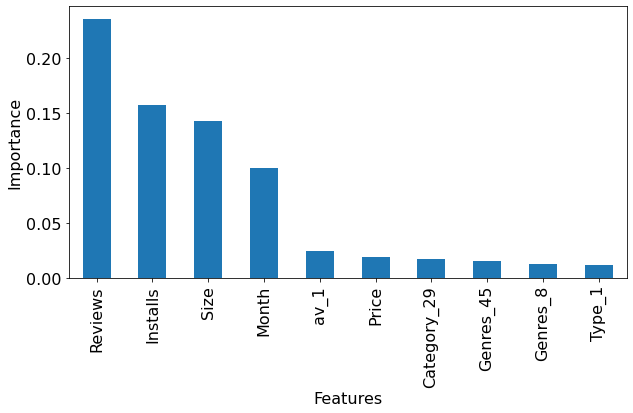

In [347]:
plt.subplots(figsize=(10, 5))
imps = grid_search.best_estimator_.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)[:10]
rf_feat_imps.plot(kind='bar')
plt.xlabel('Features', size=16)
plt.ylabel('Importance', size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Best random forest regressor feature importances')
plt.savefig('feature_importance.png',bbox_inches = 'tight')

## VII. Conclusion

The random forets regression model has a lower cross-validation mean absolute error and shows less variability. Verifying performance on the test set produces performance consistent with the cross-validation results.

### Data Quantity Assessment

In [348]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(RF_pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

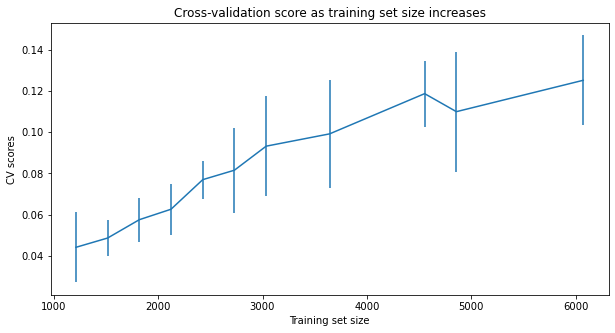

In [349]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');